# 실제 주가 정보를 가져와서 예측

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from evaluate_ts import evaluate_ts
from tools import fetch_stock_price, format_dataset

In [2]:
symbol = "MMM"
feat_dims = 20
train_size = 252
test_size = 252 - feat_dims

In [3]:
learning_rate = 0.05
optimizer = tf.keras.optimizers.Adam
loss='mse'
n_epochs = 1000
kernel_initializer = tf.keras.initializers.TruncatedNormal(
    mean=0.0, stddev=1.0, seed=None)
bias_initializer = 'zeros'

In [13]:
if True: #proved parameters
    learning_rate = 0.5
    n_epochs = 20000

In [5]:
stock_values = fetch_stock_price(symbol, datetime.date(2015,1,1),datetime.date(2016,12,31))
minibatch_cos_X, minibatch_cos_Y = format_dataset(stock_values, feat_dims)

loaded from ./tmp/prices/MMM_2015-01-01_2016-12-31.pk


In [6]:
#텐서플로 분석 속도를 높이기 위해 float32(4bytes)
train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_Y = minibatch_cos_Y[:train_size].reshape((-1,1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:,:].astype(np.float32)
test_Y = minibatch_cos_Y[train_size:].reshape((-1,1)).astype(np.float32)

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=feat_dims,
                                kernel_initializer=kernel_initializer,
                                bias_initializer = bias_initializer,
                                activation='linear'))
model.compile(loss=loss,optimizer=optimizer(learning_rate),
              metrics=['mse','mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(train_X,train_Y,epochs=n_epochs)

Epoch 1/20000
8/8 [==============================] - 0s 501us/step - loss: 434465.0677 - mse: 434465.0677 - mae: 569.1407
Epoch 2/20000
8/8 [==============================] - 0s 492us/step - loss: 223666.8420 - mse: 223666.8420 - mae: 441.5341
Epoch 3/20000
8/8 [==============================] - 0s 513us/step - loss: 45102.3361 - mse: 45102.3361 - mae: 182.9050
Epoch 4/20000
8/8 [==============================] - 0s 503us/step - loss: 41629.0586 - mse: 41629.0586 - mae: 186.4695
Epoch 5/20000
8/8 [==============================] - 0s 460us/step - loss: 14510.7052 - mse: 14510.7052 - mae: 110.6066
Epoch 6/20000
8/8 [==============================] - 0s 473us/step - loss: 4593.8923 - mse: 4593.8923 - mae: 60.2899
Epoch 7/20000
8/8 [==============================] - 0s 428us/step - loss: 3233.1230 - mse: 3233.1230 - mae: 50.1493
Epoch 8/20000
8/8 [==============================] - 0s 375us/step - loss: 2337.3284 - mse: 2337.3284 - mae: 42.9817
Epoch 9/20000
8/8 [==========================

2021-10-07 17:22:25.751715: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-07 17:22:25.751849: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 0s 378us/step - loss: 314.4965 - mse: 314.4965 - mae: 13.7912
Epoch 23/20000
8/8 [==============================] - 0s 419us/step - loss: 385.3248 - mse: 385.3248 - mae: 16.3458
Epoch 24/20000
8/8 [==============================] - 0s 401us/step - loss: 279.6057 - mse: 279.6057 - mae: 13.4479
Epoch 25/20000
8/8 [==============================] - 0s 354us/step - loss: 256.6347 - mse: 256.6347 - mae: 12.5305
Epoch 26/20000
8/8 [==============================] - 0s 360us/step - loss: 233.9996 - mse: 233.9996 - mae: 12.1123
Epoch 27/20000
8/8 [==============================] - 0s 398us/step - loss: 277.4183 - mse: 277.4183 - mae: 13.4448
Epoch 28/20000
8/8 [==============================] - 0s 393us/step - loss: 234.4877 - mse: 234.4877 - mae: 12.1997
Epoch 29/20000
8/8 [==============================] - 0s 417us/step - loss: 216.6551 - mse: 216.6551 - mae: 11.6241
Epoch 30/20000
8/8 [==============================] - 0s 324us/step - loss: 211.0924 - 

8/8 [==============================] - 0s 351us/step - loss: 170.5569 - mse: 170.5569 - mae: 10.6751
Epoch 94/20000
8/8 [==============================] - 0s 340us/step - loss: 175.9922 - mse: 175.9922 - mae: 11.0813
Epoch 95/20000
8/8 [==============================] - 0s 404us/step - loss: 226.5999 - mse: 226.5999 - mae: 12.2931
Epoch 96/20000
8/8 [==============================] - 0s 416us/step - loss: 142.5025 - mse: 142.5025 - mae: 9.8179
Epoch 97/20000
8/8 [==============================] - 0s 361us/step - loss: 78.4467 - mse: 78.4467 - mae: 7.0150
Epoch 98/20000
8/8 [==============================] - 0s 400us/step - loss: 80.1214 - mse: 80.1214 - mae: 7.0100
Epoch 99/20000
8/8 [==============================] - 0s 359us/step - loss: 66.6482 - mse: 66.6482 - mae: 6.7371
Epoch 100/20000
8/8 [==============================] - 0s 352us/step - loss: 75.9690 - mse: 75.9690 - mae: 7.1007
Epoch 101/20000
8/8 [==============================] - 0s 392us/step - loss: 79.9350 - mse: 79.9350

8/8 [==============================] - 0s 343us/step - loss: 60.4417 - mse: 60.4417 - mae: 6.0918
Epoch 165/20000
8/8 [==============================] - 0s 336us/step - loss: 222.2992 - mse: 222.2992 - mae: 12.9531
Epoch 166/20000
8/8 [==============================] - 0s 358us/step - loss: 199.5079 - mse: 199.5079 - mae: 11.8367
Epoch 167/20000
8/8 [==============================] - 0s 353us/step - loss: 89.6571 - mse: 89.6571 - mae: 7.7200
Epoch 168/20000
8/8 [==============================] - 0s 334us/step - loss: 60.3881 - mse: 60.3881 - mae: 6.3293
Epoch 169/20000
8/8 [==============================] - 0s 363us/step - loss: 99.0715 - mse: 99.0715 - mae: 8.2711
Epoch 170/20000
8/8 [==============================] - 0s 362us/step - loss: 126.0168 - mse: 126.0168 - mae: 9.2927
Epoch 171/20000
8/8 [==============================] - 0s 355us/step - loss: 180.4529 - mse: 180.4529 - mae: 11.0576
Epoch 172/20000
8/8 [==============================] - 0s 375us/step - loss: 345.2157 - mse: 

8/8 [==============================] - 0s 370us/step - loss: 4615.4141 - mse: 4615.4141 - mae: 67.3854
Epoch 235/20000
8/8 [==============================] - 0s 337us/step - loss: 4437.8660 - mse: 4437.8660 - mae: 61.4204
Epoch 236/20000
8/8 [==============================] - 0s 350us/step - loss: 7702.0382 - mse: 7702.0382 - mae: 85.3168
Epoch 237/20000
8/8 [==============================] - 0s 331us/step - loss: 1627.2910 - mse: 1627.2910 - mae: 34.3546
Epoch 238/20000
8/8 [==============================] - 0s 452us/step - loss: 408.3432 - mse: 408.3432 - mae: 17.2157
Epoch 239/20000
8/8 [==============================] - 0s 338us/step - loss: 143.3127 - mse: 143.3127 - mae: 10.0778
Epoch 240/20000
8/8 [==============================] - 0s 427us/step - loss: 820.6539 - mse: 820.6539 - mae: 25.0403
Epoch 241/20000
8/8 [==============================] - 0s 362us/step - loss: 412.8897 - mse: 412.8897 - mae: 19.0076
Epoch 242/20000
8/8 [==============================] - 0s 352us/step - l

8/8 [==============================] - 0s 335us/step - loss: 1561.7339 - mse: 1561.7339 - mae: 37.5834
Epoch 304/20000
8/8 [==============================] - 0s 383us/step - loss: 1733.7585 - mse: 1733.7585 - mae: 39.6408
Epoch 305/20000
8/8 [==============================] - 0s 351us/step - loss: 1649.5900 - mse: 1649.5900 - mae: 34.2866
Epoch 306/20000
8/8 [==============================] - 0s 354us/step - loss: 687.1331 - mse: 687.1331 - mae: 22.4538
Epoch 307/20000
8/8 [==============================] - 0s 392us/step - loss: 307.1899 - mse: 307.1899 - mae: 15.8586
Epoch 308/20000
8/8 [==============================] - 0s 334us/step - loss: 373.0095 - mse: 373.0095 - mae: 17.9650
Epoch 309/20000
8/8 [==============================] - 0s 368us/step - loss: 618.0614 - mse: 618.0614 - mae: 24.2372
Epoch 310/20000
8/8 [==============================] - 0s 405us/step - loss: 1145.8565 - mse: 1145.8565 - mae: 32.0115
Epoch 311/20000
8/8 [==============================] - 0s 421us/step - l

8/8 [==============================] - 0s 329us/step - loss: 1907.3514 - mse: 1907.3514 - mae: 41.6290
Epoch 373/20000
8/8 [==============================] - 0s 355us/step - loss: 3145.6727 - mse: 3145.6727 - mae: 50.3767
Epoch 374/20000
8/8 [==============================] - 0s 358us/step - loss: 1963.9189 - mse: 1963.9189 - mae: 42.0974
Epoch 375/20000
8/8 [==============================] - 0s 347us/step - loss: 224.3095 - mse: 224.3095 - mae: 11.6798
Epoch 376/20000
8/8 [==============================] - 0s 344us/step - loss: 2689.2552 - mse: 2689.2552 - mae: 51.0742
Epoch 377/20000
8/8 [==============================] - 0s 374us/step - loss: 2875.6173 - mse: 2875.6173 - mae: 51.8818
Epoch 378/20000
8/8 [==============================] - 0s 366us/step - loss: 751.8863 - mse: 751.8863 - mae: 19.7931
Epoch 379/20000
8/8 [==============================] - 0s 351us/step - loss: 2833.0424 - mse: 2833.0424 - mae: 48.5720
Epoch 380/20000
8/8 [==============================] - 0s 357us/step

8/8 [==============================] - 0s 355us/step - loss: 11369.2108 - mse: 11369.2108 - mae: 97.8145
Epoch 442/20000
8/8 [==============================] - 0s 357us/step - loss: 4692.8722 - mse: 4692.8722 - mae: 65.2817
Epoch 443/20000
8/8 [==============================] - 0s 365us/step - loss: 1520.6426 - mse: 1520.6426 - mae: 36.5359
Epoch 444/20000
8/8 [==============================] - 0s 381us/step - loss: 1112.0645 - mse: 1112.0645 - mae: 31.3691
Epoch 445/20000
8/8 [==============================] - 0s 340us/step - loss: 548.6469 - mse: 548.6469 - mae: 22.4279
Epoch 446/20000
8/8 [==============================] - 0s 466us/step - loss: 142.9457 - mse: 142.9457 - mae: 10.8742
Epoch 447/20000
8/8 [==============================] - 0s 370us/step - loss: 187.0041 - mse: 187.0041 - mae: 12.8787
Epoch 448/20000
8/8 [==============================] - 0s 459us/step - loss: 455.5222 - mse: 455.5222 - mae: 20.0329
Epoch 449/20000
8/8 [==============================] - 0s 346us/step -

8/8 [==============================] - 0s 372us/step - loss: 775.7480 - mse: 775.7480 - mae: 27.2215
Epoch 511/20000
8/8 [==============================] - 0s 361us/step - loss: 1179.2845 - mse: 1179.2845 - mae: 33.9332
Epoch 512/20000
8/8 [==============================] - 0s 351us/step - loss: 1706.0891 - mse: 1706.0891 - mae: 40.5801
Epoch 513/20000
8/8 [==============================] - 0s 321us/step - loss: 3635.8726 - mse: 3635.8726 - mae: 60.0623
Epoch 514/20000
8/8 [==============================] - 0s 468us/step - loss: 3212.3867 - mse: 3212.3867 - mae: 56.1891
Epoch 515/20000
8/8 [==============================] - 0s 374us/step - loss: 1341.3061 - mse: 1341.3061 - mae: 34.8771
Epoch 516/20000
8/8 [==============================] - 0s 364us/step - loss: 430.3739 - mse: 430.3739 - mae: 16.7027
Epoch 517/20000
8/8 [==============================] - 0s 366us/step - loss: 402.2424 - mse: 402.2424 - mae: 16.5640
Epoch 518/20000
8/8 [==============================] - 0s 404us/step -

8/8 [==============================] - 0s 364us/step - loss: 128.5009 - mse: 128.5009 - mae: 9.6633
Epoch 580/20000
8/8 [==============================] - 0s 341us/step - loss: 111.3023 - mse: 111.3023 - mae: 8.1994
Epoch 581/20000
8/8 [==============================] - 0s 326us/step - loss: 282.3596 - mse: 282.3596 - mae: 13.0550
Epoch 582/20000
8/8 [==============================] - 0s 391us/step - loss: 5130.1028 - mse: 5130.1028 - mae: 70.1831
Epoch 583/20000
8/8 [==============================] - 0s 383us/step - loss: 9797.8230 - mse: 9797.8230 - mae: 96.4516
Epoch 584/20000
8/8 [==============================] - 0s 379us/step - loss: 6011.0768 - mse: 6011.0768 - mae: 72.5821
Epoch 585/20000
8/8 [==============================] - 0s 359us/step - loss: 1381.1886 - mse: 1381.1886 - mae: 32.3138
Epoch 586/20000
8/8 [==============================] - 0s 355us/step - loss: 781.3576 - mse: 781.3576 - mae: 23.8064
Epoch 587/20000
8/8 [==============================] - 0s 370us/step - los

Epoch 649/20000
8/8 [==============================] - 0s 316us/step - loss: 207.7939 - mse: 207.7939 - mae: 13.5856
Epoch 650/20000
8/8 [==============================] - 0s 340us/step - loss: 71.7506 - mse: 71.7506 - mae: 7.6143
Epoch 651/20000
8/8 [==============================] - 0s 327us/step - loss: 64.0518 - mse: 64.0518 - mae: 7.0593
Epoch 652/20000
8/8 [==============================] - 0s 351us/step - loss: 447.6137 - mse: 447.6137 - mae: 20.5355
Epoch 653/20000
8/8 [==============================] - 0s 370us/step - loss: 386.2716 - mse: 386.2716 - mae: 15.4115
Epoch 654/20000
8/8 [==============================] - 0s 353us/step - loss: 1297.4698 - mse: 1297.4698 - mae: 34.1357
Epoch 655/20000
8/8 [==============================] - 0s 349us/step - loss: 917.0672 - mse: 917.0672 - mae: 27.6842
Epoch 656/20000
8/8 [==============================] - 0s 330us/step - loss: 484.2374 - mse: 484.2374 - mae: 18.6916
Epoch 657/20000
8/8 [==============================] - 0s 365us/step

8/8 [==============================] - 0s 313us/step - loss: 45.3154 - mse: 45.3154 - mae: 5.6774
Epoch 719/20000
8/8 [==============================] - 0s 360us/step - loss: 501.0524 - mse: 501.0524 - mae: 19.4555
Epoch 720/20000
8/8 [==============================] - 0s 313us/step - loss: 8078.0422 - mse: 8078.0422 - mae: 86.9093
Epoch 721/20000
8/8 [==============================] - 0s 407us/step - loss: 8588.4048 - mse: 8588.4048 - mae: 82.2626
Epoch 722/20000
8/8 [==============================] - 0s 387us/step - loss: 4981.6234 - mse: 4981.6234 - mae: 63.8870
Epoch 723/20000
8/8 [==============================] - 0s 367us/step - loss: 2819.6353 - mse: 2819.6353 - mae: 48.7101
Epoch 724/20000
8/8 [==============================] - 0s 367us/step - loss: 1111.7670 - mse: 1111.7670 - mae: 31.9471
Epoch 725/20000
8/8 [==============================] - 0s 353us/step - loss: 58.2340 - mse: 58.2340 - mae: 6.6312
Epoch 726/20000
8/8 [==============================] - 0s 386us/step - loss:

Epoch 788/20000
8/8 [==============================] - 0s 321us/step - loss: 428.6865 - mse: 428.6865 - mae: 18.5152
Epoch 789/20000
8/8 [==============================] - 0s 376us/step - loss: 196.6535 - mse: 196.6535 - mae: 13.4446
Epoch 790/20000
8/8 [==============================] - 0s 338us/step - loss: 61.8675 - mse: 61.8675 - mae: 7.2436
Epoch 791/20000
8/8 [==============================] - 0s 342us/step - loss: 136.3095 - mse: 136.3095 - mae: 9.1818
Epoch 792/20000
8/8 [==============================] - 0s 349us/step - loss: 2545.7785 - mse: 2545.7785 - mae: 48.0407
Epoch 793/20000
8/8 [==============================] - 0s 342us/step - loss: 11726.5546 - mse: 11726.5546 - mae: 107.6095
Epoch 794/20000
8/8 [==============================] - 0s 337us/step - loss: 1276.2578 - mse: 1276.2578 - mae: 31.3720
Epoch 795/20000
8/8 [==============================] - 0s 339us/step - loss: 1851.1967 - mse: 1851.1967 - mae: 38.7357
Epoch 796/20000
8/8 [==============================] - 0s

8/8 [==============================] - 0s 379us/step - loss: 370.0849 - mse: 370.0849 - mae: 17.9874
Epoch 858/20000
8/8 [==============================] - 0s 344us/step - loss: 2145.6127 - mse: 2145.6127 - mae: 44.9885
Epoch 859/20000
8/8 [==============================] - 0s 385us/step - loss: 1060.4532 - mse: 1060.4532 - mae: 29.1582
Epoch 860/20000
8/8 [==============================] - 0s 348us/step - loss: 1895.8785 - mse: 1895.8785 - mae: 39.1943
Epoch 861/20000
8/8 [==============================] - 0s 368us/step - loss: 1801.2593 - mse: 1801.2593 - mae: 38.4769
Epoch 862/20000
8/8 [==============================] - 0s 381us/step - loss: 151.6499 - mse: 151.6499 - mae: 11.8177
Epoch 863/20000
8/8 [==============================] - 0s 393us/step - loss: 44.7413 - mse: 44.7413 - mae: 5.8378
Epoch 864/20000
8/8 [==============================] - 0s 377us/step - loss: 106.4342 - mse: 106.4342 - mae: 8.5957
Epoch 865/20000
8/8 [==============================] - 0s 376us/step - loss:

8/8 [==============================] - 0s 352us/step - loss: 1762.7861 - mse: 1762.7861 - mae: 41.6243
Epoch 927/20000
8/8 [==============================] - 0s 356us/step - loss: 4130.5455 - mse: 4130.5455 - mae: 63.5336
Epoch 928/20000
8/8 [==============================] - 0s 377us/step - loss: 7711.2772 - mse: 7711.2772 - mae: 82.5577
Epoch 929/20000
8/8 [==============================] - 0s 360us/step - loss: 3597.0212 - mse: 3597.0212 - mae: 57.1119
Epoch 930/20000
8/8 [==============================] - 0s 392us/step - loss: 1204.2409 - mse: 1204.2409 - mae: 30.7280
Epoch 931/20000
8/8 [==============================] - 0s 377us/step - loss: 1503.3255 - mse: 1503.3255 - mae: 36.6162
Epoch 932/20000
8/8 [==============================] - 0s 378us/step - loss: 898.8700 - mse: 898.8700 - mae: 28.2949
Epoch 933/20000
8/8 [==============================] - 0s 379us/step - loss: 790.6819 - mse: 790.6819 - mae: 26.3302
Epoch 934/20000
8/8 [==============================] - 0s 386us/step

Epoch 996/20000
8/8 [==============================] - 0s 514us/step - loss: 1100.1723 - mse: 1100.1723 - mae: 31.0157
Epoch 997/20000
8/8 [==============================] - 0s 342us/step - loss: 4323.5028 - mse: 4323.5028 - mae: 65.3189
Epoch 998/20000
8/8 [==============================] - 0s 358us/step - loss: 4002.7890 - mse: 4002.7890 - mae: 61.1432
Epoch 999/20000
8/8 [==============================] - 0s 345us/step - loss: 373.8995 - mse: 373.8995 - mae: 14.9472
Epoch 1000/20000
8/8 [==============================] - 0s 340us/step - loss: 1865.3990 - mse: 1865.3990 - mae: 42.6995
Epoch 1001/20000
8/8 [==============================] - 0s 405us/step - loss: 266.5311 - mse: 266.5311 - mae: 14.3249
Epoch 1002/20000
8/8 [==============================] - 0s 349us/step - loss: 1049.8403 - mse: 1049.8403 - mae: 32.0907
Epoch 1003/20000
8/8 [==============================] - 0s 463us/step - loss: 322.1935 - mse: 322.1935 - mae: 16.8974
Epoch 1004/20000
8/8 [============================

8/8 [==============================] - 0s 356us/step - loss: 229.4084 - mse: 229.4084 - mae: 13.0063
Epoch 1066/20000
8/8 [==============================] - 0s 361us/step - loss: 953.7700 - mse: 953.7700 - mae: 30.7047
Epoch 1067/20000
8/8 [==============================] - 0s 374us/step - loss: 232.9841 - mse: 232.9841 - mae: 13.2442
Epoch 1068/20000
8/8 [==============================] - 0s 329us/step - loss: 749.1710 - mse: 749.1710 - mae: 26.6603
Epoch 1069/20000
8/8 [==============================] - 0s 376us/step - loss: 632.3528 - mse: 632.3528 - mae: 23.1224
Epoch 1070/20000
8/8 [==============================] - 0s 393us/step - loss: 473.5375 - mse: 473.5375 - mae: 21.1325
Epoch 1071/20000
8/8 [==============================] - 0s 352us/step - loss: 1140.4193 - mse: 1140.4193 - mae: 33.1766
Epoch 1072/20000
8/8 [==============================] - 0s 364us/step - loss: 3309.1607 - mse: 3309.1607 - mae: 56.7699
Epoch 1073/20000
8/8 [==============================] - 0s 361us/step

8/8 [==============================] - 0s 388us/step - loss: 1709.4400 - mse: 1709.4400 - mae: 40.7023
Epoch 1135/20000
8/8 [==============================] - 0s 376us/step - loss: 7634.5667 - mse: 7634.5667 - mae: 85.3657
Epoch 1136/20000
8/8 [==============================] - 0s 340us/step - loss: 1923.9245 - mse: 1923.9245 - mae: 39.2678
Epoch 1137/20000
8/8 [==============================] - 0s 452us/step - loss: 1428.2033 - mse: 1428.2033 - mae: 33.2718
Epoch 1138/20000
8/8 [==============================] - 0s 398us/step - loss: 1658.2769 - mse: 1658.2769 - mae: 39.5162
Epoch 1139/20000
8/8 [==============================] - 0s 352us/step - loss: 463.1865 - mse: 463.1865 - mae: 19.8916
Epoch 1140/20000
8/8 [==============================] - 0s 368us/step - loss: 114.1800 - mse: 114.1800 - mae: 9.1667
Epoch 1141/20000
8/8 [==============================] - 0s 380us/step - loss: 253.5296 - mse: 253.5296 - mae: 15.4306
Epoch 1142/20000
8/8 [==============================] - 0s 386us

8/8 [==============================] - 0s 347us/step - loss: 780.9968 - mse: 780.9968 - mae: 27.4191
Epoch 1204/20000
8/8 [==============================] - 0s 380us/step - loss: 176.7518 - mse: 176.7518 - mae: 12.6965
Epoch 1205/20000
8/8 [==============================] - 0s 362us/step - loss: 112.0224 - mse: 112.0224 - mae: 6.8998
Epoch 1206/20000
8/8 [==============================] - 0s 438us/step - loss: 2390.0444 - mse: 2390.0444 - mae: 48.2278
Epoch 1207/20000
8/8 [==============================] - 0s 365us/step - loss: 477.0872 - mse: 477.0872 - mae: 19.0528
Epoch 1208/20000
8/8 [==============================] - 0s 428us/step - loss: 1786.5153 - mse: 1786.5153 - mae: 41.4866
Epoch 1209/20000
8/8 [==============================] - 0s 378us/step - loss: 134.7738 - mse: 134.7738 - mae: 10.0676
Epoch 1210/20000
8/8 [==============================] - 0s 441us/step - loss: 770.2289 - mse: 770.2289 - mae: 27.1527
Epoch 1211/20000
8/8 [==============================] - 0s 405us/step 

8/8 [==============================] - 0s 407us/step - loss: 318.7823 - mse: 318.7823 - mae: 17.2204
Epoch 1273/20000
8/8 [==============================] - 0s 343us/step - loss: 184.1667 - mse: 184.1667 - mae: 10.4942
Epoch 1274/20000
8/8 [==============================] - 0s 340us/step - loss: 1869.6640 - mse: 1869.6640 - mae: 42.5128
Epoch 1275/20000
8/8 [==============================] - 0s 339us/step - loss: 2955.1910 - mse: 2955.1910 - mae: 53.8843
Epoch 1276/20000
8/8 [==============================] - 0s 371us/step - loss: 874.2656 - mse: 874.2656 - mae: 29.3012
Epoch 1277/20000
8/8 [==============================] - 0s 336us/step - loss: 272.6236 - mse: 272.6236 - mae: 12.5846
Epoch 1278/20000
8/8 [==============================] - 0s 332us/step - loss: 4126.0139 - mse: 4126.0139 - mae: 63.7602
Epoch 1279/20000
8/8 [==============================] - 0s 331us/step - loss: 1971.3493 - mse: 1971.3493 - mae: 43.1015
Epoch 1280/20000
8/8 [==============================] - 0s 405us/

8/8 [==============================] - 0s 374us/step - loss: 14.9925 - mse: 14.9925 - mae: 3.2974
Epoch 1342/20000
8/8 [==============================] - 0s 345us/step - loss: 42.3658 - mse: 42.3658 - mae: 5.9738
Epoch 1343/20000
8/8 [==============================] - 0s 339us/step - loss: 27.3896 - mse: 27.3896 - mae: 4.5692
Epoch 1344/20000
8/8 [==============================] - 0s 329us/step - loss: 21.5718 - mse: 21.5718 - mae: 4.0102
Epoch 1345/20000
8/8 [==============================] - 0s 402us/step - loss: 9.3519 - mse: 9.3519 - mae: 2.5162
Epoch 1346/20000
8/8 [==============================] - 0s 365us/step - loss: 10.5970 - mse: 10.5970 - mae: 2.5654
Epoch 1347/20000
8/8 [==============================] - 0s 364us/step - loss: 141.3062 - mse: 141.3062 - mae: 11.1629
Epoch 1348/20000
8/8 [==============================] - 0s 386us/step - loss: 285.8514 - mse: 285.8514 - mae: 16.5610
Epoch 1349/20000
8/8 [==============================] - 0s 385us/step - loss: 30.1068 - mse: 

8/8 [==============================] - 0s 331us/step - loss: 11.0543 - mse: 11.0543 - mae: 2.2932
Epoch 1411/20000
8/8 [==============================] - 0s 350us/step - loss: 1015.7406 - mse: 1015.7406 - mae: 29.0219
Epoch 1412/20000
8/8 [==============================] - 0s 403us/step - loss: 5039.3632 - mse: 5039.3632 - mae: 70.7603
Epoch 1413/20000
8/8 [==============================] - 0s 366us/step - loss: 2826.7625 - mse: 2826.7625 - mae: 52.4312
Epoch 1414/20000
8/8 [==============================] - 0s 379us/step - loss: 313.7121 - mse: 313.7121 - mae: 15.6547
Epoch 1415/20000
8/8 [==============================] - 0s 385us/step - loss: 1685.7271 - mse: 1685.7271 - mae: 40.4392
Epoch 1416/20000
8/8 [==============================] - 0s 381us/step - loss: 971.2154 - mse: 971.2154 - mae: 29.1110
Epoch 1417/20000
8/8 [==============================] - 0s 362us/step - loss: 112.2483 - mse: 112.2483 - mae: 9.2410
Epoch 1418/20000
8/8 [==============================] - 0s 381us/step

8/8 [==============================] - 0s 443us/step - loss: 4152.2984 - mse: 4152.2984 - mae: 63.3408
Epoch 1480/20000
8/8 [==============================] - 0s 377us/step - loss: 5167.0968 - mse: 5167.0968 - mae: 68.5940
Epoch 1481/20000
8/8 [==============================] - 0s 360us/step - loss: 3353.5075 - mse: 3353.5075 - mae: 50.9247
Epoch 1482/20000
8/8 [==============================] - 0s 341us/step - loss: 1615.5244 - mse: 1615.5244 - mae: 34.6383
Epoch 1483/20000
8/8 [==============================] - 0s 411us/step - loss: 2520.0294 - mse: 2520.0294 - mae: 44.5421
Epoch 1484/20000
8/8 [==============================] - 0s 387us/step - loss: 799.6647 - mse: 799.6647 - mae: 27.3517
Epoch 1485/20000
8/8 [==============================] - 0s 345us/step - loss: 168.0401 - mse: 168.0401 - mae: 11.6037
Epoch 1486/20000
8/8 [==============================] - 0s 378us/step - loss: 45.3583 - mse: 45.3583 - mae: 6.0038
Epoch 1487/20000
8/8 [==============================] - 0s 329us/s

8/8 [==============================] - 0s 323us/step - loss: 245.0016 - mse: 245.0016 - mae: 12.2662
Epoch 1549/20000
8/8 [==============================] - 0s 311us/step - loss: 1222.7380 - mse: 1222.7380 - mae: 34.1813
Epoch 1550/20000
8/8 [==============================] - 0s 357us/step - loss: 5962.2879 - mse: 5962.2879 - mae: 76.5638
Epoch 1551/20000
8/8 [==============================] - 0s 363us/step - loss: 1109.1156 - mse: 1109.1156 - mae: 29.5982
Epoch 1552/20000
8/8 [==============================] - 0s 361us/step - loss: 1931.3763 - mse: 1931.3763 - mae: 43.7911
Epoch 1553/20000
8/8 [==============================] - 0s 416us/step - loss: 366.6569 - mse: 366.6569 - mae: 16.7658
Epoch 1554/20000
8/8 [==============================] - 0s 348us/step - loss: 1207.0172 - mse: 1207.0172 - mae: 34.5034
Epoch 1555/20000
8/8 [==============================] - 0s 388us/step - loss: 321.1024 - mse: 321.1024 - mae: 15.8123
Epoch 1556/20000
8/8 [==============================] - 0s 354u

8/8 [==============================] - 0s 373us/step - loss: 556.9353 - mse: 556.9353 - mae: 23.1042
Epoch 1618/20000
8/8 [==============================] - 0s 323us/step - loss: 2163.3112 - mse: 2163.3112 - mae: 45.4186
Epoch 1619/20000
8/8 [==============================] - 0s 325us/step - loss: 5814.3738 - mse: 5814.3738 - mae: 75.1953
Epoch 1620/20000
8/8 [==============================] - 0s 344us/step - loss: 2917.4514 - mse: 2917.4514 - mae: 47.8446
Epoch 1621/20000
8/8 [==============================] - 0s 351us/step - loss: 1695.3377 - mse: 1695.3377 - mae: 40.2004
Epoch 1622/20000
8/8 [==============================] - 0s 351us/step - loss: 523.9815 - mse: 523.9815 - mae: 19.7210
Epoch 1623/20000
8/8 [==============================] - 0s 350us/step - loss: 845.3576 - mse: 845.3576 - mae: 28.9780
Epoch 1624/20000
8/8 [==============================] - 0s 388us/step - loss: 534.9319 - mse: 534.9319 - mae: 21.8108
Epoch 1625/20000
8/8 [==============================] - 0s 389us/

8/8 [==============================] - 0s 379us/step - loss: 189.0383 - mse: 189.0383 - mae: 11.3643
Epoch 1687/20000
8/8 [==============================] - 0s 386us/step - loss: 800.8791 - mse: 800.8791 - mae: 26.8002
Epoch 1688/20000
8/8 [==============================] - 0s 335us/step - loss: 221.1095 - mse: 221.1095 - mae: 12.4880
Epoch 1689/20000
8/8 [==============================] - 0s 339us/step - loss: 206.1462 - mse: 206.1462 - mae: 12.4777
Epoch 1690/20000
8/8 [==============================] - 0s 401us/step - loss: 36.2460 - mse: 36.2460 - mae: 5.6040
Epoch 1691/20000
8/8 [==============================] - 0s 346us/step - loss: 69.3435 - mse: 69.3435 - mae: 7.8241
Epoch 1692/20000
8/8 [==============================] - 0s 459us/step - loss: 192.7315 - mse: 192.7315 - mae: 13.4299
Epoch 1693/20000
8/8 [==============================] - 0s 392us/step - loss: 559.4731 - mse: 559.4731 - mae: 16.8654
Epoch 1694/20000
8/8 [==============================] - 0s 359us/step - loss: 6

8/8 [==============================] - 0s 356us/step - loss: 34.7506 - mse: 34.7506 - mae: 4.9193
Epoch 1756/20000
8/8 [==============================] - 0s 333us/step - loss: 36.9302 - mse: 36.9302 - mae: 5.1846
Epoch 1757/20000
8/8 [==============================] - 0s 340us/step - loss: 204.7688 - mse: 204.7688 - mae: 13.6981
Epoch 1758/20000
8/8 [==============================] - 0s 309us/step - loss: 45.3856 - mse: 45.3856 - mae: 6.2643
Epoch 1759/20000
8/8 [==============================] - 0s 454us/step - loss: 477.7525 - mse: 477.7525 - mae: 19.5204
Epoch 1760/20000
8/8 [==============================] - 0s 344us/step - loss: 308.7209 - mse: 308.7209 - mae: 15.0358
Epoch 1761/20000
8/8 [==============================] - 0s 362us/step - loss: 313.6371 - mse: 313.6371 - mae: 17.4133
Epoch 1762/20000
8/8 [==============================] - 0s 378us/step - loss: 605.7076 - mse: 605.7076 - mae: 24.3479
Epoch 1763/20000
8/8 [==============================] - 0s 354us/step - loss: 2033

8/8 [==============================] - 0s 331us/step - loss: 1837.9151 - mse: 1837.9151 - mae: 41.7388
Epoch 1825/20000
8/8 [==============================] - 0s 368us/step - loss: 4261.7223 - mse: 4261.7223 - mae: 65.0108
Epoch 1826/20000
8/8 [==============================] - 0s 361us/step - loss: 1872.0534 - mse: 1872.0534 - mae: 37.9912
Epoch 1827/20000
8/8 [==============================] - 0s 335us/step - loss: 986.2408 - mse: 986.2408 - mae: 31.1836
Epoch 1828/20000
8/8 [==============================] - 0s 370us/step - loss: 198.1842 - mse: 198.1842 - mae: 12.6089
Epoch 1829/20000
8/8 [==============================] - 0s 413us/step - loss: 687.9547 - mse: 687.9547 - mae: 25.8508
Epoch 1830/20000
8/8 [==============================] - 0s 336us/step - loss: 1294.9567 - mse: 1294.9567 - mae: 35.7949
Epoch 1831/20000
8/8 [==============================] - 0s 361us/step - loss: 1268.9414 - mse: 1268.9414 - mae: 35.4605
Epoch 1832/20000
8/8 [==============================] - 0s 343u

8/8 [==============================] - 0s 351us/step - loss: 547.7348 - mse: 547.7348 - mae: 23.2925
Epoch 1894/20000
8/8 [==============================] - 0s 336us/step - loss: 1184.9112 - mse: 1184.9112 - mae: 33.4925
Epoch 1895/20000
8/8 [==============================] - 0s 353us/step - loss: 3426.5966 - mse: 3426.5966 - mae: 58.2394
Epoch 1896/20000
8/8 [==============================] - 0s 396us/step - loss: 2225.3576 - mse: 2225.3576 - mae: 43.3663
Epoch 1897/20000
8/8 [==============================] - 0s 304us/step - loss: 10.7204 - mse: 10.7204 - mae: 2.6599
Epoch 1898/20000
8/8 [==============================] - 0s 381us/step - loss: 136.8850 - mse: 136.8850 - mae: 11.1687
Epoch 1899/20000
8/8 [==============================] - 0s 362us/step - loss: 12.7239 - mse: 12.7239 - mae: 3.0471
Epoch 1900/20000
8/8 [==============================] - 0s 373us/step - loss: 11.9171 - mse: 11.9171 - mae: 2.8459
Epoch 1901/20000
8/8 [==============================] - 0s 332us/step - loss

8/8 [==============================] - 0s 365us/step - loss: 951.1516 - mse: 951.1516 - mae: 30.4575
Epoch 1963/20000
8/8 [==============================] - 0s 358us/step - loss: 271.6674 - mse: 271.6674 - mae: 14.6937
Epoch 1964/20000
8/8 [==============================] - 0s 388us/step - loss: 100.2517 - mse: 100.2517 - mae: 9.7637
Epoch 1965/20000
8/8 [==============================] - 0s 348us/step - loss: 131.3911 - mse: 131.3911 - mae: 11.0651
Epoch 1966/20000
8/8 [==============================] - 0s 350us/step - loss: 91.4300 - mse: 91.4300 - mae: 6.3185
Epoch 1967/20000
8/8 [==============================] - 0s 365us/step - loss: 2087.7002 - mse: 2087.7002 - mae: 45.1744
Epoch 1968/20000
8/8 [==============================] - 0s 379us/step - loss: 3448.3791 - mse: 3448.3791 - mae: 57.9678
Epoch 1969/20000
8/8 [==============================] - 0s 401us/step - loss: 193.5662 - mse: 193.5662 - mae: 12.0926
Epoch 1970/20000
8/8 [==============================] - 0s 416us/step - l

8/8 [==============================] - 0s 329us/step - loss: 389.8353 - mse: 389.8353 - mae: 16.0174
Epoch 2032/20000
8/8 [==============================] - 0s 340us/step - loss: 259.3974 - mse: 259.3974 - mae: 13.8307
Epoch 2033/20000
8/8 [==============================] - 0s 316us/step - loss: 337.9721 - mse: 337.9721 - mae: 14.4451
Epoch 2034/20000
8/8 [==============================] - 0s 386us/step - loss: 337.6602 - mse: 337.6602 - mae: 16.2497
Epoch 2035/20000
8/8 [==============================] - 0s 364us/step - loss: 1000.4703 - mse: 1000.4703 - mae: 30.0409
Epoch 2036/20000
8/8 [==============================] - 0s 366us/step - loss: 224.9303 - mse: 224.9303 - mae: 14.3953
Epoch 2037/20000
8/8 [==============================] - 0s 353us/step - loss: 138.3145 - mse: 138.3145 - mae: 11.0036
Epoch 2038/20000
8/8 [==============================] - 0s 350us/step - loss: 63.6059 - mse: 63.6059 - mae: 6.3857
Epoch 2039/20000
8/8 [==============================] - 0s 378us/step - lo

8/8 [==============================] - 0s 345us/step - loss: 3184.8102 - mse: 3184.8102 - mae: 53.8396
Epoch 2101/20000
8/8 [==============================] - 0s 335us/step - loss: 13362.6804 - mse: 13362.6804 - mae: 113.9224
Epoch 2102/20000
8/8 [==============================] - 0s 343us/step - loss: 2077.0596 - mse: 2077.0596 - mae: 36.8488
Epoch 2103/20000
8/8 [==============================] - 0s 374us/step - loss: 956.4162 - mse: 956.4162 - mae: 27.4003
Epoch 2104/20000
8/8 [==============================] - 0s 349us/step - loss: 815.6326 - mse: 815.6326 - mae: 26.3914
Epoch 2105/20000
8/8 [==============================] - 0s 333us/step - loss: 699.4448 - mse: 699.4448 - mae: 25.2461
Epoch 2106/20000
8/8 [==============================] - 0s 371us/step - loss: 505.2701 - mse: 505.2701 - mae: 21.9916
Epoch 2107/20000
8/8 [==============================] - 0s 354us/step - loss: 34.1759 - mse: 34.1759 - mae: 5.0238
Epoch 2108/20000
8/8 [==============================] - 0s 367us/st

8/8 [==============================] - 0s 345us/step - loss: 951.9334 - mse: 951.9334 - mae: 27.9621
Epoch 2170/20000
8/8 [==============================] - 0s 397us/step - loss: 2296.9839 - mse: 2296.9839 - mae: 47.5614
Epoch 2171/20000
8/8 [==============================] - 0s 313us/step - loss: 291.0563 - mse: 291.0563 - mae: 14.5989
Epoch 2172/20000
8/8 [==============================] - 0s 329us/step - loss: 750.6648 - mse: 750.6648 - mae: 25.1151
Epoch 2173/20000
8/8 [==============================] - 0s 411us/step - loss: 634.4242 - mse: 634.4242 - mae: 24.3965
Epoch 2174/20000
8/8 [==============================] - 0s 374us/step - loss: 255.7126 - mse: 255.7126 - mae: 11.7972
Epoch 2175/20000
8/8 [==============================] - 0s 334us/step - loss: 1497.3958 - mse: 1497.3958 - mae: 38.5116
Epoch 2176/20000
8/8 [==============================] - 0s 405us/step - loss: 321.9654 - mse: 321.9654 - mae: 17.0718
Epoch 2177/20000
8/8 [==============================] - 0s 357us/step

8/8 [==============================] - 0s 330us/step - loss: 53.8454 - mse: 53.8454 - mae: 6.4271
Epoch 2239/20000
8/8 [==============================] - 0s 329us/step - loss: 39.4679 - mse: 39.4679 - mae: 5.4552
Epoch 2240/20000
8/8 [==============================] - 0s 325us/step - loss: 255.7740 - mse: 255.7740 - mae: 15.7185
Epoch 2241/20000
8/8 [==============================] - 0s 346us/step - loss: 95.9983 - mse: 95.9983 - mae: 9.5827
Epoch 2242/20000
8/8 [==============================] - 0s 418us/step - loss: 41.2048 - mse: 41.2048 - mae: 5.6954
Epoch 2243/20000
8/8 [==============================] - 0s 367us/step - loss: 167.2028 - mse: 167.2028 - mae: 11.8889
Epoch 2244/20000
8/8 [==============================] - 0s 386us/step - loss: 1239.1579 - mse: 1239.1579 - mae: 34.8311
Epoch 2245/20000
8/8 [==============================] - 0s 357us/step - loss: 1576.0735 - mse: 1576.0735 - mae: 39.0415
Epoch 2246/20000
8/8 [==============================] - 0s 398us/step - loss: 169

8/8 [==============================] - 0s 337us/step - loss: 1715.8794 - mse: 1715.8794 - mae: 41.2055
Epoch 2308/20000
8/8 [==============================] - 0s 331us/step - loss: 703.3283 - mse: 703.3283 - mae: 25.8633
Epoch 2309/20000
8/8 [==============================] - 0s 435us/step - loss: 41.0547 - mse: 41.0547 - mae: 5.4445
Epoch 2310/20000
8/8 [==============================] - 0s 369us/step - loss: 738.6956 - mse: 738.6956 - mae: 24.8245
Epoch 2311/20000
8/8 [==============================] - 0s 342us/step - loss: 7008.6281 - mse: 7008.6281 - mae: 81.8208
Epoch 2312/20000
8/8 [==============================] - 0s 380us/step - loss: 9291.0836 - mse: 9291.0836 - mae: 91.2871
Epoch 2313/20000
8/8 [==============================] - 0s 371us/step - loss: 2056.5689 - mse: 2056.5689 - mae: 44.0271
Epoch 2314/20000
8/8 [==============================] - 0s 331us/step - loss: 329.4231 - mse: 329.4231 - mae: 14.5703
Epoch 2315/20000
8/8 [==============================] - 0s 343us/ste

8/8 [==============================] - 0s 338us/step - loss: 1075.8772 - mse: 1075.8772 - mae: 28.4023
Epoch 2377/20000
8/8 [==============================] - 0s 393us/step - loss: 3013.4756 - mse: 3013.4756 - mae: 51.1042
Epoch 2378/20000
8/8 [==============================] - 0s 339us/step - loss: 1759.0847 - mse: 1759.0847 - mae: 40.6421
Epoch 2379/20000
8/8 [==============================] - 0s 329us/step - loss: 283.3487 - mse: 283.3487 - mae: 14.2246
Epoch 2380/20000
8/8 [==============================] - 0s 376us/step - loss: 326.1328 - mse: 326.1328 - mae: 17.6794
Epoch 2381/20000
8/8 [==============================] - 0s 338us/step - loss: 156.6276 - mse: 156.6276 - mae: 9.6493
Epoch 2382/20000
8/8 [==============================] - 0s 343us/step - loss: 1102.6327 - mse: 1102.6327 - mae: 32.6789
Epoch 2383/20000
8/8 [==============================] - 0s 360us/step - loss: 324.0679 - mse: 324.0679 - mae: 13.5008
Epoch 2384/20000
8/8 [==============================] - 0s 313us/s

8/8 [==============================] - 0s 324us/step - loss: 1605.0874 - mse: 1605.0874 - mae: 39.6199
Epoch 2446/20000
8/8 [==============================] - 0s 334us/step - loss: 696.0330 - mse: 696.0331 - mae: 26.2889
Epoch 2447/20000
8/8 [==============================] - 0s 333us/step - loss: 356.5762 - mse: 356.5762 - mae: 18.7021
Epoch 2448/20000
8/8 [==============================] - 0s 339us/step - loss: 463.0194 - mse: 463.0194 - mae: 21.3570
Epoch 2449/20000
8/8 [==============================] - 0s 368us/step - loss: 1262.2305 - mse: 1262.2305 - mae: 34.2976
Epoch 2450/20000
8/8 [==============================] - 0s 335us/step - loss: 9155.9595 - mse: 9155.9595 - mae: 93.6355
Epoch 2451/20000
8/8 [==============================] - 0s 370us/step - loss: 6761.9393 - mse: 6761.9393 - mae: 74.4127
Epoch 2452/20000
8/8 [==============================] - 0s 375us/step - loss: 5761.9936 - mse: 5761.9936 - mae: 70.8919
Epoch 2453/20000
8/8 [==============================] - 0s 361u

8/8 [==============================] - 0s 338us/step - loss: 126.7709 - mse: 126.7709 - mae: 10.8845
Epoch 2515/20000
8/8 [==============================] - 0s 494us/step - loss: 35.2711 - mse: 35.2711 - mae: 4.5650
Epoch 2516/20000
8/8 [==============================] - 0s 369us/step - loss: 173.2989 - mse: 173.2989 - mae: 9.9069
Epoch 2517/20000
8/8 [==============================] - 0s 339us/step - loss: 7448.3237 - mse: 7448.3237 - mae: 80.8474
Epoch 2518/20000
8/8 [==============================] - 0s 377us/step - loss: 17720.2846 - mse: 17720.2846 - mae: 122.3913
Epoch 2519/20000
8/8 [==============================] - 0s 357us/step - loss: 9542.2656 - mse: 9542.2656 - mae: 92.3653
Epoch 2520/20000
8/8 [==============================] - 0s 350us/step - loss: 7553.4666 - mse: 7553.4666 - mae: 81.1563
Epoch 2521/20000
8/8 [==============================] - 0s 347us/step - loss: 3868.0269 - mse: 3868.0269 - mae: 55.7470
Epoch 2522/20000
8/8 [==============================] - 0s 378us

8/8 [==============================] - 0s 328us/step - loss: 1242.3055 - mse: 1242.3055 - mae: 34.7059
Epoch 2584/20000
8/8 [==============================] - 0s 368us/step - loss: 4169.2154 - mse: 4169.2154 - mae: 64.2900
Epoch 2585/20000
8/8 [==============================] - 0s 349us/step - loss: 6863.0129 - mse: 6863.0129 - mae: 80.1652
Epoch 2586/20000
8/8 [==============================] - 0s 383us/step - loss: 2218.9769 - mse: 2218.9769 - mae: 42.2060
Epoch 2587/20000
8/8 [==============================] - 0s 403us/step - loss: 2639.9688 - mse: 2639.9688 - mae: 46.6441
Epoch 2588/20000
8/8 [==============================] - 0s 380us/step - loss: 1393.5397 - mse: 1393.5397 - mae: 37.0162
Epoch 2589/20000
8/8 [==============================] - 0s 384us/step - loss: 235.4560 - mse: 235.4560 - mae: 13.6639
Epoch 2590/20000
8/8 [==============================] - 0s 359us/step - loss: 425.8549 - mse: 425.8549 - mae: 19.7050
Epoch 2591/20000
8/8 [==============================] - 0s 41

8/8 [==============================] - 0s 346us/step - loss: 705.0342 - mse: 705.0342 - mae: 25.6897
Epoch 2653/20000
8/8 [==============================] - 0s 367us/step - loss: 1070.1627 - mse: 1070.1627 - mae: 32.2699
Epoch 2654/20000
8/8 [==============================] - 0s 336us/step - loss: 173.5964 - mse: 173.5964 - mae: 11.1482
Epoch 2655/20000
8/8 [==============================] - 0s 377us/step - loss: 2824.6035 - mse: 2824.6035 - mae: 51.8320
Epoch 2656/20000
8/8 [==============================] - 0s 320us/step - loss: 1049.2486 - mse: 1049.2486 - mae: 28.9653
Epoch 2657/20000
8/8 [==============================] - 0s 344us/step - loss: 1941.7472 - mse: 1941.7472 - mae: 43.9734
Epoch 2658/20000
8/8 [==============================] - 0s 410us/step - loss: 923.0655 - mse: 923.0655 - mae: 29.0658
Epoch 2659/20000
8/8 [==============================] - 0s 326us/step - loss: 51.0940 - mse: 51.0940 - mae: 5.0113
Epoch 2660/20000
8/8 [==============================] - 0s 388us/ste

8/8 [==============================] - 0s 373us/step - loss: 201.6748 - mse: 201.6748 - mae: 12.4274
Epoch 2722/20000
8/8 [==============================] - 0s 327us/step - loss: 762.6535 - mse: 762.6535 - mae: 27.3049
Epoch 2723/20000
8/8 [==============================] - 0s 384us/step - loss: 168.4224 - mse: 168.4224 - mae: 12.7858
Epoch 2724/20000
8/8 [==============================] - 0s 424us/step - loss: 298.9274 - mse: 298.9274 - mae: 17.1535
Epoch 2725/20000
8/8 [==============================] - 0s 334us/step - loss: 307.6097 - mse: 307.6097 - mae: 17.3632
Epoch 2726/20000
8/8 [==============================] - 0s 376us/step - loss: 538.8710 - mse: 538.8710 - mae: 22.1249
Epoch 2727/20000
8/8 [==============================] - 0s 363us/step - loss: 5305.4029 - mse: 5305.4029 - mae: 70.9846
Epoch 2728/20000
8/8 [==============================] - 0s 401us/step - loss: 10841.7035 - mse: 10841.7035 - mae: 100.2408
Epoch 2729/20000
8/8 [==============================] - 0s 367us/s

8/8 [==============================] - 0s 368us/step - loss: 1294.6697 - mse: 1294.6697 - mae: 31.4740
Epoch 2791/20000
8/8 [==============================] - 0s 334us/step - loss: 646.9084 - mse: 646.9084 - mae: 20.9442
Epoch 2792/20000
8/8 [==============================] - 0s 320us/step - loss: 1562.1735 - mse: 1562.1735 - mae: 35.9804
Epoch 2793/20000
8/8 [==============================] - 0s 358us/step - loss: 3948.1492 - mse: 3948.1492 - mae: 61.3686
Epoch 2794/20000
8/8 [==============================] - 0s 427us/step - loss: 269.1504 - mse: 269.1504 - mae: 13.1657
Epoch 2795/20000
8/8 [==============================] - 0s 355us/step - loss: 657.1569 - mse: 657.1569 - mae: 23.2532
Epoch 2796/20000
8/8 [==============================] - 0s 346us/step - loss: 328.9696 - mse: 328.9696 - mae: 17.8662
Epoch 2797/20000
8/8 [==============================] - 0s 360us/step - loss: 91.5245 - mse: 91.5245 - mae: 8.8262
Epoch 2798/20000
8/8 [==============================] - 0s 372us/step 

8/8 [==============================] - 0s 408us/step - loss: 3255.3635 - mse: 3255.3635 - mae: 54.8881
Epoch 2860/20000
8/8 [==============================] - 0s 335us/step - loss: 6496.1291 - mse: 6496.1291 - mae: 79.6782
Epoch 2861/20000
8/8 [==============================] - 0s 371us/step - loss: 673.3346 - mse: 673.3346 - mae: 20.5389
Epoch 2862/20000
8/8 [==============================] - 0s 350us/step - loss: 3349.9907 - mse: 3349.9907 - mae: 55.3357
Epoch 2863/20000
8/8 [==============================] - 0s 365us/step - loss: 1223.6678 - mse: 1223.6678 - mae: 31.1071
Epoch 2864/20000
8/8 [==============================] - 0s 356us/step - loss: 991.5931 - mse: 991.5931 - mae: 28.4160
Epoch 2865/20000
8/8 [==============================] - 0s 360us/step - loss: 3075.7123 - mse: 3075.7123 - mae: 54.9034
Epoch 2866/20000
8/8 [==============================] - 0s 410us/step - loss: 1300.3928 - mse: 1300.3928 - mae: 27.4272
Epoch 2867/20000
8/8 [==============================] - 0s 35

8/8 [==============================] - 0s 344us/step - loss: 71.1722 - mse: 71.1722 - mae: 7.2049
Epoch 2929/20000
8/8 [==============================] - 0s 478us/step - loss: 200.3078 - mse: 200.3078 - mae: 13.6969
Epoch 2930/20000
8/8 [==============================] - 0s 358us/step - loss: 435.4909 - mse: 435.4909 - mae: 20.0301
Epoch 2931/20000
8/8 [==============================] - 0s 326us/step - loss: 34.4290 - mse: 34.4290 - mae: 3.8770
Epoch 2932/20000
8/8 [==============================] - 0s 391us/step - loss: 1253.0648 - mse: 1253.0648 - mae: 34.0578
Epoch 2933/20000
8/8 [==============================] - 0s 363us/step - loss: 7102.2151 - mse: 7102.2151 - mae: 83.3054
Epoch 2934/20000
8/8 [==============================] - 0s 380us/step - loss: 3168.5070 - mse: 3168.5070 - mae: 51.5947
Epoch 2935/20000
8/8 [==============================] - 0s 342us/step - loss: 2278.4676 - mse: 2278.4676 - mae: 46.7403
Epoch 2936/20000
8/8 [==============================] - 0s 365us/step -

8/8 [==============================] - 0s 377us/step - loss: 51.7853 - mse: 51.7853 - mae: 6.1665
Epoch 2998/20000
8/8 [==============================] - 0s 367us/step - loss: 1309.5516 - mse: 1309.5516 - mae: 34.5760
Epoch 2999/20000
8/8 [==============================] - 0s 329us/step - loss: 2930.4739 - mse: 2930.4739 - mae: 53.9519
Epoch 3000/20000
8/8 [==============================] - 0s 336us/step - loss: 774.3879 - mse: 774.3879 - mae: 24.3682
Epoch 3001/20000
8/8 [==============================] - 0s 397us/step - loss: 923.7741 - mse: 923.7741 - mae: 29.6605
Epoch 3002/20000
8/8 [==============================] - 0s 344us/step - loss: 2066.3099 - mse: 2066.3099 - mae: 45.2377
Epoch 3003/20000
8/8 [==============================] - 0s 350us/step - loss: 526.5370 - mse: 526.5370 - mae: 20.5533
Epoch 3004/20000
8/8 [==============================] - 0s 393us/step - loss: 1278.3286 - mse: 1278.3286 - mae: 34.0780
Epoch 3005/20000
8/8 [==============================] - 0s 337us/ste

8/8 [==============================] - 0s 341us/step - loss: 470.6159 - mse: 470.6159 - mae: 17.9262
Epoch 3067/20000
8/8 [==============================] - 0s 379us/step - loss: 83.3140 - mse: 83.3140 - mae: 7.7459
Epoch 3068/20000
8/8 [==============================] - 0s 360us/step - loss: 50.2092 - mse: 50.2092 - mae: 6.7027
Epoch 3069/20000
8/8 [==============================] - 0s 389us/step - loss: 58.3239 - mse: 58.3239 - mae: 7.2579
Epoch 3070/20000
8/8 [==============================] - 0s 352us/step - loss: 29.1312 - mse: 29.1312 - mae: 4.9798
Epoch 3071/20000
8/8 [==============================] - 0s 368us/step - loss: 27.6364 - mse: 27.6364 - mae: 4.9420
Epoch 3072/20000
8/8 [==============================] - 0s 379us/step - loss: 93.0476 - mse: 93.0476 - mae: 8.9629
Epoch 3073/20000
8/8 [==============================] - 0s 373us/step - loss: 395.7115 - mse: 395.7115 - mae: 18.8574
Epoch 3074/20000
8/8 [==============================] - 0s 389us/step - loss: 5570.0323 - m

8/8 [==============================] - 0s 373us/step - loss: 3655.0641 - mse: 3655.0641 - mae: 59.7467
Epoch 3136/20000
8/8 [==============================] - 0s 431us/step - loss: 1425.6619 - mse: 1425.6619 - mae: 35.7216
Epoch 3137/20000
8/8 [==============================] - 0s 380us/step - loss: 427.4242 - mse: 427.4242 - mae: 19.1521
Epoch 3138/20000
8/8 [==============================] - 0s 449us/step - loss: 480.8095 - mse: 480.8095 - mae: 21.1366
Epoch 3139/20000
8/8 [==============================] - 0s 352us/step - loss: 26.5114 - mse: 26.5114 - mae: 4.3028
Epoch 3140/20000
8/8 [==============================] - 0s 352us/step - loss: 453.9274 - mse: 453.9274 - mae: 20.2952
Epoch 3141/20000
8/8 [==============================] - 0s 518us/step - loss: 528.0780 - mse: 528.0780 - mae: 22.7785
Epoch 3142/20000
8/8 [==============================] - 0s 374us/step - loss: 340.9355 - mse: 340.9355 - mae: 17.7643
Epoch 3143/20000
8/8 [==============================] - 0s 385us/step - 

8/8 [==============================] - 0s 352us/step - loss: 156.6294 - mse: 156.6294 - mae: 10.9639
Epoch 3205/20000
8/8 [==============================] - 0s 385us/step - loss: 709.7510 - mse: 709.7510 - mae: 26.5359
Epoch 3206/20000
8/8 [==============================] - 0s 337us/step - loss: 545.6924 - mse: 545.6924 - mae: 22.6169
Epoch 3207/20000
8/8 [==============================] - 0s 409us/step - loss: 75.0598 - mse: 75.0598 - mae: 8.0346
Epoch 3208/20000
8/8 [==============================] - 0s 434us/step - loss: 270.4767 - mse: 270.4767 - mae: 15.5370
Epoch 3209/20000
8/8 [==============================] - 0s 423us/step - loss: 1678.1200 - mse: 1678.1200 - mae: 40.6907
Epoch 3210/20000
8/8 [==============================] - 0s 449us/step - loss: 4367.4912 - mse: 4367.4912 - mae: 64.9901
Epoch 3211/20000
8/8 [==============================] - 0s 406us/step - loss: 4340.7685 - mse: 4340.7685 - mae: 63.2242
Epoch 3212/20000
8/8 [==============================] - 0s 516us/step 

8/8 [==============================] - 0s 408us/step - loss: 1872.4019 - mse: 1872.4019 - mae: 38.7025
Epoch 3274/20000
8/8 [==============================] - 0s 341us/step - loss: 4044.2382 - mse: 4044.2382 - mae: 61.6794
Epoch 3275/20000
8/8 [==============================] - 0s 416us/step - loss: 5520.1534 - mse: 5520.1534 - mae: 72.3715
Epoch 3276/20000
8/8 [==============================] - 0s 329us/step - loss: 384.0874 - mse: 384.0874 - mae: 15.6955
Epoch 3277/20000
8/8 [==============================] - 0s 380us/step - loss: 989.7560 - mse: 989.7560 - mae: 29.5585
Epoch 3278/20000
8/8 [==============================] - 0s 392us/step - loss: 76.0544 - mse: 76.0544 - mae: 6.3865
Epoch 3279/20000
8/8 [==============================] - 0s 360us/step - loss: 359.3254 - mse: 359.3254 - mae: 18.7970
Epoch 3280/20000
8/8 [==============================] - 0s 348us/step - loss: 147.3004 - mse: 147.3004 - mae: 11.8082
Epoch 3281/20000
8/8 [==============================] - 0s 373us/step 

8/8 [==============================] - 0s 326us/step - loss: 12.2011 - mse: 12.2011 - mae: 2.7208
Epoch 3343/20000
8/8 [==============================] - 0s 386us/step - loss: 5.0244 - mse: 5.0244 - mae: 1.6498
Epoch 3344/20000
8/8 [==============================] - 0s 327us/step - loss: 5.0766 - mse: 5.0766 - mae: 1.7925
Epoch 3345/20000
8/8 [==============================] - 0s 410us/step - loss: 4.1145 - mse: 4.1145 - mae: 1.6148
Epoch 3346/20000
8/8 [==============================] - 0s 351us/step - loss: 3.0626 - mse: 3.0626 - mae: 1.3084
Epoch 3347/20000
8/8 [==============================] - 0s 352us/step - loss: 24.5250 - mse: 24.5250 - mae: 4.4595
Epoch 3348/20000
8/8 [==============================] - 0s 367us/step - loss: 37.1583 - mse: 37.1583 - mae: 5.2513
Epoch 3349/20000
8/8 [==============================] - 0s 395us/step - loss: 4.4339 - mse: 4.4339 - mae: 1.5879
Epoch 3350/20000
8/8 [==============================] - 0s 396us/step - loss: 14.8237 - mse: 14.8237 - mae:

Epoch 3412/20000
8/8 [==============================] - 0s 363us/step - loss: 514.2012 - mse: 514.2012 - mae: 20.1181
Epoch 3413/20000
8/8 [==============================] - 0s 445us/step - loss: 1004.9300 - mse: 1004.9300 - mae: 31.0232
Epoch 3414/20000
8/8 [==============================] - 0s 333us/step - loss: 236.8285 - mse: 236.8285 - mae: 12.7224
Epoch 3415/20000
8/8 [==============================] - 0s 335us/step - loss: 1837.1490 - mse: 1837.1490 - mae: 42.4711
Epoch 3416/20000
8/8 [==============================] - 0s 466us/step - loss: 411.6371 - mse: 411.6371 - mae: 17.9284
Epoch 3417/20000
8/8 [==============================] - 0s 359us/step - loss: 3302.0451 - mse: 3302.0451 - mae: 56.9723
Epoch 3418/20000
8/8 [==============================] - 0s 363us/step - loss: 1423.9002 - mse: 1423.9002 - mae: 34.8837
Epoch 3419/20000
8/8 [==============================] - 0s 371us/step - loss: 426.3690 - mse: 426.3690 - mae: 20.0656
Epoch 3420/20000
8/8 [==========================

8/8 [==============================] - 0s 367us/step - loss: 515.3717 - mse: 515.3717 - mae: 19.6203
Epoch 3482/20000
8/8 [==============================] - 0s 369us/step - loss: 201.1621 - mse: 201.1621 - mae: 12.4141
Epoch 3483/20000
8/8 [==============================] - 0s 331us/step - loss: 367.1338 - mse: 367.1338 - mae: 18.2449
Epoch 3484/20000
8/8 [==============================] - 0s 363us/step - loss: 125.4479 - mse: 125.4479 - mae: 10.3792
Epoch 3485/20000
8/8 [==============================] - 0s 406us/step - loss: 46.2782 - mse: 46.2782 - mae: 6.2899
Epoch 3486/20000
8/8 [==============================] - 0s 320us/step - loss: 141.6146 - mse: 141.6146 - mae: 11.2831
Epoch 3487/20000
8/8 [==============================] - 0s 431us/step - loss: 72.1134 - mse: 72.1134 - mae: 7.7700
Epoch 3488/20000
8/8 [==============================] - 0s 358us/step - loss: 36.8475 - mse: 36.8475 - mae: 5.6001
Epoch 3489/20000
8/8 [==============================] - 0s 367us/step - loss: 96.9

8/8 [==============================] - 0s 343us/step - loss: 233.9620 - mse: 233.9620 - mae: 14.5875
Epoch 3551/20000
8/8 [==============================] - 0s 410us/step - loss: 69.0599 - mse: 69.0599 - mae: 7.5978
Epoch 3552/20000
8/8 [==============================] - 0s 381us/step - loss: 101.3016 - mse: 101.3016 - mae: 9.5644
Epoch 3553/20000
8/8 [==============================] - 0s 332us/step - loss: 204.1171 - mse: 204.1171 - mae: 13.7768
Epoch 3554/20000
8/8 [==============================] - 0s 352us/step - loss: 978.6300 - mse: 978.6300 - mae: 30.3247
Epoch 3555/20000
8/8 [==============================] - 0s 383us/step - loss: 45.1088 - mse: 45.1088 - mae: 5.7856
Epoch 3556/20000
8/8 [==============================] - 0s 374us/step - loss: 347.2076 - mse: 347.2076 - mae: 18.2886
Epoch 3557/20000
8/8 [==============================] - 0s 352us/step - loss: 165.1656 - mse: 165.1656 - mae: 11.7027
Epoch 3558/20000
8/8 [==============================] - 0s 404us/step - loss: 15

8/8 [==============================] - 0s 365us/step - loss: 6793.8020 - mse: 6793.8020 - mae: 74.9506
Epoch 3620/20000
8/8 [==============================] - 0s 349us/step - loss: 3639.8499 - mse: 3639.8499 - mae: 59.2054
Epoch 3621/20000
8/8 [==============================] - 0s 331us/step - loss: 1114.0659 - mse: 1114.0659 - mae: 26.6018
Epoch 3622/20000
8/8 [==============================] - 0s 330us/step - loss: 501.6862 - mse: 501.6862 - mae: 19.8068
Epoch 3623/20000
8/8 [==============================] - 0s 362us/step - loss: 520.7965 - mse: 520.7965 - mae: 21.6806
Epoch 3624/20000
8/8 [==============================] - 0s 366us/step - loss: 968.7185 - mse: 968.7185 - mae: 29.9716
Epoch 3625/20000
8/8 [==============================] - 0s 369us/step - loss: 580.8036 - mse: 580.8036 - mae: 21.9416
Epoch 3626/20000
8/8 [==============================] - 0s 404us/step - loss: 86.1844 - mse: 86.1844 - mae: 8.8249
Epoch 3627/20000
8/8 [==============================] - 0s 352us/step 

8/8 [==============================] - 0s 334us/step - loss: 57.0467 - mse: 57.0467 - mae: 6.4843
Epoch 3690/20000
8/8 [==============================] - 0s 379us/step - loss: 4.4459 - mse: 4.4459 - mae: 1.6692
Epoch 3691/20000
8/8 [==============================] - 0s 352us/step - loss: 3.7861 - mse: 3.7861 - mae: 1.5264
Epoch 3692/20000
8/8 [==============================] - 0s 372us/step - loss: 19.1716 - mse: 19.1716 - mae: 3.9534
Epoch 3693/20000
8/8 [==============================] - 0s 342us/step - loss: 149.5539 - mse: 149.5539 - mae: 11.3582
Epoch 3694/20000
8/8 [==============================] - 0s 328us/step - loss: 1587.3746 - mse: 1587.3746 - mae: 36.9696
Epoch 3695/20000
8/8 [==============================] - 0s 428us/step - loss: 8606.1353 - mse: 8606.1353 - mae: 91.7850
Epoch 3696/20000
8/8 [==============================] - 0s 377us/step - loss: 7562.4193 - mse: 7562.4193 - mae: 79.0220
Epoch 3697/20000
8/8 [==============================] - 0s 379us/step - loss: 2526.

8/8 [==============================] - 0s 322us/step - loss: 4553.1543 - mse: 4553.1543 - mae: 66.5809
Epoch 3759/20000
8/8 [==============================] - 0s 321us/step - loss: 1866.7236 - mse: 1866.7236 - mae: 39.5947
Epoch 3760/20000
8/8 [==============================] - 0s 376us/step - loss: 959.0488 - mse: 959.0488 - mae: 29.0003
Epoch 3761/20000
8/8 [==============================] - 0s 428us/step - loss: 1130.6864 - mse: 1130.6864 - mae: 32.1521
Epoch 3762/20000
8/8 [==============================] - 0s 345us/step - loss: 56.0801 - mse: 56.0801 - mae: 7.2283
Epoch 3763/20000
8/8 [==============================] - 0s 367us/step - loss: 259.4967 - mse: 259.4967 - mae: 15.0185
Epoch 3764/20000
8/8 [==============================] - 0s 372us/step - loss: 3218.9883 - mse: 3218.9883 - mae: 54.1803
Epoch 3765/20000
8/8 [==============================] - 0s 384us/step - loss: 8191.8043 - mse: 8191.8043 - mae: 89.0831
Epoch 3766/20000
8/8 [==============================] - 0s 371us/s

8/8 [==============================] - 0s 344us/step - loss: 13.3350 - mse: 13.3350 - mae: 3.2596
Epoch 3828/20000
8/8 [==============================] - 0s 486us/step - loss: 20.7494 - mse: 20.7494 - mae: 4.1789
Epoch 3829/20000
8/8 [==============================] - 0s 353us/step - loss: 25.9378 - mse: 25.9378 - mae: 4.0019
Epoch 3830/20000
8/8 [==============================] - 0s 346us/step - loss: 721.8907 - mse: 721.8907 - mae: 25.2277
Epoch 3831/20000
8/8 [==============================] - 0s 404us/step - loss: 10000.1775 - mse: 10000.1775 - mae: 95.4992
Epoch 3832/20000
8/8 [==============================] - 0s 387us/step - loss: 13949.2195 - mse: 13949.2195 - mae: 107.3681
Epoch 3833/20000
8/8 [==============================] - 0s 350us/step - loss: 11010.4536 - mse: 11010.4536 - mae: 97.1138
Epoch 3834/20000
8/8 [==============================] - 0s 393us/step - loss: 4607.9540 - mse: 4607.9540 - mae: 61.5883
Epoch 3835/20000
8/8 [==============================] - 0s 348us/st

8/8 [==============================] - 0s 338us/step - loss: 1532.2616 - mse: 1532.2616 - mae: 35.0655
Epoch 3897/20000
8/8 [==============================] - 0s 340us/step - loss: 482.8894 - mse: 482.8894 - mae: 19.4533
Epoch 3898/20000
8/8 [==============================] - 0s 411us/step - loss: 109.6080 - mse: 109.6080 - mae: 9.3890
Epoch 3899/20000
8/8 [==============================] - 0s 356us/step - loss: 53.8117 - mse: 53.8117 - mae: 6.5542
Epoch 3900/20000
8/8 [==============================] - 0s 376us/step - loss: 48.2499 - mse: 48.2499 - mae: 5.8191
Epoch 3901/20000
8/8 [==============================] - 0s 439us/step - loss: 128.3655 - mse: 128.3655 - mae: 8.9058
Epoch 3902/20000
8/8 [==============================] - 0s 341us/step - loss: 37.9961 - mse: 37.9961 - mae: 5.1222
Epoch 3903/20000
8/8 [==============================] - 0s 409us/step - loss: 12.9328 - mse: 12.9328 - mae: 2.8922
Epoch 3904/20000
8/8 [==============================] - 0s 376us/step - loss: 49.9025

8/8 [==============================] - 0s 349us/step - loss: 52.9034 - mse: 52.9034 - mae: 6.2815
Epoch 3966/20000
8/8 [==============================] - 0s 340us/step - loss: 123.9077 - mse: 123.9077 - mae: 10.4323
Epoch 3967/20000
8/8 [==============================] - 0s 342us/step - loss: 66.5885 - mse: 66.5885 - mae: 7.2350
Epoch 3968/20000
8/8 [==============================] - 0s 418us/step - loss: 79.8656 - mse: 79.8656 - mae: 8.2041
Epoch 3969/20000
8/8 [==============================] - 0s 394us/step - loss: 48.0741 - mse: 48.0741 - mae: 5.2332
Epoch 3970/20000
8/8 [==============================] - 0s 383us/step - loss: 118.1375 - mse: 118.1375 - mae: 9.8209
Epoch 3971/20000
8/8 [==============================] - 0s 386us/step - loss: 42.9956 - mse: 42.9956 - mae: 5.6011
Epoch 3972/20000
8/8 [==============================] - 0s 376us/step - loss: 316.4213 - mse: 316.4213 - mae: 17.2556
Epoch 3973/20000
8/8 [==============================] - 0s 417us/step - loss: 1040.1063 -

8/8 [==============================] - 0s 340us/step - loss: 5657.6910 - mse: 5657.6910 - mae: 74.8980
Epoch 4035/20000
8/8 [==============================] - 0s 320us/step - loss: 1179.1368 - mse: 1179.1368 - mae: 30.6111
Epoch 4036/20000
8/8 [==============================] - 0s 443us/step - loss: 3420.0246 - mse: 3420.0246 - mae: 58.2806
Epoch 4037/20000
8/8 [==============================] - 0s 352us/step - loss: 583.0245 - mse: 583.0245 - mae: 21.3110
Epoch 4038/20000
8/8 [==============================] - 0s 364us/step - loss: 2203.2540 - mse: 2203.2540 - mae: 44.9010
Epoch 4039/20000
8/8 [==============================] - 0s 393us/step - loss: 454.9976 - mse: 454.9976 - mae: 19.6346
Epoch 4040/20000
8/8 [==============================] - 0s 311us/step - loss: 182.3224 - mse: 182.3224 - mae: 12.2312
Epoch 4041/20000
8/8 [==============================] - 0s 304us/step - loss: 717.7985 - mse: 717.7985 - mae: 26.3098
Epoch 4042/20000
8/8 [==============================] - 0s 327us/

8/8 [==============================] - 0s 334us/step - loss: 127.0013 - mse: 127.0013 - mae: 9.5814
Epoch 4104/20000
8/8 [==============================] - 0s 366us/step - loss: 35.0886 - mse: 35.0886 - mae: 5.5010
Epoch 4105/20000
8/8 [==============================] - 0s 395us/step - loss: 81.2220 - mse: 81.2220 - mae: 8.6045
Epoch 4106/20000
8/8 [==============================] - 0s 329us/step - loss: 691.4137 - mse: 691.4137 - mae: 22.7771
Epoch 4107/20000
8/8 [==============================] - 0s 325us/step - loss: 4173.2459 - mse: 4173.2459 - mae: 63.8428
Epoch 4108/20000
8/8 [==============================] - 0s 402us/step - loss: 2696.8550 - mse: 2696.8550 - mae: 46.5209
Epoch 4109/20000
8/8 [==============================] - 0s 363us/step - loss: 6333.3173 - mse: 6333.3173 - mae: 78.9767
Epoch 4110/20000
8/8 [==============================] - 0s 328us/step - loss: 774.2345 - mse: 774.2345 - mae: 24.5212
Epoch 4111/20000
8/8 [==============================] - 0s 364us/step - lo

8/8 [==============================] - 0s 354us/step - loss: 581.4696 - mse: 581.4696 - mae: 23.3768
Epoch 4173/20000
8/8 [==============================] - 0s 337us/step - loss: 908.8253 - mse: 908.8253 - mae: 29.8120
Epoch 4174/20000
8/8 [==============================] - 0s 327us/step - loss: 65.0972 - mse: 65.0972 - mae: 7.2291
Epoch 4175/20000
8/8 [==============================] - 0s 380us/step - loss: 281.4152 - mse: 281.4152 - mae: 16.5556
Epoch 4176/20000
8/8 [==============================] - 0s 398us/step - loss: 80.7239 - mse: 80.7239 - mae: 7.9818
Epoch 4177/20000
8/8 [==============================] - 0s 355us/step - loss: 91.5001 - mse: 91.5001 - mae: 8.4076
Epoch 4178/20000
8/8 [==============================] - 0s 396us/step - loss: 7.6646 - mse: 7.6646 - mae: 2.1495
Epoch 4179/20000
8/8 [==============================] - 0s 362us/step - loss: 566.1406 - mse: 566.1406 - mae: 22.0894
Epoch 4180/20000
8/8 [==============================] - 0s 378us/step - loss: 6820.2954

8/8 [==============================] - 0s 336us/step - loss: 13604.3588 - mse: 13604.3588 - mae: 112.2372
Epoch 4242/20000
8/8 [==============================] - 0s 369us/step - loss: 7197.4998 - mse: 7197.4998 - mae: 76.2288
Epoch 4243/20000
8/8 [==============================] - 0s 361us/step - loss: 3394.7475 - mse: 3394.7475 - mae: 51.8345
Epoch 4244/20000
8/8 [==============================] - 0s 315us/step - loss: 683.8129 - mse: 683.8129 - mae: 22.5028
Epoch 4245/20000
8/8 [==============================] - 0s 412us/step - loss: 704.6792 - mse: 704.6792 - mae: 24.5651
Epoch 4246/20000
8/8 [==============================] - 0s 372us/step - loss: 293.0593 - mse: 293.0593 - mae: 15.9032
Epoch 4247/20000
8/8 [==============================] - 0s 395us/step - loss: 336.1465 - mse: 336.1465 - mae: 17.6192
Epoch 4248/20000
8/8 [==============================] - 0s 381us/step - loss: 134.2326 - mse: 134.2326 - mae: 10.9795
Epoch 4249/20000
8/8 [==============================] - 0s 334us

8/8 [==============================] - 0s 429us/step - loss: 27.3864 - mse: 27.3864 - mae: 3.8122
Epoch 4311/20000
8/8 [==============================] - 0s 354us/step - loss: 378.5932 - mse: 378.5932 - mae: 18.9194
Epoch 4312/20000
8/8 [==============================] - 0s 338us/step - loss: 452.5645 - mse: 452.5645 - mae: 21.1118
Epoch 4313/20000
8/8 [==============================] - 0s 366us/step - loss: 1403.9514 - mse: 1403.9514 - mae: 37.0844
Epoch 4314/20000
8/8 [==============================] - 0s 381us/step - loss: 6132.5929 - mse: 6132.5929 - mae: 75.0458
Epoch 4315/20000
8/8 [==============================] - 0s 409us/step - loss: 12172.1407 - mse: 12172.1407 - mae: 103.1324
Epoch 4316/20000
8/8 [==============================] - 0s 382us/step - loss: 2835.5024 - mse: 2835.5024 - mae: 50.9457
Epoch 4317/20000
8/8 [==============================] - 0s 473us/step - loss: 571.8701 - mse: 571.8701 - mae: 22.7354
Epoch 4318/20000
8/8 [==============================] - 0s 377us/

8/8 [==============================] - 0s 328us/step - loss: 801.2038 - mse: 801.2038 - mae: 27.2353
Epoch 4380/20000
8/8 [==============================] - 0s 351us/step - loss: 46.9683 - mse: 46.9683 - mae: 6.4820
Epoch 4381/20000
8/8 [==============================] - 0s 351us/step - loss: 334.9175 - mse: 334.9175 - mae: 15.8290
Epoch 4382/20000
8/8 [==============================] - 0s 325us/step - loss: 7870.7654 - mse: 7870.7654 - mae: 85.6315
Epoch 4383/20000
8/8 [==============================] - 0s 436us/step - loss: 7071.6210 - mse: 7071.6210 - mae: 75.6498
Epoch 4384/20000
8/8 [==============================] - 0s 361us/step - loss: 3236.4357 - mse: 3236.4357 - mae: 54.6907
Epoch 4385/20000
8/8 [==============================] - 0s 360us/step - loss: 876.9100 - mse: 876.9100 - mae: 28.3564
Epoch 4386/20000
8/8 [==============================] - 0s 367us/step - loss: 155.7006 - mse: 155.7006 - mae: 10.9896
Epoch 4387/20000
8/8 [==============================] - 0s 365us/step 

8/8 [==============================] - 0s 358us/step - loss: 554.5310 - mse: 554.5310 - mae: 22.4086
Epoch 4449/20000
8/8 [==============================] - 0s 335us/step - loss: 330.5706 - mse: 330.5706 - mae: 17.4007
Epoch 4450/20000
8/8 [==============================] - 0s 363us/step - loss: 176.8030 - mse: 176.8030 - mae: 12.7364
Epoch 4451/20000
8/8 [==============================] - 0s 364us/step - loss: 123.3417 - mse: 123.3417 - mae: 10.5337
Epoch 4452/20000
8/8 [==============================] - 0s 369us/step - loss: 18.8767 - mse: 18.8767 - mae: 3.7239
Epoch 4453/20000
8/8 [==============================] - 0s 351us/step - loss: 23.2194 - mse: 23.2194 - mae: 3.7601
Epoch 4454/20000
8/8 [==============================] - 0s 407us/step - loss: 105.4367 - mse: 105.4367 - mae: 9.0837
Epoch 4455/20000
8/8 [==============================] - 0s 380us/step - loss: 180.9408 - mse: 180.9408 - mae: 13.1225
Epoch 4456/20000
8/8 [==============================] - 0s 352us/step - loss: 14

8/8 [==============================] - 0s 356us/step - loss: 944.9565 - mse: 944.9565 - mae: 30.5240
Epoch 4518/20000
8/8 [==============================] - 0s 343us/step - loss: 201.1708 - mse: 201.1708 - mae: 12.6814
Epoch 4519/20000
8/8 [==============================] - 0s 408us/step - loss: 997.7921 - mse: 997.7921 - mae: 31.1974
Epoch 4520/20000
8/8 [==============================] - 0s 377us/step - loss: 668.1857 - mse: 668.1857 - mae: 25.2151
Epoch 4521/20000
8/8 [==============================] - 0s 326us/step - loss: 45.6170 - mse: 45.6170 - mae: 5.7085
Epoch 4522/20000
8/8 [==============================] - 0s 385us/step - loss: 1662.7877 - mse: 1662.7877 - mae: 37.8713
Epoch 4523/20000
8/8 [==============================] - 0s 369us/step - loss: 3654.0684 - mse: 3654.0684 - mae: 59.6697
Epoch 4524/20000
8/8 [==============================] - 0s 324us/step - loss: 523.6836 - mse: 523.6836 - mae: 19.6912
Epoch 4525/20000
8/8 [==============================] - 0s 346us/step - 

8/8 [==============================] - 0s 359us/step - loss: 236.9343 - mse: 236.9343 - mae: 12.3777
Epoch 4587/20000
8/8 [==============================] - 0s 353us/step - loss: 298.2754 - mse: 298.2754 - mae: 15.9230
Epoch 4588/20000
8/8 [==============================] - 0s 336us/step - loss: 33.1907 - mse: 33.1907 - mae: 4.9589
Epoch 4589/20000
8/8 [==============================] - 0s 384us/step - loss: 15.9133 - mse: 15.9133 - mae: 3.3918
Epoch 4590/20000
8/8 [==============================] - 0s 335us/step - loss: 23.4246 - mse: 23.4246 - mae: 4.2542
Epoch 4591/20000
8/8 [==============================] - 0s 367us/step - loss: 73.4208 - mse: 73.4208 - mae: 7.8785
Epoch 4592/20000
8/8 [==============================] - 0s 427us/step - loss: 72.2341 - mse: 72.2341 - mae: 7.8841
Epoch 4593/20000
8/8 [==============================] - 0s 347us/step - loss: 63.9397 - mse: 63.9397 - mae: 7.3949
Epoch 4594/20000
8/8 [==============================] - 0s 339us/step - loss: 18.4310 - mse

8/8 [==============================] - 0s 369us/step - loss: 2958.5305 - mse: 2958.5305 - mae: 48.9253
Epoch 4657/20000
8/8 [==============================] - 0s 366us/step - loss: 29888.0074 - mse: 29888.0074 - mae: 168.6339
Epoch 4658/20000
8/8 [==============================] - 0s 399us/step - loss: 10726.2097 - mse: 10726.2097 - mae: 96.6810
Epoch 4659/20000
8/8 [==============================] - 0s 451us/step - loss: 5437.2778 - mse: 5437.2778 - mae: 66.7213
Epoch 4660/20000
8/8 [==============================] - 0s 385us/step - loss: 1315.5460 - mse: 1315.5460 - mae: 31.2351
Epoch 4661/20000
8/8 [==============================] - 0s 359us/step - loss: 1667.5596 - mse: 1667.5596 - mae: 38.4790
Epoch 4662/20000
8/8 [==============================] - 0s 407us/step - loss: 545.4430 - mse: 545.4430 - mae: 21.0878
Epoch 4663/20000
8/8 [==============================] - 0s 327us/step - loss: 195.4339 - mse: 195.4339 - mae: 11.9332
Epoch 4664/20000
8/8 [==============================] - 

8/8 [==============================] - 0s 356us/step - loss: 123.1224 - mse: 123.1224 - mae: 9.6047
Epoch 4727/20000
8/8 [==============================] - 0s 438us/step - loss: 280.6161 - mse: 280.6161 - mae: 15.3956
Epoch 4728/20000
8/8 [==============================] - 0s 357us/step - loss: 519.5302 - mse: 519.5302 - mae: 21.6863
Epoch 4729/20000
8/8 [==============================] - 0s 432us/step - loss: 2007.3994 - mse: 2007.3994 - mae: 44.5123
Epoch 4730/20000
8/8 [==============================] - 0s 338us/step - loss: 506.9455 - mse: 506.9455 - mae: 21.9461
Epoch 4731/20000
8/8 [==============================] - 0s 432us/step - loss: 93.1635 - mse: 93.1635 - mae: 8.4914
Epoch 4732/20000
8/8 [==============================] - 0s 378us/step - loss: 1134.6960 - mse: 1134.6960 - mae: 32.6867
Epoch 4733/20000
8/8 [==============================] - 0s 455us/step - loss: 4753.6888 - mse: 4753.6888 - mae: 68.5960
Epoch 4734/20000
8/8 [==============================] - 0s 558us/step -

8/8 [==============================] - 0s 356us/step - loss: 616.4503 - mse: 616.4503 - mae: 22.3285
Epoch 4796/20000
8/8 [==============================] - 0s 326us/step - loss: 249.6859 - mse: 249.6859 - mae: 15.6775
Epoch 4797/20000
8/8 [==============================] - 0s 334us/step - loss: 104.8341 - mse: 104.8341 - mae: 9.6635
Epoch 4798/20000
8/8 [==============================] - 0s 302us/step - loss: 16.1609 - mse: 16.1609 - mae: 3.1044
Epoch 4799/20000
8/8 [==============================] - 0s 434us/step - loss: 135.7766 - mse: 135.7766 - mae: 11.4955
Epoch 4800/20000
8/8 [==============================] - 0s 377us/step - loss: 299.3659 - mse: 299.3659 - mae: 16.9375
Epoch 4801/20000
8/8 [==============================] - 0s 423us/step - loss: 945.3907 - mse: 945.3907 - mae: 30.3025
Epoch 4802/20000
8/8 [==============================] - 0s 368us/step - loss: 7477.0667 - mse: 7477.0667 - mae: 83.0704
Epoch 4803/20000
8/8 [==============================] - 0s 328us/step - los

8/8 [==============================] - 0s 345us/step - loss: 5810.1615 - mse: 5810.1615 - mae: 74.2882
Epoch 4865/20000
8/8 [==============================] - 0s 338us/step - loss: 2123.5910 - mse: 2123.5910 - mae: 40.5256
Epoch 4866/20000
8/8 [==============================] - 0s 346us/step - loss: 2100.8183 - mse: 2100.8183 - mae: 43.8772
Epoch 4867/20000
8/8 [==============================] - 0s 325us/step - loss: 643.1768 - mse: 643.1768 - mae: 24.3130
Epoch 4868/20000
8/8 [==============================] - 0s 437us/step - loss: 224.6987 - mse: 224.6987 - mae: 11.6724
Epoch 4869/20000
8/8 [==============================] - 0s 381us/step - loss: 3121.5827 - mse: 3121.5827 - mae: 55.2201
Epoch 4870/20000
8/8 [==============================] - 0s 385us/step - loss: 267.1244 - mse: 267.1244 - mae: 14.3349
Epoch 4871/20000
8/8 [==============================] - 0s 340us/step - loss: 565.8834 - mse: 565.8834 - mae: 23.1989
Epoch 4872/20000
8/8 [==============================] - 0s 385us/

8/8 [==============================] - 0s 329us/step - loss: 57.1406 - mse: 57.1406 - mae: 6.7248
Epoch 4934/20000
8/8 [==============================] - 0s 385us/step - loss: 19.4588 - mse: 19.4588 - mae: 3.3208
Epoch 4935/20000
8/8 [==============================] - 0s 345us/step - loss: 398.6171 - mse: 398.6171 - mae: 19.3202
Epoch 4936/20000
8/8 [==============================] - 0s 349us/step - loss: 1482.4430 - mse: 1482.4430 - mae: 37.7302
Epoch 4937/20000
8/8 [==============================] - 0s 379us/step - loss: 189.1710 - mse: 189.1710 - mae: 10.5855
Epoch 4938/20000
8/8 [==============================] - 0s 393us/step - loss: 1660.5475 - mse: 1660.5475 - mae: 39.6149
Epoch 4939/20000
8/8 [==============================] - 0s 393us/step - loss: 3837.0520 - mse: 3837.0520 - mae: 60.5936
Epoch 4940/20000
8/8 [==============================] - 0s 335us/step - loss: 216.9313 - mse: 216.9313 - mae: 12.5473
Epoch 4941/20000
8/8 [==============================] - 0s 420us/step - l

8/8 [==============================] - 0s 439us/step - loss: 158.9659 - mse: 158.9659 - mae: 12.3435
Epoch 5003/20000
8/8 [==============================] - 0s 361us/step - loss: 189.0824 - mse: 189.0824 - mae: 13.4918
Epoch 5004/20000
8/8 [==============================] - 0s 325us/step - loss: 27.0086 - mse: 27.0086 - mae: 4.6019
Epoch 5005/20000
8/8 [==============================] - 0s 345us/step - loss: 226.3024 - mse: 226.3024 - mae: 14.6401
Epoch 5006/20000
8/8 [==============================] - 0s 310us/step - loss: 2127.6229 - mse: 2127.6229 - mae: 42.5508
Epoch 5007/20000
8/8 [==============================] - 0s 458us/step - loss: 6936.6764 - mse: 6936.6764 - mae: 83.0796
Epoch 5008/20000
8/8 [==============================] - 0s 348us/step - loss: 1108.4517 - mse: 1108.4517 - mae: 29.4755
Epoch 5009/20000
8/8 [==============================] - 0s 438us/step - loss: 4923.5532 - mse: 4923.5532 - mae: 69.8057
Epoch 5010/20000
8/8 [==============================] - 0s 368us/ste

8/8 [==============================] - 0s 346us/step - loss: 15.8215 - mse: 15.8215 - mae: 3.3330
Epoch 5072/20000
8/8 [==============================] - 0s 397us/step - loss: 18.6236 - mse: 18.6236 - mae: 3.1770
Epoch 5073/20000
8/8 [==============================] - 0s 347us/step - loss: 33.4878 - mse: 33.4878 - mae: 4.5611
Epoch 5074/20000
8/8 [==============================] - 0s 381us/step - loss: 66.6548 - mse: 66.6548 - mae: 7.2534
Epoch 5075/20000
8/8 [==============================] - 0s 473us/step - loss: 215.6987 - mse: 215.6987 - mae: 13.9184
Epoch 5076/20000
8/8 [==============================] - 0s 371us/step - loss: 175.0547 - mse: 175.0547 - mae: 12.6909
Epoch 5077/20000
8/8 [==============================] - 0s 428us/step - loss: 124.7665 - mse: 124.7665 - mae: 10.0362
Epoch 5078/20000
8/8 [==============================] - 0s 362us/step - loss: 803.0760 - mse: 803.0760 - mae: 28.1666
Epoch 5079/20000
8/8 [==============================] - 0s 364us/step - loss: 340.279

8/8 [==============================] - 0s 348us/step - loss: 1728.5143 - mse: 1728.5143 - mae: 40.4444
Epoch 5141/20000
8/8 [==============================] - 0s 341us/step - loss: 118.7347 - mse: 118.7347 - mae: 9.8445
Epoch 5142/20000
8/8 [==============================] - 0s 321us/step - loss: 211.7410 - mse: 211.7410 - mae: 14.2777
Epoch 5143/20000
8/8 [==============================] - 0s 334us/step - loss: 155.9733 - mse: 155.9733 - mae: 12.1265
Epoch 5144/20000
8/8 [==============================] - 0s 415us/step - loss: 487.2131 - mse: 487.2131 - mae: 21.7375
Epoch 5145/20000
8/8 [==============================] - 0s 362us/step - loss: 1581.7592 - mse: 1581.7592 - mae: 39.5832
Epoch 5146/20000
8/8 [==============================] - 0s 379us/step - loss: 4669.9616 - mse: 4669.9616 - mae: 66.2814
Epoch 5147/20000
8/8 [==============================] - 0s 371us/step - loss: 13381.7199 - mse: 13381.7199 - mae: 111.7813
Epoch 5148/20000
8/8 [==============================] - 0s 345u

8/8 [==============================] - 0s 329us/step - loss: 8088.3414 - mse: 8088.3414 - mae: 89.4194
Epoch 5210/20000
8/8 [==============================] - 0s 342us/step - loss: 768.3798 - mse: 768.3798 - mae: 24.5508
Epoch 5211/20000
8/8 [==============================] - 0s 348us/step - loss: 1191.9680 - mse: 1191.9680 - mae: 33.2083
Epoch 5212/20000
8/8 [==============================] - 0s 341us/step - loss: 430.6712 - mse: 430.6712 - mae: 18.4282
Epoch 5213/20000
8/8 [==============================] - 0s 397us/step - loss: 608.4637 - mse: 608.4637 - mae: 22.2915
Epoch 5214/20000
8/8 [==============================] - 0s 421us/step - loss: 830.0137 - mse: 830.0137 - mae: 28.1328
Epoch 5215/20000
8/8 [==============================] - 0s 437us/step - loss: 379.0640 - mse: 379.0640 - mae: 17.0541
Epoch 5216/20000
8/8 [==============================] - 0s 352us/step - loss: 2158.6590 - mse: 2158.6590 - mae: 46.0087
Epoch 5217/20000
8/8 [==============================] - 0s 343us/st

8/8 [==============================] - 0s 370us/step - loss: 2237.5085 - mse: 2237.5085 - mae: 46.4223
Epoch 5279/20000
8/8 [==============================] - 0s 328us/step - loss: 35.4511 - mse: 35.4511 - mae: 4.9099
Epoch 5280/20000
8/8 [==============================] - 0s 371us/step - loss: 66.0807 - mse: 66.0807 - mae: 5.7820
Epoch 5281/20000
8/8 [==============================] - 0s 340us/step - loss: 650.8548 - mse: 650.8548 - mae: 25.2124
Epoch 5282/20000
8/8 [==============================] - 0s 368us/step - loss: 2171.8676 - mse: 2171.8676 - mae: 46.2315
Epoch 5283/20000
8/8 [==============================] - 0s 370us/step - loss: 1902.7130 - mse: 1902.7130 - mae: 41.9047
Epoch 5284/20000
8/8 [==============================] - 0s 357us/step - loss: 379.8012 - mse: 379.8012 - mae: 14.9263
Epoch 5285/20000
8/8 [==============================] - 0s 354us/step - loss: 3611.5468 - mse: 3611.5468 - mae: 59.6775
Epoch 5286/20000
8/8 [==============================] - 0s 392us/step -

8/8 [==============================] - 0s 314us/step - loss: 345.7244 - mse: 345.7244 - mae: 18.3183
Epoch 5348/20000
8/8 [==============================] - 0s 340us/step - loss: 278.9016 - mse: 278.9016 - mae: 16.0405
Epoch 5349/20000
8/8 [==============================] - 0s 344us/step - loss: 56.6803 - mse: 56.6803 - mae: 7.1266
Epoch 5350/20000
8/8 [==============================] - 0s 395us/step - loss: 400.7880 - mse: 400.7880 - mae: 19.0586
Epoch 5351/20000
8/8 [==============================] - 0s 326us/step - loss: 4655.1391 - mse: 4655.1391 - mae: 65.6718
Epoch 5352/20000
8/8 [==============================] - 0s 350us/step - loss: 9761.4685 - mse: 9761.4685 - mae: 96.1911
Epoch 5353/20000
8/8 [==============================] - 0s 375us/step - loss: 1094.7489 - mse: 1094.7489 - mae: 26.2872
Epoch 5354/20000
8/8 [==============================] - 0s 352us/step - loss: 554.3484 - mse: 554.3484 - mae: 19.3608
Epoch 5355/20000
8/8 [==============================] - 0s 359us/step 

8/8 [==============================] - 0s 324us/step - loss: 1410.3459 - mse: 1410.3459 - mae: 33.9820
Epoch 5417/20000
8/8 [==============================] - 0s 403us/step - loss: 5019.3471 - mse: 5019.3471 - mae: 70.3006
Epoch 5418/20000
8/8 [==============================] - 0s 333us/step - loss: 1470.3678 - mse: 1470.3678 - mae: 36.6039
Epoch 5419/20000
8/8 [==============================] - 0s 330us/step - loss: 218.9230 - mse: 218.9230 - mae: 11.1496
Epoch 5420/20000
8/8 [==============================] - 0s 361us/step - loss: 2165.9794 - mse: 2165.9794 - mae: 45.6525
Epoch 5421/20000
8/8 [==============================] - 0s 407us/step - loss: 4415.8560 - mse: 4415.8560 - mae: 65.5469
Epoch 5422/20000
8/8 [==============================] - 0s 340us/step - loss: 284.6380 - mse: 284.6380 - mae: 14.9342
Epoch 5423/20000
8/8 [==============================] - 0s 347us/step - loss: 1783.0742 - mse: 1783.0742 - mae: 41.6772
Epoch 5424/20000
8/8 [==============================] - 0s 34

8/8 [==============================] - 0s 354us/step - loss: 9445.0725 - mse: 9445.0725 - mae: 94.8088
Epoch 5486/20000
8/8 [==============================] - 0s 319us/step - loss: 8742.0665 - mse: 8742.0665 - mae: 85.6167
Epoch 5487/20000
8/8 [==============================] - 0s 416us/step - loss: 5006.0643 - mse: 5006.0643 - mae: 65.3427
Epoch 5488/20000
8/8 [==============================] - 0s 353us/step - loss: 1435.4076 - mse: 1435.4076 - mae: 35.8456
Epoch 5489/20000
8/8 [==============================] - 0s 366us/step - loss: 509.3839 - mse: 509.3839 - mae: 21.9690
Epoch 5490/20000
8/8 [==============================] - 0s 414us/step - loss: 100.9489 - mse: 100.9489 - mae: 8.3314
Epoch 5491/20000
8/8 [==============================] - 0s 365us/step - loss: 71.2290 - mse: 71.2290 - mae: 7.4393
Epoch 5492/20000
8/8 [==============================] - 0s 358us/step - loss: 57.5529 - mse: 57.5529 - mae: 7.1580
Epoch 5493/20000
8/8 [==============================] - 0s 376us/step - 

8/8 [==============================] - 0s 379us/step - loss: 23.5936 - mse: 23.5936 - mae: 3.4640
Epoch 5555/20000
8/8 [==============================] - 0s 331us/step - loss: 514.0511 - mse: 514.0511 - mae: 22.2612
Epoch 5556/20000
8/8 [==============================] - 0s 352us/step - loss: 257.0120 - mse: 257.0120 - mae: 14.3160
Epoch 5557/20000
8/8 [==============================] - 0s 424us/step - loss: 752.6260 - mse: 752.6260 - mae: 26.6754
Epoch 5558/20000
8/8 [==============================] - 0s 344us/step - loss: 1197.2161 - mse: 1197.2161 - mae: 34.3108
Epoch 5559/20000
8/8 [==============================] - 0s 345us/step - loss: 2936.6518 - mse: 2936.6518 - mae: 53.5135
Epoch 5560/20000
8/8 [==============================] - 0s 442us/step - loss: 1298.8958 - mse: 1298.8958 - mae: 31.9128
Epoch 5561/20000
8/8 [==============================] - 0s 353us/step - loss: 716.7300 - mse: 716.7300 - mae: 26.5253
Epoch 5562/20000
8/8 [==============================] - 0s 353us/step 

8/8 [==============================] - 0s 406us/step - loss: 407.8286 - mse: 407.8286 - mae: 18.3261
Epoch 5624/20000
8/8 [==============================] - 0s 358us/step - loss: 4.7306 - mse: 4.7306 - mae: 1.7163
Epoch 5625/20000
8/8 [==============================] - 0s 377us/step - loss: 74.0236 - mse: 74.0236 - mae: 6.1475
Epoch 5626/20000
8/8 [==============================] - 0s 338us/step - loss: 1249.5708 - mse: 1249.5708 - mae: 34.5396
Epoch 5627/20000
8/8 [==============================] - 0s 429us/step - loss: 9401.5672 - mse: 9401.5672 - mae: 94.6342
Epoch 5628/20000
8/8 [==============================] - 0s 401us/step - loss: 3324.0977 - mse: 3324.0977 - mae: 51.1763
Epoch 5629/20000
8/8 [==============================] - 0s 372us/step - loss: 2288.2112 - mse: 2288.2112 - mae: 43.3281
Epoch 5630/20000
8/8 [==============================] - 0s 399us/step - loss: 302.1887 - mse: 302.1887 - mae: 16.1986
Epoch 5631/20000
8/8 [==============================] - 0s 357us/step - l

8/8 [==============================] - 0s 448us/step - loss: 795.4895 - mse: 795.4895 - mae: 28.0060
Epoch 5693/20000
8/8 [==============================] - 0s 312us/step - loss: 106.4288 - mse: 106.4288 - mae: 8.8800
Epoch 5694/20000
8/8 [==============================] - 0s 332us/step - loss: 540.6653 - mse: 540.6653 - mae: 22.9262
Epoch 5695/20000
8/8 [==============================] - 0s 347us/step - loss: 1380.0178 - mse: 1380.0178 - mae: 36.9842
Epoch 5696/20000
8/8 [==============================] - 0s 355us/step - loss: 2833.8639 - mse: 2833.8639 - mae: 53.0663
Epoch 5697/20000
8/8 [==============================] - 0s 401us/step - loss: 3360.1566 - mse: 3360.1566 - mae: 56.1127
Epoch 5698/20000
8/8 [==============================] - 0s 351us/step - loss: 195.9645 - mse: 195.9645 - mae: 10.6779
Epoch 5699/20000
8/8 [==============================] - 0s 399us/step - loss: 1522.3863 - mse: 1522.3863 - mae: 38.8559
Epoch 5700/20000
8/8 [==============================] - 0s 355us/s

8/8 [==============================] - 0s 353us/step - loss: 24.5451 - mse: 24.5451 - mae: 3.9679
Epoch 5762/20000
8/8 [==============================] - 0s 366us/step - loss: 41.9005 - mse: 41.9005 - mae: 6.0866
Epoch 5763/20000
8/8 [==============================] - 0s 374us/step - loss: 23.6547 - mse: 23.6547 - mae: 4.3992
Epoch 5764/20000
8/8 [==============================] - 0s 398us/step - loss: 103.7949 - mse: 103.7949 - mae: 8.6896
Epoch 5765/20000
8/8 [==============================] - 0s 362us/step - loss: 545.0769 - mse: 545.0769 - mae: 23.1848
Epoch 5766/20000
8/8 [==============================] - 0s 368us/step - loss: 1869.9507 - mse: 1869.9507 - mae: 41.7610
Epoch 5767/20000
8/8 [==============================] - 0s 398us/step - loss: 8138.6281 - mse: 8138.6281 - mae: 89.9229
Epoch 5768/20000
8/8 [==============================] - 0s 348us/step - loss: 1328.4861 - mse: 1328.4861 - mae: 32.1179
Epoch 5769/20000
8/8 [==============================] - 0s 403us/step - loss:

8/8 [==============================] - 0s 333us/step - loss: 43.2049 - mse: 43.2049 - mae: 6.3130
Epoch 5831/20000
8/8 [==============================] - 0s 407us/step - loss: 187.4825 - mse: 187.4825 - mae: 13.1281
Epoch 5832/20000
8/8 [==============================] - 0s 368us/step - loss: 377.8589 - mse: 377.8589 - mae: 19.2882
Epoch 5833/20000
8/8 [==============================] - 0s 318us/step - loss: 1854.6457 - mse: 1854.6457 - mae: 40.9041
Epoch 5834/20000
8/8 [==============================] - 0s 365us/step - loss: 4854.6334 - mse: 4854.6334 - mae: 68.8789
Epoch 5835/20000
8/8 [==============================] - 0s 362us/step - loss: 786.4326 - mse: 786.4326 - mae: 24.6041
Epoch 5836/20000
8/8 [==============================] - 0s 362us/step - loss: 2735.2997 - mse: 2735.2997 - mae: 51.6878
Epoch 5837/20000
8/8 [==============================] - 0s 378us/step - loss: 270.5553 - mse: 270.5553 - mae: 14.5211
Epoch 5838/20000
8/8 [==============================] - 0s 370us/step 

8/8 [==============================] - 0s 328us/step - loss: 1058.4909 - mse: 1058.4909 - mae: 31.2530
Epoch 5900/20000
8/8 [==============================] - 0s 325us/step - loss: 5186.9347 - mse: 5186.9347 - mae: 71.2391
Epoch 5901/20000
8/8 [==============================] - ETA: 0s - loss: 6466.8682 - mse: 6466.8682 - mae: 80.30 - 0s 398us/step - loss: 4334.8042 - mse: 4334.8042 - mae: 61.9731
Epoch 5902/20000
8/8 [==============================] - 0s 354us/step - loss: 651.7254 - mse: 651.7254 - mae: 24.2927
Epoch 5903/20000
8/8 [==============================] - 0s 367us/step - loss: 1579.3730 - mse: 1579.3730 - mae: 39.5861
Epoch 5904/20000
8/8 [==============================] - 0s 369us/step - loss: 432.7342 - mse: 432.7342 - mae: 18.8005
Epoch 5905/20000
8/8 [==============================] - 0s 365us/step - loss: 343.8427 - mse: 343.8427 - mae: 18.3619
Epoch 5906/20000
8/8 [==============================] - 0s 345us/step - loss: 210.8943 - mse: 210.8943 - mae: 13.3317
Epoch 5

8/8 [==============================] - 0s 345us/step - loss: 441.4067 - mse: 441.4067 - mae: 20.8335
Epoch 5968/20000
8/8 [==============================] - 0s 338us/step - loss: 83.3948 - mse: 83.3948 - mae: 7.3150
Epoch 5969/20000
8/8 [==============================] - 0s 374us/step - loss: 984.4173 - mse: 984.4173 - mae: 30.7494
Epoch 5970/20000
8/8 [==============================] - 0s 360us/step - loss: 1634.4131 - mse: 1634.4131 - mae: 40.3200
Epoch 5971/20000
8/8 [==============================] - 0s 360us/step - loss: 1704.3038 - mse: 1704.3038 - mae: 41.0053
Epoch 5972/20000
8/8 [==============================] - 0s 374us/step - loss: 257.7972 - mse: 257.7972 - mae: 14.9514
Epoch 5973/20000
8/8 [==============================] - 0s 460us/step - loss: 4.4286 - mse: 4.4286 - mae: 1.6749
Epoch 5974/20000
8/8 [==============================] - 0s 377us/step - loss: 72.1106 - mse: 72.1106 - mae: 6.4542
Epoch 5975/20000
8/8 [==============================] - 0s 412us/step - loss: 18

8/8 [==============================] - 0s 350us/step - loss: 28.3139 - mse: 28.3139 - mae: 4.6538
Epoch 6037/20000
8/8 [==============================] - 0s 342us/step - loss: 18.8660 - mse: 18.8660 - mae: 3.7444
Epoch 6038/20000
8/8 [==============================] - 0s 436us/step - loss: 23.9441 - mse: 23.9441 - mae: 4.3306
Epoch 6039/20000
8/8 [==============================] - 0s 326us/step - loss: 66.7718 - mse: 66.7718 - mae: 7.2015
Epoch 6040/20000
8/8 [==============================] - 0s 364us/step - loss: 102.7156 - mse: 102.7156 - mae: 8.8623
Epoch 6041/20000
8/8 [==============================] - 0s 430us/step - loss: 43.8364 - mse: 43.8364 - mae: 5.6709
Epoch 6042/20000
8/8 [==============================] - 0s 349us/step - loss: 186.6198 - mse: 186.6198 - mae: 12.9409
Epoch 6043/20000
8/8 [==============================] - 0s 373us/step - loss: 250.3933 - mse: 250.3933 - mae: 14.6917
Epoch 6044/20000
8/8 [==============================] - 0s 356us/step - loss: 1106.7738 -

Epoch 6106/20000
8/8 [==============================] - 0s 336us/step - loss: 4379.6202 - mse: 4379.6202 - mae: 63.3539
Epoch 6107/20000
8/8 [==============================] - 0s 361us/step - loss: 12297.5492 - mse: 12297.5492 - mae: 107.7766
Epoch 6108/20000
8/8 [==============================] - 0s 391us/step - loss: 3232.1660 - mse: 3232.1660 - mae: 50.8828
Epoch 6109/20000
8/8 [==============================] - 0s 387us/step - loss: 1566.2994 - mse: 1566.2994 - mae: 32.0300
Epoch 6110/20000
8/8 [==============================] - 0s 350us/step - loss: 769.4515 - mse: 769.4515 - mae: 23.0925
Epoch 6111/20000
8/8 [==============================] - 0s 341us/step - loss: 167.1693 - mse: 167.1693 - mae: 11.2919
Epoch 6112/20000
8/8 [==============================] - 0s 365us/step - loss: 31.5196 - mse: 31.5196 - mae: 4.6149
Epoch 6113/20000
8/8 [==============================] - 0s 405us/step - loss: 103.5554 - mse: 103.5554 - mae: 9.8156
Epoch 6114/20000
8/8 [===========================

8/8 [==============================] - 0s 373us/step - loss: 575.1707 - mse: 575.1707 - mae: 21.4647
Epoch 6176/20000
8/8 [==============================] - 0s 350us/step - loss: 2497.3932 - mse: 2497.3932 - mae: 49.7754
Epoch 6177/20000
8/8 [==============================] - 0s 339us/step - loss: 1773.4414 - mse: 1773.4414 - mae: 40.9487
Epoch 6178/20000
8/8 [==============================] - 0s 351us/step - loss: 17.9935 - mse: 17.9935 - mae: 3.4663
Epoch 6179/20000
8/8 [==============================] - 0s 389us/step - loss: 79.6581 - mse: 79.6581 - mae: 8.7059
Epoch 6180/20000
8/8 [==============================] - 0s 435us/step - loss: 204.7585 - mse: 204.7585 - mae: 14.0212
Epoch 6181/20000
8/8 [==============================] - 0s 430us/step - loss: 950.1512 - mse: 950.1512 - mae: 29.3273
Epoch 6182/20000
8/8 [==============================] - 0s 351us/step - loss: 7425.9436 - mse: 7425.9436 - mae: 85.0553
Epoch 6183/20000
8/8 [==============================] - 0s 329us/step - l

8/8 [==============================] - 0s 400us/step - loss: 222.8479 - mse: 222.8479 - mae: 13.5327
Epoch 6245/20000
8/8 [==============================] - 0s 328us/step - loss: 35.8800 - mse: 35.8800 - mae: 4.5713
Epoch 6246/20000
8/8 [==============================] - 0s 411us/step - loss: 860.9301 - mse: 860.9301 - mae: 28.8493
Epoch 6247/20000
8/8 [==============================] - 0s 380us/step - loss: 985.9175 - mse: 985.9175 - mae: 31.2620
Epoch 6248/20000
8/8 [==============================] - 0s 329us/step - loss: 156.8752 - mse: 156.8752 - mae: 10.8867
Epoch 6249/20000
8/8 [==============================] - 0s 418us/step - loss: 678.5414 - mse: 678.5414 - mae: 25.8109
Epoch 6250/20000
8/8 [==============================] - 0s 347us/step - loss: 1401.3814 - mse: 1401.3814 - mae: 36.5457
Epoch 6251/20000
8/8 [==============================] - 0s 351us/step - loss: 4783.5057 - mse: 4783.5057 - mae: 68.4793
Epoch 6252/20000
8/8 [==============================] - 0s 346us/step - 

8/8 [==============================] - 0s 374us/step - loss: 3239.2847 - mse: 3239.2847 - mae: 56.3470
Epoch 6313/20000
8/8 [==============================] - 0s 413us/step - loss: 353.5659 - mse: 353.5659 - mae: 15.4764
Epoch 6314/20000
8/8 [==============================] - 0s 369us/step - loss: 2371.2856 - mse: 2371.2856 - mae: 48.1987
Epoch 6315/20000
8/8 [==============================] - 0s 373us/step - loss: 274.4806 - mse: 274.4806 - mae: 13.8044
Epoch 6316/20000
8/8 [==============================] - 0s 461us/step - loss: 1298.4876 - mse: 1298.4876 - mae: 35.7500
Epoch 6317/20000
8/8 [==============================] - 0s 377us/step - loss: 155.9077 - mse: 155.9077 - mae: 10.2244
Epoch 6318/20000
8/8 [==============================] - 0s 338us/step - loss: 1017.2301 - mse: 1017.2301 - mae: 31.3100
Epoch 6319/20000
8/8 [==============================] - 0s 376us/step - loss: 51.9147 - mse: 51.9147 - mae: 6.3056
Epoch 6320/20000
8/8 [==============================] - 0s 395us/ste

8/8 [==============================] - 0s 438us/step - loss: 171.7449 - mse: 171.7449 - mae: 11.5523
Epoch 6382/20000
8/8 [==============================] - 0s 339us/step - loss: 284.4115 - mse: 284.4115 - mae: 16.6041
Epoch 6383/20000
8/8 [==============================] - 0s 309us/step - loss: 377.0733 - mse: 377.0733 - mae: 19.1664
Epoch 6384/20000
8/8 [==============================] - 0s 345us/step - loss: 193.8321 - mse: 193.8321 - mae: 13.3518
Epoch 6385/20000
8/8 [==============================] - 0s 362us/step - loss: 1177.7364 - mse: 1177.7364 - mae: 33.6978
Epoch 6386/20000
8/8 [==============================] - 0s 442us/step - loss: 6488.6990 - mse: 6488.6990 - mae: 77.9334
Epoch 6387/20000
8/8 [==============================] - 0s 358us/step - loss: 7736.5961 - mse: 7736.5961 - mae: 79.7718
Epoch 6388/20000
8/8 [==============================] - 0s 469us/step - loss: 7456.7770 - mse: 7456.7770 - mae: 83.4062
Epoch 6389/20000
8/8 [==============================] - 0s 367us/

8/8 [==============================] - 0s 360us/step - loss: 664.4945 - mse: 664.4945 - mae: 22.6032
Epoch 6451/20000
8/8 [==============================] - 0s 315us/step - loss: 1399.8134 - mse: 1399.8134 - mae: 35.8507
Epoch 6452/20000
8/8 [==============================] - 0s 404us/step - loss: 412.3754 - mse: 412.3754 - mae: 16.3860
Epoch 6453/20000
8/8 [==============================] - 0s 363us/step - loss: 1050.7135 - mse: 1050.7135 - mae: 31.1417
Epoch 6454/20000
8/8 [==============================] - 0s 475us/step - loss: 39.2370 - mse: 39.2370 - mae: 4.8108
Epoch 6455/20000
8/8 [==============================] - 0s 391us/step - loss: 646.6410 - mse: 646.6410 - mae: 24.4260
Epoch 6456/20000
8/8 [==============================] - 0s 357us/step - loss: 2269.8325 - mse: 2269.8325 - mae: 47.1366
Epoch 6457/20000
8/8 [==============================] - 0s 434us/step - loss: 1435.5393 - mse: 1435.5393 - mae: 35.9547
Epoch 6458/20000
8/8 [==============================] - 0s 350us/ste

8/8 [==============================] - 0s 320us/step - loss: 886.7696 - mse: 886.7696 - mae: 28.1128
Epoch 6520/20000
8/8 [==============================] - 0s 342us/step - loss: 4.4445 - mse: 4.4445 - mae: 1.6621
Epoch 6521/20000
8/8 [==============================] - 0s 360us/step - loss: 321.7871 - mse: 321.7871 - mae: 15.7043
Epoch 6522/20000
8/8 [==============================] - 0s 352us/step - loss: 1892.1338 - mse: 1892.1338 - mae: 42.8474
Epoch 6523/20000
8/8 [==============================] - 0s 418us/step - loss: 3078.6086 - mse: 3078.6086 - mae: 55.2336
Epoch 6524/20000
8/8 [==============================] - 0s 347us/step - loss: 1067.3603 - mse: 1067.3603 - mae: 31.7071
Epoch 6525/20000
8/8 [==============================] - 0s 431us/step - loss: 92.4737 - mse: 92.4737 - mae: 9.0658
Epoch 6526/20000
8/8 [==============================] - 0s 376us/step - loss: 23.8668 - mse: 23.8668 - mae: 4.5436
Epoch 6527/20000
8/8 [==============================] - 0s 339us/step - loss: 

8/8 [==============================] - 0s 352us/step - loss: 51.3476 - mse: 51.3476 - mae: 6.3578
Epoch 6589/20000
8/8 [==============================] - 0s 357us/step - loss: 17.4874 - mse: 17.4874 - mae: 3.5033
Epoch 6590/20000
8/8 [==============================] - 0s 434us/step - loss: 103.6718 - mse: 103.6718 - mae: 9.6482
Epoch 6591/20000
8/8 [==============================] - 0s 344us/step - loss: 75.4822 - mse: 75.4822 - mae: 7.8331
Epoch 6592/20000
8/8 [==============================] - 0s 426us/step - loss: 22.6704 - mse: 22.6704 - mae: 4.3858
Epoch 6593/20000
8/8 [==============================] - 0s 376us/step - loss: 63.8610 - mse: 63.8610 - mae: 6.5717
Epoch 6594/20000
8/8 [==============================] - 0s 386us/step - loss: 78.2391 - mse: 78.2391 - mae: 7.6483
Epoch 6595/20000
8/8 [==============================] - 0s 373us/step - loss: 24.7114 - mse: 24.7114 - mae: 3.8353
Epoch 6596/20000
8/8 [==============================] - 0s 380us/step - loss: 534.5350 - mse: 5

8/8 [==============================] - 0s 359us/step - loss: 355.6803 - mse: 355.6803 - mae: 15.2853
Epoch 6658/20000
8/8 [==============================] - 0s 340us/step - loss: 1051.5829 - mse: 1051.5829 - mae: 31.1178
Epoch 6659/20000
8/8 [==============================] - 0s 453us/step - loss: 16.9327 - mse: 16.9327 - mae: 3.5081
Epoch 6660/20000
8/8 [==============================] - 0s 345us/step - loss: 25.2808 - mse: 25.2808 - mae: 3.9650
Epoch 6661/20000
8/8 [==============================] - 0s 378us/step - loss: 291.7165 - mse: 291.7165 - mae: 16.8852
Epoch 6662/20000
8/8 [==============================] - 0s 433us/step - loss: 198.3739 - mse: 198.3739 - mae: 13.9448
Epoch 6663/20000
8/8 [==============================] - 0s 385us/step - loss: 75.2688 - mse: 75.2688 - mae: 6.2358
Epoch 6664/20000
8/8 [==============================] - 0s 374us/step - loss: 2420.3217 - mse: 2420.3217 - mae: 47.2979
Epoch 6665/20000
8/8 [==============================] - 0s 372us/step - loss: 

8/8 [==============================] - 0s 327us/step - loss: 28.2309 - mse: 28.2309 - mae: 3.5961
Epoch 6727/20000
8/8 [==============================] - 0s 379us/step - loss: 161.7920 - mse: 161.7920 - mae: 12.1610
Epoch 6728/20000
8/8 [==============================] - 0s 366us/step - loss: 234.4847 - mse: 234.4847 - mae: 14.6654
Epoch 6729/20000
8/8 [==============================] - 0s 359us/step - loss: 1225.3381 - mse: 1225.3381 - mae: 33.4377
Epoch 6730/20000
8/8 [==============================] - 0s 359us/step - loss: 2277.7178 - mse: 2277.7178 - mae: 47.3662
Epoch 6731/20000
8/8 [==============================] - 0s 326us/step - loss: 1112.6261 - mse: 1112.6261 - mae: 32.8733
Epoch 6732/20000
8/8 [==============================] - 0s 398us/step - loss: 179.5960 - mse: 179.5960 - mae: 12.3116
Epoch 6733/20000
8/8 [==============================] - 0s 400us/step - loss: 91.4565 - mse: 91.4565 - mae: 8.6388
Epoch 6734/20000
8/8 [==============================] - 0s 452us/step - l

8/8 [==============================] - 0s 412us/step - loss: 2189.5303 - mse: 2189.5303 - mae: 46.4507
Epoch 6796/20000
8/8 [==============================] - 0s 359us/step - loss: 3526.3806 - mse: 3526.3806 - mae: 57.5894
Epoch 6797/20000
8/8 [==============================] - 0s 383us/step - loss: 2071.5373 - mse: 2071.5373 - mae: 39.6487
Epoch 6798/20000
8/8 [==============================] - 0s 332us/step - loss: 5272.6514 - mse: 5272.6514 - mae: 71.8237
Epoch 6799/20000
8/8 [==============================] - 0s 521us/step - loss: 459.0926 - mse: 459.0926 - mae: 18.5389
Epoch 6800/20000
8/8 [==============================] - 0s 445us/step - loss: 516.9248 - mse: 516.9248 - mae: 19.7437
Epoch 6801/20000
8/8 [==============================] - 0s 376us/step - loss: 283.3762 - mse: 283.3762 - mae: 16.6207
Epoch 6802/20000
8/8 [==============================] - 0s 663us/step - loss: 81.3848 - mse: 81.3848 - mae: 7.6320
Epoch 6803/20000
8/8 [==============================] - 0s 410us/ste

8/8 [==============================] - 0s 356us/step - loss: 9944.5158 - mse: 9944.5158 - mae: 95.5661
Epoch 6865/20000
8/8 [==============================] - 0s 383us/step - loss: 840.4651 - mse: 840.4651 - mae: 26.3383
Epoch 6866/20000
8/8 [==============================] - 0s 338us/step - loss: 1036.8564 - mse: 1036.8564 - mae: 28.7564
Epoch 6867/20000
8/8 [==============================] - 0s 340us/step - loss: 1769.9384 - mse: 1769.9384 - mae: 41.7895
Epoch 6868/20000
8/8 [==============================] - 0s 435us/step - loss: 328.5382 - mse: 328.5382 - mae: 16.9934
Epoch 6869/20000
8/8 [==============================] - 0s 507us/step - loss: 569.0667 - mse: 569.0667 - mae: 22.1568
Epoch 6870/20000
8/8 [==============================] - 0s 443us/step - loss: 890.5034 - mse: 890.5034 - mae: 28.1783
Epoch 6871/20000
8/8 [==============================] - 0s 592us/step - loss: 25.6517 - mse: 25.6517 - mae: 4.0788
Epoch 6872/20000
8/8 [==============================] - 0s 450us/step 

8/8 [==============================] - 0s 360us/step - loss: 517.9072 - mse: 517.9072 - mae: 20.5373
Epoch 6934/20000
8/8 [==============================] - 0s 330us/step - loss: 690.2316 - mse: 690.2316 - mae: 23.1001
Epoch 6935/20000
8/8 [==============================] - 0s 315us/step - loss: 6996.9369 - mse: 6996.9369 - mae: 80.7814
Epoch 6936/20000
8/8 [==============================] - 0s 363us/step - loss: 8135.1258 - mse: 8135.1258 - mae: 82.1561
Epoch 6937/20000
8/8 [==============================] - 0s 425us/step - loss: 4038.8000 - mse: 4038.8000 - mae: 60.1113
Epoch 6938/20000
8/8 [==============================] - 0s 339us/step - loss: 1336.8140 - mse: 1336.8140 - mae: 35.9536
Epoch 6939/20000
8/8 [==============================] - 0s 338us/step - loss: 193.0830 - mse: 193.0830 - mae: 11.2492
Epoch 6940/20000
8/8 [==============================] - 0s 383us/step - loss: 22.8964 - mse: 22.8964 - mae: 4.0826
Epoch 6941/20000
8/8 [==============================] - 0s 398us/ste

8/8 [==============================] - 0s 357us/step - loss: 643.1216 - mse: 643.1216 - mae: 23.9100
Epoch 7003/20000
8/8 [==============================] - 0s 398us/step - loss: 2900.7386 - mse: 2900.7386 - mae: 52.9989
Epoch 7004/20000
8/8 [==============================] - 0s 358us/step - loss: 7028.5844 - mse: 7028.5844 - mae: 83.3544
Epoch 7005/20000
8/8 [==============================] - 0s 378us/step - loss: 808.2376 - mse: 808.2376 - mae: 25.0078
Epoch 7006/20000
8/8 [==============================] - 0s 404us/step - loss: 2086.3411 - mse: 2086.3411 - mae: 44.1456
Epoch 7007/20000
8/8 [==============================] - 0s 305us/step - loss: 223.9124 - mse: 223.9124 - mae: 11.4936
Epoch 7008/20000
8/8 [==============================] - 0s 371us/step - loss: 148.9872 - mse: 148.9872 - mae: 10.6578
Epoch 7009/20000
8/8 [==============================] - 0s 389us/step - loss: 716.6948 - mse: 716.6948 - mae: 26.4232
Epoch 7010/20000
8/8 [==============================] - 0s 381us/st

8/8 [==============================] - 0s 418us/step - loss: 504.4123 - mse: 504.4123 - mae: 22.2730
Epoch 7072/20000
8/8 [==============================] - 0s 345us/step - loss: 1948.2791 - mse: 1948.2791 - mae: 43.1794
Epoch 7073/20000
8/8 [==============================] - 0s 332us/step - loss: 3820.9673 - mse: 3820.9673 - mae: 59.8883
Epoch 7074/20000
8/8 [==============================] - 0s 331us/step - loss: 314.4813 - mse: 314.4813 - mae: 16.3243
Epoch 7075/20000
8/8 [==============================] - 0s 314us/step - loss: 214.4578 - mse: 214.4578 - mae: 12.8182
Epoch 7076/20000
8/8 [==============================] - 0s 463us/step - loss: 661.7414 - mse: 661.7414 - mae: 25.4011
Epoch 7077/20000
8/8 [==============================] - 0s 396us/step - loss: 100.2604 - mse: 100.2604 - mae: 9.1717
Epoch 7078/20000
8/8 [==============================] - 0s 414us/step - loss: 634.5115 - mse: 634.5115 - mae: 22.8741
Epoch 7079/20000
8/8 [==============================] - 0s 363us/step 

8/8 [==============================] - 0s 344us/step - loss: 61.5693 - mse: 61.5693 - mae: 6.4514
Epoch 7141/20000
8/8 [==============================] - 0s 319us/step - loss: 22.8333 - mse: 22.8333 - mae: 4.1036
Epoch 7142/20000
8/8 [==============================] - 0s 323us/step - loss: 13.6278 - mse: 13.6278 - mae: 2.9272
Epoch 7143/20000
8/8 [==============================] - 0s 338us/step - loss: 4.3704 - mse: 4.3704 - mae: 1.6279
Epoch 7144/20000
8/8 [==============================] - 0s 390us/step - loss: 17.7257 - mse: 17.7257 - mae: 3.8846
Epoch 7145/20000
8/8 [==============================] - 0s 382us/step - loss: 69.8593 - mse: 69.8593 - mae: 7.5759
Epoch 7146/20000
8/8 [==============================] - 0s 422us/step - loss: 28.6707 - mse: 28.6707 - mae: 4.7424
Epoch 7147/20000
8/8 [==============================] - 0s 381us/step - loss: 179.2352 - mse: 179.2352 - mae: 13.0254
Epoch 7148/20000
8/8 [==============================] - 0s 337us/step - loss: 58.7334 - mse: 58.

8/8 [==============================] - 0s 408us/step - loss: 1203.8019 - mse: 1203.8019 - mae: 30.2768
Epoch 7210/20000
8/8 [==============================] - 0s 331us/step - loss: 1484.3525 - mse: 1484.3525 - mae: 37.6866
Epoch 7211/20000
8/8 [==============================] - 0s 324us/step - loss: 232.7508 - mse: 232.7508 - mae: 12.6980
Epoch 7212/20000
8/8 [==============================] - 0s 357us/step - loss: 1509.5304 - mse: 1509.5304 - mae: 38.5957
Epoch 7213/20000
8/8 [==============================] - 0s 343us/step - loss: 894.8209 - mse: 894.8209 - mae: 27.2656
Epoch 7214/20000
8/8 [==============================] - 0s 458us/step - loss: 417.7769 - mse: 417.7769 - mae: 20.2220
Epoch 7215/20000
8/8 [==============================] - 0s 346us/step - loss: 60.2743 - mse: 60.2743 - mae: 6.9661
Epoch 7216/20000
8/8 [==============================] - 0s 401us/step - loss: 885.1986 - mse: 885.1986 - mae: 27.8210
Epoch 7217/20000
8/8 [==============================] - 0s 335us/step 

8/8 [==============================] - 0s 435us/step - loss: 118.4387 - mse: 118.4387 - mae: 10.2969
Epoch 7279/20000
8/8 [==============================] - 0s 342us/step - loss: 374.4451 - mse: 374.4451 - mae: 19.1638
Epoch 7280/20000
8/8 [==============================] - 0s 348us/step - loss: 5585.1331 - mse: 5585.1331 - mae: 64.3566
Epoch 7281/20000
8/8 [==============================] - 0s 319us/step - loss: 32510.3570 - mse: 32510.3570 - mae: 169.3470
Epoch 7282/20000
8/8 [==============================] - 0s 422us/step - loss: 11874.8750 - mse: 11874.8750 - mae: 99.8938
Epoch 7283/20000
8/8 [==============================] - 0s 398us/step - loss: 2761.5258 - mse: 2761.5258 - mae: 46.1351
Epoch 7284/20000
8/8 [==============================] - 0s 339us/step - loss: 4012.5994 - mse: 4012.5994 - mae: 60.4781
Epoch 7285/20000
8/8 [==============================] - 0s 351us/step - loss: 1498.8657 - mse: 1498.8657 - mae: 34.1136
Epoch 7286/20000
8/8 [==============================] - 

8/8 [==============================] - 0s 321us/step - loss: 2448.6583 - mse: 2448.6583 - mae: 46.7793
Epoch 7348/20000
8/8 [==============================] - 0s 411us/step - loss: 4420.5212 - mse: 4420.5212 - mae: 65.4805
Epoch 7349/20000
8/8 [==============================] - 0s 350us/step - loss: 271.3524 - mse: 271.3524 - mae: 14.2927
Epoch 7350/20000
8/8 [==============================] - 0s 331us/step - loss: 2197.5216 - mse: 2197.5216 - mae: 46.5240
Epoch 7351/20000
8/8 [==============================] - 0s 362us/step - loss: 1571.9250 - mse: 1571.9250 - mae: 38.0221
Epoch 7352/20000
8/8 [==============================] - 0s 383us/step - loss: 522.1503 - mse: 522.1503 - mae: 20.1485
Epoch 7353/20000
8/8 [==============================] - 0s 368us/step - loss: 469.7740 - mse: 469.7740 - mae: 20.5733
Epoch 7354/20000
8/8 [==============================] - 0s 346us/step - loss: 291.8981 - mse: 291.8981 - mae: 16.1253
Epoch 7355/20000
8/8 [==============================] - 0s 404us/

8/8 [==============================] - 0s 356us/step - loss: 242.0981 - mse: 242.0981 - mae: 14.6842
Epoch 7417/20000
8/8 [==============================] - 0s 341us/step - loss: 73.8866 - mse: 73.8866 - mae: 7.2208
Epoch 7418/20000
8/8 [==============================] - 0s 355us/step - loss: 95.5403 - mse: 95.5403 - mae: 7.2470
Epoch 7419/20000
8/8 [==============================] - 0s 389us/step - loss: 382.4013 - mse: 382.4013 - mae: 18.1881
Epoch 7420/20000
8/8 [==============================] - 0s 341us/step - loss: 144.0276 - mse: 144.0276 - mae: 10.9806
Epoch 7421/20000
8/8 [==============================] - 0s 349us/step - loss: 61.5469 - mse: 61.5469 - mae: 6.8439
Epoch 7422/20000
8/8 [==============================] - 0s 409us/step - loss: 246.4998 - mse: 246.4998 - mae: 14.8932
Epoch 7423/20000
8/8 [==============================] - 0s 347us/step - loss: 103.6843 - mse: 103.6843 - mae: 9.5911
Epoch 7424/20000
8/8 [==============================] - 0s 368us/step - loss: 99.17

8/8 [==============================] - 0s 368us/step - loss: 395.2628 - mse: 395.2628 - mae: 19.6310
Epoch 7486/20000
8/8 [==============================] - 0s 339us/step - loss: 224.3477 - mse: 224.3477 - mae: 13.4117
Epoch 7487/20000
8/8 [==============================] - 0s 392us/step - loss: 223.8484 - mse: 223.8484 - mae: 14.1272
Epoch 7488/20000
8/8 [==============================] - 0s 350us/step - loss: 221.1200 - mse: 221.1200 - mae: 13.7133
Epoch 7489/20000
8/8 [==============================] - 0s 401us/step - loss: 33.3103 - mse: 33.3103 - mae: 4.3128
Epoch 7490/20000
8/8 [==============================] - 0s 350us/step - loss: 1014.4672 - mse: 1014.4672 - mae: 28.8882
Epoch 7491/20000
8/8 [==============================] - 0s 378us/step - loss: 6217.0311 - mse: 6217.0311 - mae: 78.3571
Epoch 7492/20000
8/8 [==============================] - 0s 383us/step - loss: 6174.3942 - mse: 6174.3942 - mae: 77.0230
Epoch 7493/20000
8/8 [==============================] - 0s 391us/step 

8/8 [==============================] - 0s 325us/step - loss: 3714.2113 - mse: 3714.2113 - mae: 57.0135
Epoch 7555/20000
8/8 [==============================] - 0s 345us/step - loss: 1661.0656 - mse: 1661.0656 - mae: 39.7842
Epoch 7556/20000
8/8 [==============================] - 0s 333us/step - loss: 222.6517 - mse: 222.6517 - mae: 11.7196
Epoch 7557/20000
8/8 [==============================] - 0s 337us/step - loss: 178.5628 - mse: 178.5628 - mae: 12.2200
Epoch 7558/20000
8/8 [==============================] - 0s 431us/step - loss: 52.7219 - mse: 52.7219 - mae: 6.9547
Epoch 7559/20000
8/8 [==============================] - 0s 359us/step - loss: 14.6823 - mse: 14.6823 - mae: 3.2445
Epoch 7560/20000
8/8 [==============================] - 0s 470us/step - loss: 85.2480 - mse: 85.2480 - mae: 8.3100
Epoch 7561/20000
8/8 [==============================] - 0s 370us/step - loss: 607.9274 - mse: 607.9274 - mae: 24.2936
Epoch 7562/20000
8/8 [==============================] - 0s 365us/step - loss: 

8/8 [==============================] - 0s 350us/step - loss: 3994.5900 - mse: 3994.5900 - mae: 58.2038
Epoch 7624/20000
8/8 [==============================] - 0s 468us/step - loss: 1029.4046 - mse: 1029.4046 - mae: 31.3301
Epoch 7625/20000
8/8 [==============================] - 0s 347us/step - loss: 436.3822 - mse: 436.3822 - mae: 20.5897
Epoch 7626/20000
8/8 [==============================] - 0s 333us/step - loss: 112.4621 - mse: 112.4621 - mae: 9.7922
Epoch 7627/20000
8/8 [==============================] - 0s 401us/step - loss: 321.4395 - mse: 321.4395 - mae: 16.3970
Epoch 7628/20000
8/8 [==============================] - 0s 425us/step - loss: 2592.1237 - mse: 2592.1237 - mae: 49.1464
Epoch 7629/20000
8/8 [==============================] - 0s 439us/step - loss: 3370.3615 - mse: 3370.3615 - mae: 51.6774
Epoch 7630/20000
8/8 [==============================] - 0s 402us/step - loss: 1301.2453 - mse: 1301.2453 - mae: 35.3694
Epoch 7631/20000
8/8 [==============================] - 0s 355us

8/8 [==============================] - 0s 341us/step - loss: 2077.0160 - mse: 2077.0160 - mae: 40.7566
Epoch 7693/20000
8/8 [==============================] - 0s 324us/step - loss: 537.9816 - mse: 537.9816 - mae: 19.8033
Epoch 7694/20000
8/8 [==============================] - 0s 458us/step - loss: 267.4546 - mse: 267.4546 - mae: 15.5705
Epoch 7695/20000
8/8 [==============================] - 0s 361us/step - loss: 207.4267 - mse: 207.4267 - mae: 13.0379
Epoch 7696/20000
8/8 [==============================] - 0s 388us/step - loss: 98.4270 - mse: 98.4270 - mae: 9.6296
Epoch 7697/20000
8/8 [==============================] - 0s 437us/step - loss: 48.2812 - mse: 48.2812 - mae: 5.6968
Epoch 7698/20000
8/8 [==============================] - 0s 397us/step - loss: 82.8245 - mse: 82.8245 - mae: 8.1812
Epoch 7699/20000
8/8 [==============================] - 0s 397us/step - loss: 191.8227 - mse: 191.8227 - mae: 13.4946
Epoch 7700/20000
8/8 [==============================] - 0s 421us/step - loss: 14

8/8 [==============================] - 0s 425us/step - loss: 708.5562 - mse: 708.5562 - mae: 24.7976
Epoch 7762/20000
8/8 [==============================] - 0s 371us/step - loss: 69.9346 - mse: 69.9346 - mae: 8.0990
Epoch 7763/20000
8/8 [==============================] - 0s 336us/step - loss: 22.1263 - mse: 22.1263 - mae: 3.9149
Epoch 7764/20000
8/8 [==============================] - 0s 348us/step - loss: 25.9421 - mse: 25.9421 - mae: 4.1609
Epoch 7765/20000
8/8 [==============================] - 0s 369us/step - loss: 680.0204 - mse: 680.0204 - mae: 25.5992
Epoch 7766/20000
8/8 [==============================] - 0s 361us/step - loss: 1622.4432 - mse: 1622.4432 - mae: 39.8783
Epoch 7767/20000
8/8 [==============================] - 0s 377us/step - loss: 424.1497 - mse: 424.1497 - mae: 17.9946
Epoch 7768/20000
8/8 [==============================] - 0s 356us/step - loss: 970.8273 - mse: 970.8273 - mae: 30.4093
Epoch 7769/20000
8/8 [==============================] - 0s 374us/step - loss: 49

8/8 [==============================] - 0s 377us/step - loss: 510.4460 - mse: 510.4460 - mae: 21.2478
Epoch 7831/20000
8/8 [==============================] - 0s 345us/step - loss: 1402.0117 - mse: 1402.0117 - mae: 37.0272
Epoch 7832/20000
8/8 [==============================] - 0s 378us/step - loss: 386.9858 - mse: 386.9858 - mae: 19.4201
Epoch 7833/20000
8/8 [==============================] - 0s 383us/step - loss: 154.9509 - mse: 154.9509 - mae: 11.9977
Epoch 7834/20000
8/8 [==============================] - 0s 346us/step - loss: 985.5311 - mse: 985.5311 - mae: 29.7698
Epoch 7835/20000
8/8 [==============================] - 0s 389us/step - loss: 9032.4815 - mse: 9032.4815 - mae: 92.3955
Epoch 7836/20000
8/8 [==============================] - 0s 433us/step - loss: 7137.0021 - mse: 7137.0021 - mae: 75.5550
Epoch 7837/20000
8/8 [==============================] - 0s 369us/step - loss: 5194.6960 - mse: 5194.6960 - mae: 65.3720
Epoch 7838/20000
8/8 [==============================] - 0s 358us/

8/8 [==============================] - 0s 356us/step - loss: 123.9559 - mse: 123.9559 - mae: 10.4898
Epoch 7900/20000
8/8 [==============================] - 0s 340us/step - loss: 70.0480 - mse: 70.0480 - mae: 6.6966
Epoch 7901/20000
8/8 [==============================] - 0s 404us/step - loss: 147.1293 - mse: 147.1293 - mae: 10.8310
Epoch 7902/20000
8/8 [==============================] - 0s 346us/step - loss: 263.3241 - mse: 263.3241 - mae: 15.2872
Epoch 7903/20000
8/8 [==============================] - 0s 419us/step - loss: 26.2001 - mse: 26.2001 - mae: 4.4993
Epoch 7904/20000
8/8 [==============================] - 0s 390us/step - loss: 174.9009 - mse: 174.9009 - mae: 13.0755
Epoch 7905/20000
8/8 [==============================] - 0s 348us/step - loss: 70.4632 - mse: 70.4632 - mae: 7.6946
Epoch 7906/20000
8/8 [==============================] - 0s 367us/step - loss: 129.8450 - mse: 129.8450 - mae: 10.0039
Epoch 7907/20000
8/8 [==============================] - 0s 342us/step - loss: 334.

8/8 [==============================] - 0s 334us/step - loss: 10.0440 - mse: 10.0440 - mae: 2.4381
Epoch 7969/20000
8/8 [==============================] - 0s 321us/step - loss: 109.1434 - mse: 109.1434 - mae: 6.9749
Epoch 7970/20000
8/8 [==============================] - 0s 343us/step - loss: 7623.4227 - mse: 7623.4227 - mae: 77.9107
Epoch 7971/20000
8/8 [==============================] - 0s 340us/step - loss: 16194.3469 - mse: 16194.3469 - mae: 115.2013
Epoch 7972/20000
8/8 [==============================] - 0s 356us/step - loss: 8131.8961 - mse: 8131.8961 - mae: 82.0540
Epoch 7973/20000
8/8 [==============================] - 0s 402us/step - loss: 3641.3475 - mse: 3641.3475 - mae: 54.1646
Epoch 7974/20000
8/8 [==============================] - 0s 341us/step - loss: 1116.7654 - mse: 1116.7654 - mae: 30.3154
Epoch 7975/20000
8/8 [==============================] - 0s 376us/step - loss: 334.3295 - mse: 334.3295 - mae: 16.5276
Epoch 7976/20000
8/8 [==============================] - 0s 343us

8/8 [==============================] - 0s 338us/step - loss: 17.3332 - mse: 17.3332 - mae: 3.2500
Epoch 8038/20000
8/8 [==============================] - 0s 333us/step - loss: 44.4058 - mse: 44.4058 - mae: 5.5820
Epoch 8039/20000
8/8 [==============================] - 0s 440us/step - loss: 108.0177 - mse: 108.0177 - mae: 9.5877
Epoch 8040/20000
8/8 [==============================] - 0s 336us/step - loss: 164.8387 - mse: 164.8387 - mae: 12.0258
Epoch 8041/20000
8/8 [==============================] - 0s 338us/step - loss: 92.3295 - mse: 92.3295 - mae: 9.0943
Epoch 8042/20000
8/8 [==============================] - 0s 373us/step - loss: 215.5475 - mse: 215.5475 - mae: 13.5262
Epoch 8043/20000
8/8 [==============================] - 0s 350us/step - loss: 141.8343 - mse: 141.8343 - mae: 9.8531
Epoch 8044/20000
8/8 [==============================] - 0s 342us/step - loss: 828.2357 - mse: 828.2357 - mae: 28.2306
Epoch 8045/20000
8/8 [==============================] - 0s 339us/step - loss: 56.099

Epoch 8107/20000
8/8 [==============================] - 0s 368us/step - loss: 1786.8585 - mse: 1786.8585 - mae: 42.0063
Epoch 8108/20000
8/8 [==============================] - 0s 339us/step - loss: 1470.6447 - mse: 1470.6447 - mae: 38.1882
Epoch 8109/20000
8/8 [==============================] - 0s 342us/step - loss: 256.1261 - mse: 256.1261 - mae: 13.8339
Epoch 8110/20000
8/8 [==============================] - 0s 333us/step - loss: 18.9298 - mse: 18.9298 - mae: 3.6612
Epoch 8111/20000
8/8 [==============================] - 0s 471us/step - loss: 40.6824 - mse: 40.6824 - mae: 5.9928
Epoch 8112/20000
8/8 [==============================] - 0s 379us/step - loss: 111.5151 - mse: 111.5151 - mae: 10.1913
Epoch 8113/20000
8/8 [==============================] - 0s 399us/step - loss: 1626.3067 - mse: 1626.3067 - mae: 35.3709
Epoch 8114/20000
8/8 [==============================] - 0s 368us/step - loss: 18902.6299 - mse: 18902.6299 - mae: 135.4983
Epoch 8115/20000
8/8 [=============================

8/8 [==============================] - 0s 351us/step - loss: 142.0502 - mse: 142.0502 - mae: 11.4806
Epoch 8177/20000
8/8 [==============================] - 0s 391us/step - loss: 32.2851 - mse: 32.2851 - mae: 4.9289
Epoch 8178/20000
8/8 [==============================] - 0s 321us/step - loss: 73.6841 - mse: 73.6841 - mae: 5.6817
Epoch 8179/20000
8/8 [==============================] - 0s 381us/step - loss: 1259.9128 - mse: 1259.9128 - mae: 33.8740
Epoch 8180/20000
8/8 [==============================] - 0s 329us/step - loss: 6024.1839 - mse: 6024.1839 - mae: 76.8734
Epoch 8181/20000
8/8 [==============================] - 0s 354us/step - loss: 4447.6365 - mse: 4447.6365 - mae: 60.2181
Epoch 8182/20000
8/8 [==============================] - 0s 320us/step - loss: 6736.8530 - mse: 6736.8530 - mae: 80.3399
Epoch 8183/20000
8/8 [==============================] - 0s 371us/step - loss: 2215.0338 - mse: 2215.0338 - mae: 37.3438
Epoch 8184/20000
8/8 [==============================] - 0s 350us/step

8/8 [==============================] - 0s 335us/step - loss: 520.6787 - mse: 520.6787 - mae: 21.3304
Epoch 8246/20000
8/8 [==============================] - 0s 344us/step - loss: 5369.2054 - mse: 5369.2054 - mae: 70.1068
Epoch 8247/20000
8/8 [==============================] - 0s 332us/step - loss: 8858.4730 - mse: 8858.4730 - mae: 89.6524
Epoch 8248/20000
8/8 [==============================] - 0s 362us/step - loss: 3305.8361 - mse: 3305.8361 - mae: 54.8964
Epoch 8249/20000
8/8 [==============================] - 0s 367us/step - loss: 1396.3719 - mse: 1396.3719 - mae: 33.2566
Epoch 8250/20000
8/8 [==============================] - 0s 359us/step - loss: 606.2141 - mse: 606.2141 - mae: 22.1600
Epoch 8251/20000
8/8 [==============================] - 0s 335us/step - loss: 903.4595 - mse: 903.4595 - mae: 28.1404
Epoch 8252/20000
8/8 [==============================] - 0s 376us/step - loss: 68.7525 - mse: 68.7525 - mae: 7.7998
Epoch 8253/20000
8/8 [==============================] - 0s 338us/ste

8/8 [==============================] - 0s 359us/step - loss: 1818.5060 - mse: 1818.5060 - mae: 41.0039
Epoch 8315/20000
8/8 [==============================] - 0s 323us/step - loss: 11910.2032 - mse: 11910.2032 - mae: 108.2417
Epoch 8316/20000
8/8 [==============================] - 0s 362us/step - loss: 4494.4010 - mse: 4494.4010 - mae: 59.4531
Epoch 8317/20000
8/8 [==============================] - 0s 328us/step - loss: 3915.2891 - mse: 3915.2891 - mae: 56.8045
Epoch 8318/20000
8/8 [==============================] - 0s 395us/step - loss: 2702.9355 - mse: 2702.9355 - mae: 47.4869
Epoch 8319/20000
8/8 [==============================] - 0s 391us/step - loss: 1329.5246 - mse: 1329.5246 - mae: 33.1822
Epoch 8320/20000
8/8 [==============================] - 0s 356us/step - loss: 905.9243 - mse: 905.9243 - mae: 28.1192
Epoch 8321/20000
8/8 [==============================] - 0s 351us/step - loss: 611.1129 - mse: 611.1129 - mae: 22.7712
Epoch 8322/20000
8/8 [==============================] - 0s

8/8 [==============================] - 0s 354us/step - loss: 208.6991 - mse: 208.6991 - mae: 11.1882
Epoch 8384/20000
8/8 [==============================] - 0s 349us/step - loss: 3338.9245 - mse: 3338.9245 - mae: 56.6288
Epoch 8385/20000
8/8 [==============================] - 0s 329us/step - loss: 3831.7346 - mse: 3831.7346 - mae: 57.1276
Epoch 8386/20000
8/8 [==============================] - 0s 365us/step - loss: 2274.8746 - mse: 2274.8746 - mae: 46.5454
Epoch 8387/20000
8/8 [==============================] - 0s 390us/step - loss: 754.4471 - mse: 754.4471 - mae: 24.8602
Epoch 8388/20000
8/8 [==============================] - 0s 339us/step - loss: 929.1878 - mse: 929.1878 - mae: 29.6409
Epoch 8389/20000
8/8 [==============================] - 0s 350us/step - loss: 51.4095 - mse: 51.4095 - mae: 6.9111
Epoch 8390/20000
8/8 [==============================] - 0s 356us/step - loss: 73.0392 - mse: 73.0392 - mae: 7.4719
Epoch 8391/20000
8/8 [==============================] - 0s 363us/step - l

8/8 [==============================] - 0s 328us/step - loss: 3394.9484 - mse: 3394.9484 - mae: 57.0088
Epoch 8453/20000
8/8 [==============================] - 0s 320us/step - loss: 5828.2714 - mse: 5828.2714 - mae: 74.3355
Epoch 8454/20000
8/8 [==============================] - 0s 328us/step - loss: 421.5455 - mse: 421.5455 - mae: 16.4556
Epoch 8455/20000
8/8 [==============================] - 0s 317us/step - loss: 1975.7821 - mse: 1975.7821 - mae: 43.8346
Epoch 8456/20000
8/8 [==============================] - 0s 350us/step - loss: 133.4791 - mse: 133.4791 - mae: 10.2320
Epoch 8457/20000
8/8 [==============================] - 0s 330us/step - loss: 613.4889 - mse: 613.4889 - mae: 24.3059
Epoch 8458/20000
8/8 [==============================] - 0s 395us/step - loss: 35.5614 - mse: 35.5614 - mae: 4.6280
Epoch 8459/20000
8/8 [==============================] - 0s 385us/step - loss: 274.6786 - mse: 274.6786 - mae: 16.4176
Epoch 8460/20000
8/8 [==============================] - 0s 348us/step 

8/8 [==============================] - 0s 406us/step - loss: 1200.4031 - mse: 1200.4031 - mae: 28.5207
Epoch 8522/20000
8/8 [==============================] - 0s 338us/step - loss: 702.2613 - mse: 702.2613 - mae: 22.6355
Epoch 8523/20000
8/8 [==============================] - 0s 428us/step - loss: 403.0145 - mse: 403.0145 - mae: 17.6127
Epoch 8524/20000
8/8 [==============================] - 0s 356us/step - loss: 276.0690 - mse: 276.0690 - mae: 14.7273
Epoch 8525/20000
8/8 [==============================] - 0s 399us/step - loss: 364.0440 - mse: 364.0440 - mae: 17.9228
Epoch 8526/20000
8/8 [==============================] - 0s 365us/step - loss: 56.7789 - mse: 56.7789 - mae: 7.1014
Epoch 8527/20000
8/8 [==============================] - 0s 404us/step - loss: 36.1527 - mse: 36.1527 - mae: 5.5014
Epoch 8528/20000
8/8 [==============================] - 0s 361us/step - loss: 56.5700 - mse: 56.5700 - mae: 6.9233
Epoch 8529/20000
8/8 [==============================] - 0s 334us/step - loss: 14

8/8 [==============================] - 0s 340us/step - loss: 252.2050 - mse: 252.2050 - mae: 13.7396
Epoch 8591/20000
8/8 [==============================] - 0s 381us/step - loss: 4415.0798 - mse: 4415.0798 - mae: 65.2291
Epoch 8592/20000
8/8 [==============================] - 0s 320us/step - loss: 4935.0927 - mse: 4935.0927 - mae: 65.4136
Epoch 8593/20000
8/8 [==============================] - 0s 371us/step - loss: 1216.5711 - mse: 1216.5711 - mae: 33.4813
Epoch 8594/20000
8/8 [==============================] - 0s 318us/step - loss: 976.6974 - mse: 976.6974 - mae: 29.0140
Epoch 8595/20000
8/8 [==============================] - 0s 400us/step - loss: 845.7152 - mse: 845.7152 - mae: 27.1418
Epoch 8596/20000
8/8 [==============================] - 0s 431us/step - loss: 1214.9969 - mse: 1214.9969 - mae: 33.3118
Epoch 8597/20000
8/8 [==============================] - 0s 427us/step - loss: 175.8213 - mse: 175.8213 - mae: 9.2881
Epoch 8598/20000
8/8 [==============================] - 0s 365us/s

8/8 [==============================] - 0s 324us/step - loss: 3253.2439 - mse: 3253.2439 - mae: 55.0406
Epoch 8660/20000
8/8 [==============================] - 0s 355us/step - loss: 1171.1884 - mse: 1171.1884 - mae: 29.8346
Epoch 8661/20000
8/8 [==============================] - 0s 348us/step - loss: 545.9045 - mse: 545.9045 - mae: 20.4370
Epoch 8662/20000
8/8 [==============================] - 0s 340us/step - loss: 629.7179 - mse: 629.7179 - mae: 24.6861
Epoch 8663/20000
8/8 [==============================] - 0s 393us/step - loss: 200.9180 - mse: 200.9180 - mae: 10.9151
Epoch 8664/20000
8/8 [==============================] - 0s 368us/step - loss: 2252.0538 - mse: 2252.0538 - mae: 47.0894
Epoch 8665/20000
8/8 [==============================] - 0s 340us/step - loss: 219.5502 - mse: 219.5502 - mae: 12.9366
Epoch 8666/20000
8/8 [==============================] - 0s 318us/step - loss: 1932.8210 - mse: 1932.8210 - mae: 43.3868
Epoch 8667/20000
8/8 [==============================] - 0s 380us/

8/8 [==============================] - 0s 340us/step - loss: 20.0485 - mse: 20.0485 - mae: 3.7674
Epoch 8729/20000
8/8 [==============================] - 0s 339us/step - loss: 17.0444 - mse: 17.0444 - mae: 3.5389
Epoch 8730/20000
8/8 [==============================] - 0s 340us/step - loss: 10.3712 - mse: 10.3712 - mae: 2.4779
Epoch 8731/20000
8/8 [==============================] - 0s 374us/step - loss: 9.0905 - mse: 9.0905 - mae: 2.5225
Epoch 8732/20000
8/8 [==============================] - 0s 337us/step - loss: 47.8901 - mse: 47.8901 - mae: 5.9075
Epoch 8733/20000
8/8 [==============================] - 0s 354us/step - loss: 11.7155 - mse: 11.7155 - mae: 2.9536
Epoch 8734/20000
8/8 [==============================] - 0s 379us/step - loss: 25.6717 - mse: 25.6717 - mae: 4.5186
Epoch 8735/20000
8/8 [==============================] - 0s 362us/step - loss: 19.3463 - mse: 19.3463 - mae: 4.0126
Epoch 8736/20000
8/8 [==============================] - 0s 329us/step - loss: 18.6154 - mse: 18.615

8/8 [==============================] - 0s 341us/step - loss: 624.7405 - mse: 624.7405 - mae: 22.6973
Epoch 8798/20000
8/8 [==============================] - 0s 400us/step - loss: 1746.0539 - mse: 1746.0539 - mae: 41.6038
Epoch 8799/20000
8/8 [==============================] - 0s 348us/step - loss: 4603.7389 - mse: 4603.7389 - mae: 67.5283
Epoch 8800/20000
8/8 [==============================] - 0s 350us/step - loss: 5652.2425 - mse: 5652.2425 - mae: 74.3337
Epoch 8801/20000
8/8 [==============================] - 0s 383us/step - loss: 447.2583 - mse: 447.2583 - mae: 17.8824
Epoch 8802/20000
8/8 [==============================] - 0s 358us/step - loss: 2613.0870 - mse: 2613.0870 - mae: 50.7111
Epoch 8803/20000
8/8 [==============================] - 0s 368us/step - loss: 175.6961 - mse: 175.6961 - mae: 11.6054
Epoch 8804/20000
8/8 [==============================] - 0s 367us/step - loss: 495.4083 - mse: 495.4083 - mae: 21.9973
Epoch 8805/20000
8/8 [==============================] - 0s 330us/

8/8 [==============================] - 0s 333us/step - loss: 81.7653 - mse: 81.7653 - mae: 8.0398
Epoch 8867/20000
8/8 [==============================] - 0s 328us/step - loss: 533.1171 - mse: 533.1171 - mae: 22.2514
Epoch 8868/20000
8/8 [==============================] - 0s 376us/step - loss: 191.7660 - mse: 191.7660 - mae: 12.5319
Epoch 8869/20000
8/8 [==============================] - 0s 343us/step - loss: 13.4186 - mse: 13.4186 - mae: 2.7923
Epoch 8870/20000
8/8 [==============================] - 0s 346us/step - loss: 39.3270 - mse: 39.3270 - mae: 5.6048
Epoch 8871/20000
8/8 [==============================] - 0s 393us/step - loss: 38.5668 - mse: 38.5668 - mae: 5.8288
Epoch 8872/20000
8/8 [==============================] - 0s 362us/step - loss: 19.4057 - mse: 19.4057 - mae: 3.6821
Epoch 8873/20000
8/8 [==============================] - 0s 363us/step - loss: 27.4397 - mse: 27.4397 - mae: 3.9359
Epoch 8874/20000
8/8 [==============================] - 0s 441us/step - loss: 920.5951 - ms

8/8 [==============================] - 0s 355us/step - loss: 11.0105 - mse: 11.0105 - mae: 2.9556
Epoch 8937/20000
8/8 [==============================] - 0s 375us/step - loss: 49.0048 - mse: 49.0048 - mae: 6.4803
Epoch 8938/20000
8/8 [==============================] - 0s 332us/step - loss: 55.5307 - mse: 55.5307 - mae: 6.7736
Epoch 8939/20000
8/8 [==============================] - 0s 445us/step - loss: 123.3658 - mse: 123.3658 - mae: 10.4163
Epoch 8940/20000
8/8 [==============================] - 0s 385us/step - loss: 284.5171 - mse: 284.5171 - mae: 16.3656
Epoch 8941/20000
8/8 [==============================] - 0s 367us/step - loss: 238.9653 - mse: 238.9653 - mae: 14.7912
Epoch 8942/20000
8/8 [==============================] - 0s 337us/step - loss: 72.1096 - mse: 72.1096 - mae: 6.5121
Epoch 8943/20000
8/8 [==============================] - 0s 361us/step - loss: 53.1046 - mse: 53.1046 - mae: 6.4284
Epoch 8944/20000
8/8 [==============================] - 0s 365us/step - loss: 72.1721 - 

8/8 [==============================] - 0s 342us/step - loss: 1934.4017 - mse: 1934.4017 - mae: 43.5457
Epoch 9006/20000
8/8 [==============================] - 0s 345us/step - loss: 2173.4302 - mse: 2173.4302 - mae: 46.1201
Epoch 9007/20000
8/8 [==============================] - 0s 344us/step - loss: 229.4090 - mse: 229.4090 - mae: 13.0923
Epoch 9008/20000
8/8 [==============================] - 0s 328us/step - loss: 1233.1174 - mse: 1233.1174 - mae: 34.5644
Epoch 9009/20000
8/8 [==============================] - 0s 348us/step - loss: 885.1295 - mse: 885.1295 - mae: 29.3106
Epoch 9010/20000
8/8 [==============================] - 0s 369us/step - loss: 205.9796 - mse: 205.9796 - mae: 14.1733
Epoch 9011/20000
8/8 [==============================] - 0s 413us/step - loss: 335.1827 - mse: 335.1827 - mae: 18.1253
Epoch 9012/20000
8/8 [==============================] - 0s 363us/step - loss: 748.4912 - mse: 748.4912 - mae: 26.9383
Epoch 9013/20000
8/8 [==============================] - 0s 334us/st

8/8 [==============================] - 0s 335us/step - loss: 7205.4314 - mse: 7205.4314 - mae: 84.3287
Epoch 9075/20000
8/8 [==============================] - 0s 360us/step - loss: 708.0025 - mse: 708.0025 - mae: 23.6618
Epoch 9076/20000
8/8 [==============================] - 0s 336us/step - loss: 1349.9314 - mse: 1349.9314 - mae: 36.4711
Epoch 9077/20000
8/8 [==============================] - 0s 326us/step - loss: 186.5541 - mse: 186.5541 - mae: 11.9244
Epoch 9078/20000
8/8 [==============================] - 0s 413us/step - loss: 291.2714 - mse: 291.2714 - mae: 14.5435
Epoch 9079/20000
8/8 [==============================] - 0s 372us/step - loss: 1354.5665 - mse: 1354.5665 - mae: 36.3886
Epoch 9080/20000
8/8 [==============================] - 0s 345us/step - loss: 601.1203 - mse: 601.1203 - mae: 24.1359
Epoch 9081/20000
8/8 [==============================] - 0s 370us/step - loss: 82.9276 - mse: 82.9276 - mae: 8.6631
Epoch 9082/20000
8/8 [==============================] - 0s 362us/step 

8/8 [==============================] - 0s 322us/step - loss: 7568.6959 - mse: 7568.6959 - mae: 80.6992
Epoch 9144/20000
8/8 [==============================] - 0s 342us/step - loss: 3110.3912 - mse: 3110.3912 - mae: 54.6001
Epoch 9145/20000
8/8 [==============================] - 0s 386us/step - loss: 639.6672 - mse: 639.6672 - mae: 19.6854
Epoch 9146/20000
8/8 [==============================] - 0s 332us/step - loss: 1829.9040 - mse: 1829.9040 - mae: 39.9800
Epoch 9147/20000
8/8 [==============================] - 0s 363us/step - loss: 1559.5783 - mse: 1559.5783 - mae: 38.5306
Epoch 9148/20000
8/8 [==============================] - 0s 395us/step - loss: 547.4220 - mse: 547.4220 - mae: 20.5255
Epoch 9149/20000
8/8 [==============================] - 0s 364us/step - loss: 1690.0529 - mse: 1690.0529 - mae: 39.4209
Epoch 9150/20000
8/8 [==============================] - 0s 379us/step - loss: 567.1785 - mse: 567.1785 - mae: 22.9220
Epoch 9151/20000
8/8 [==============================] - 0s 397u

8/8 [==============================] - 0s 357us/step - loss: 5749.8850 - mse: 5749.8850 - mae: 72.5074
Epoch 9213/20000
8/8 [==============================] - 0s 342us/step - loss: 2271.4504 - mse: 2271.4504 - mae: 45.3284
Epoch 9214/20000
8/8 [==============================] - 0s 407us/step - loss: 402.5793 - mse: 402.5793 - mae: 18.0900
Epoch 9215/20000
8/8 [==============================] - 0s 355us/step - loss: 205.2184 - mse: 205.2184 - mae: 12.6694
Epoch 9216/20000
8/8 [==============================] - 0s 366us/step - loss: 208.2691 - mse: 208.2691 - mae: 13.7509
Epoch 9217/20000
8/8 [==============================] - 0s 483us/step - loss: 52.3333 - mse: 52.3333 - mae: 6.5418
Epoch 9218/20000
8/8 [==============================] - 0s 395us/step - loss: 101.1853 - mse: 101.1853 - mae: 9.7965
Epoch 9219/20000
8/8 [==============================] - 0s 522us/step - loss: 18.6412 - mse: 18.6412 - mae: 3.5975
Epoch 9220/20000
8/8 [==============================] - 0s 435us/step - loss

8/8 [==============================] - 0s 322us/step - loss: 8044.1191 - mse: 8044.1191 - mae: 89.1406
Epoch 9282/20000
8/8 [==============================] - 0s 396us/step - loss: 1132.1183 - mse: 1132.1183 - mae: 29.7507
Epoch 9283/20000
8/8 [==============================] - 0s 452us/step - loss: 2002.3487 - mse: 2002.3487 - mae: 44.1454
Epoch 9284/20000
8/8 [==============================] - 0s 463us/step - loss: 108.0711 - mse: 108.0711 - mae: 9.0415
Epoch 9285/20000
8/8 [==============================] - 0s 370us/step - loss: 82.6988 - mse: 82.6988 - mae: 7.9155
Epoch 9286/20000
8/8 [==============================] - 0s 608us/step - loss: 37.4664 - mse: 37.4664 - mae: 5.3204
Epoch 9287/20000
8/8 [==============================] - 0s 392us/step - loss: 69.6997 - mse: 69.6997 - mae: 7.8228
Epoch 9288/20000
8/8 [==============================] - 0s 360us/step - loss: 295.2614 - mse: 295.2614 - mae: 14.1177
Epoch 9289/20000
8/8 [==============================] - 0s 342us/step - loss:

8/8 [==============================] - 0s 363us/step - loss: 884.6595 - mse: 884.6595 - mae: 29.2732
Epoch 9351/20000
8/8 [==============================] - 0s 329us/step - loss: 104.0778 - mse: 104.0778 - mae: 9.9247
Epoch 9352/20000
8/8 [==============================] - 0s 353us/step - loss: 226.1735 - mse: 226.1735 - mae: 14.7380
Epoch 9353/20000
8/8 [==============================] - 0s 342us/step - loss: 14.4239 - mse: 14.4239 - mae: 2.8965
Epoch 9354/20000
8/8 [==============================] - 0s 359us/step - loss: 596.2980 - mse: 596.2980 - mae: 21.6734
Epoch 9355/20000
8/8 [==============================] - 0s 342us/step - loss: 5772.8842 - mse: 5772.8842 - mae: 75.0775
Epoch 9356/20000
8/8 [==============================] - 0s 347us/step - loss: 14330.6891 - mse: 14330.6891 - mae: 117.4856
Epoch 9357/20000
8/8 [==============================] - 0s 404us/step - loss: 3637.6457 - mse: 3637.6457 - mae: 53.7404
Epoch 9358/20000
8/8 [==============================] - 0s 363us/ste

8/8 [==============================] - 0s 367us/step - loss: 1513.4361 - mse: 1513.4361 - mae: 38.7773
Epoch 9420/20000
8/8 [==============================] - 0s 346us/step - loss: 376.6467 - mse: 376.6467 - mae: 17.4589
Epoch 9421/20000
8/8 [==============================] - 0s 341us/step - loss: 62.3180 - mse: 62.3180 - mae: 5.3208
Epoch 9422/20000
8/8 [==============================] - 0s 328us/step - loss: 465.5324 - mse: 465.5324 - mae: 21.4265
Epoch 9423/20000
8/8 [==============================] - 0s 386us/step - loss: 279.2197 - mse: 279.2197 - mae: 16.5688
Epoch 9424/20000
8/8 [==============================] - 0s 350us/step - loss: 1159.3284 - mse: 1159.3284 - mae: 32.1513
Epoch 9425/20000
8/8 [==============================] - 0s 353us/step - loss: 13089.2948 - mse: 13089.2948 - mae: 110.0425
Epoch 9426/20000
8/8 [==============================] - 0s 386us/step - loss: 9601.6239 - mse: 9601.6239 - mae: 86.7481
Epoch 9427/20000
8/8 [==============================] - 0s 382us/

8/8 [==============================] - 0s 333us/step - loss: 9836.9253 - mse: 9836.9253 - mae: 97.4641
Epoch 9489/20000
8/8 [==============================] - 0s 345us/step - loss: 3118.8917 - mse: 3118.8917 - mae: 47.0952
Epoch 9490/20000
8/8 [==============================] - 0s 317us/step - loss: 1092.4533 - mse: 1092.4533 - mae: 28.2981
Epoch 9491/20000
8/8 [==============================] - 0s 444us/step - loss: 724.5619 - mse: 724.5619 - mae: 23.3886
Epoch 9492/20000
8/8 [==============================] - 0s 336us/step - loss: 674.1381 - mse: 674.1381 - mae: 23.2991
Epoch 9493/20000
8/8 [==============================] - 0s 401us/step - loss: 226.1960 - mse: 226.1960 - mae: 13.3176
Epoch 9494/20000
8/8 [==============================] - 0s 318us/step - loss: 241.8558 - mse: 241.8558 - mae: 14.1000
Epoch 9495/20000
8/8 [==============================] - 0s 310us/step - loss: 377.4857 - mse: 377.4857 - mae: 19.0304
Epoch 9496/20000
8/8 [==============================] - 0s 320us/st

8/8 [==============================] - 0s 364us/step - loss: 519.4743 - mse: 519.4743 - mae: 20.7409
Epoch 9559/20000
8/8 [==============================] - 0s 315us/step - loss: 1625.1851 - mse: 1625.1851 - mae: 39.9381
Epoch 9560/20000
8/8 [==============================] - 0s 393us/step - loss: 1396.8620 - mse: 1396.8620 - mae: 37.1087
Epoch 9561/20000
8/8 [==============================] - 0s 346us/step - loss: 2663.3166 - mse: 2663.3166 - mae: 50.4588
Epoch 9562/20000
8/8 [==============================] - 0s 341us/step - loss: 4589.1262 - mse: 4589.1262 - mae: 67.1185
Epoch 9563/20000
8/8 [==============================] - 0s 387us/step - loss: 670.8167 - mse: 670.8167 - mae: 21.8206
Epoch 9564/20000
8/8 [==============================] - 0s 336us/step - loss: 3827.6321 - mse: 3827.6321 - mae: 60.9527
Epoch 9565/20000
8/8 [==============================] - 0s 372us/step - loss: 601.8251 - mse: 601.8251 - mae: 18.6018
Epoch 9566/20000
8/8 [==============================] - 0s 341u

8/8 [==============================] - 0s 333us/step - loss: 154.8901 - mse: 154.8901 - mae: 11.8258
Epoch 9628/20000
8/8 [==============================] - 0s 331us/step - loss: 187.5440 - mse: 187.5440 - mae: 12.8903
Epoch 9629/20000
8/8 [==============================] - 0s 410us/step - loss: 320.5257 - mse: 320.5257 - mae: 14.9620
Epoch 9630/20000
8/8 [==============================] - 0s 322us/step - loss: 1923.5970 - mse: 1923.5970 - mae: 43.4059
Epoch 9631/20000
8/8 [==============================] - 0s 344us/step - loss: 920.4386 - mse: 920.4386 - mae: 26.8608
Epoch 9632/20000
8/8 [==============================] - 0s 388us/step - loss: 183.3207 - mse: 183.3207 - mae: 12.5480
Epoch 9633/20000
8/8 [==============================] - 0s 412us/step - loss: 1644.7389 - mse: 1644.7389 - mae: 40.0592
Epoch 9634/20000
8/8 [==============================] - 0s 347us/step - loss: 3732.8674 - mse: 3732.8674 - mae: 60.7784
Epoch 9635/20000
8/8 [==============================] - 0s 359us/st

8/8 [==============================] - 0s 325us/step - loss: 625.3863 - mse: 625.3863 - mae: 22.0984
Epoch 9697/20000
8/8 [==============================] - 0s 396us/step - loss: 1818.4545 - mse: 1818.4545 - mae: 41.0545
Epoch 9698/20000
8/8 [==============================] - 0s 362us/step - loss: 1396.7225 - mse: 1396.7225 - mae: 35.5317
Epoch 9699/20000
8/8 [==============================] - 0s 359us/step - loss: 1051.7414 - mse: 1051.7414 - mae: 30.9225
Epoch 9700/20000
8/8 [==============================] - 0s 389us/step - loss: 682.3449 - mse: 682.3449 - mae: 22.8982
Epoch 9701/20000
8/8 [==============================] - 0s 347us/step - loss: 2355.0692 - mse: 2355.0692 - mae: 46.6640
Epoch 9702/20000
8/8 [==============================] - 0s 344us/step - loss: 507.4536 - mse: 507.4536 - mae: 21.0002
Epoch 9703/20000
8/8 [==============================] - 0s 343us/step - loss: 89.0338 - mse: 89.0338 - mae: 8.2430
Epoch 9704/20000
8/8 [==============================] - 0s 373us/ste

8/8 [==============================] - 0s 336us/step - loss: 98.1599 - mse: 98.1599 - mae: 9.2700
Epoch 9766/20000
8/8 [==============================] - 0s 373us/step - loss: 74.6344 - mse: 74.6344 - mae: 7.8111
Epoch 9767/20000
8/8 [==============================] - 0s 337us/step - loss: 19.5877 - mse: 19.5877 - mae: 3.6034
Epoch 9768/20000
8/8 [==============================] - 0s 331us/step - loss: 29.3155 - mse: 29.3155 - mae: 4.8610
Epoch 9769/20000
8/8 [==============================] - 0s 421us/step - loss: 9.4366 - mse: 9.4366 - mae: 2.5243
Epoch 9770/20000
8/8 [==============================] - 0s 385us/step - loss: 78.9520 - mse: 78.9520 - mae: 8.2986
Epoch 9771/20000
8/8 [==============================] - 0s 351us/step - loss: 108.1265 - mse: 108.1265 - mae: 9.7350
Epoch 9772/20000
8/8 [==============================] - 0s 374us/step - loss: 96.1477 - mse: 96.1477 - mae: 9.2486
Epoch 9773/20000
8/8 [==============================] - 0s 364us/step - loss: 138.3827 - mse: 138

8/8 [==============================] - 0s 341us/step - loss: 585.8558 - mse: 585.8558 - mae: 23.9246
Epoch 9835/20000
8/8 [==============================] - 0s 321us/step - loss: 37.4342 - mse: 37.4342 - mae: 5.0865
Epoch 9836/20000
8/8 [==============================] - 0s 342us/step - loss: 219.0020 - mse: 219.0020 - mae: 12.9359
Epoch 9837/20000
8/8 [==============================] - 0s 314us/step - loss: 2935.9377 - mse: 2935.9377 - mae: 52.2560
Epoch 9838/20000
8/8 [==============================] - 0s 349us/step - loss: 9163.3047 - mse: 9163.3047 - mae: 94.9081
Epoch 9839/20000
8/8 [==============================] - 0s 317us/step - loss: 1945.5700 - mse: 1945.5700 - mae: 35.5235
Epoch 9840/20000
8/8 [==============================] - 0s 374us/step - loss: 970.7794 - mse: 970.7794 - mae: 27.2002
Epoch 9841/20000
8/8 [==============================] - 0s 366us/step - loss: 530.7058 - mse: 530.7058 - mae: 21.1442
Epoch 9842/20000
8/8 [==============================] - 0s 376us/step 

8/8 [==============================] - 0s 369us/step - loss: 570.8540 - mse: 570.8540 - mae: 22.8271
Epoch 9904/20000
8/8 [==============================] - 0s 326us/step - loss: 837.2966 - mse: 837.2966 - mae: 28.5759
Epoch 9905/20000
8/8 [==============================] - 0s 387us/step - loss: 74.6216 - mse: 74.6216 - mae: 7.2538
Epoch 9906/20000
8/8 [==============================] - 0s 364us/step - loss: 72.6481 - mse: 72.6481 - mae: 6.9660
Epoch 9907/20000
8/8 [==============================] - 0s 342us/step - loss: 1714.8457 - mse: 1714.8457 - mae: 38.3341
Epoch 9908/20000
8/8 [==============================] - 0s 382us/step - loss: 13066.2649 - mse: 13066.2649 - mae: 113.2458
Epoch 9909/20000
8/8 [==============================] - 0s 394us/step - loss: 2905.7963 - mse: 2905.7963 - mae: 48.0367
Epoch 9910/20000
8/8 [==============================] - 0s 344us/step - loss: 1666.8002 - mse: 1666.8002 - mae: 36.8157
Epoch 9911/20000
8/8 [==============================] - 0s 386us/ste

8/8 [==============================] - 0s 354us/step - loss: 1763.9915 - mse: 1763.9915 - mae: 40.2573
Epoch 9973/20000
8/8 [==============================] - 0s 326us/step - loss: 933.0466 - mse: 933.0466 - mae: 27.6060
Epoch 9974/20000
8/8 [==============================] - 0s 348us/step - loss: 463.9450 - mse: 463.9450 - mae: 21.1464
Epoch 9975/20000
8/8 [==============================] - 0s 329us/step - loss: 128.6050 - mse: 128.6050 - mae: 8.4332
Epoch 9976/20000
8/8 [==============================] - 0s 370us/step - loss: 575.1174 - mse: 575.1174 - mae: 23.5944
Epoch 9977/20000
8/8 [==============================] - 0s 354us/step - loss: 69.2542 - mse: 69.2542 - mae: 8.0235
Epoch 9978/20000
8/8 [==============================] - 0s 342us/step - loss: 619.1298 - mse: 619.1298 - mae: 23.4995
Epoch 9979/20000
8/8 [==============================] - 0s 368us/step - loss: 5764.1711 - mse: 5764.1711 - mae: 73.6082
Epoch 9980/20000
8/8 [==============================] - 0s 341us/step - l

8/8 [==============================] - 0s 322us/step - loss: 575.1285 - mse: 575.1285 - mae: 20.0132
Epoch 10041/20000
8/8 [==============================] - 0s 435us/step - loss: 180.4695 - mse: 180.4695 - mae: 11.8180
Epoch 10042/20000
8/8 [==============================] - 0s 430us/step - loss: 76.1472 - mse: 76.1472 - mae: 7.5820
Epoch 10043/20000
8/8 [==============================] - 0s 333us/step - loss: 92.9088 - mse: 92.9088 - mae: 8.0354
Epoch 10044/20000
8/8 [==============================] - 0s 334us/step - loss: 59.1551 - mse: 59.1551 - mae: 6.6790
Epoch 10045/20000
8/8 [==============================] - 0s 382us/step - loss: 214.1396 - mse: 214.1396 - mae: 14.2487
Epoch 10046/20000
8/8 [==============================] - 0s 387us/step - loss: 7.1770 - mse: 7.1770 - mae: 2.2178
Epoch 10047/20000
8/8 [==============================] - 0s 407us/step - loss: 125.6924 - mse: 125.6924 - mae: 9.1798
Epoch 10048/20000
8/8 [==============================] - 0s 348us/step - loss: 11

8/8 [==============================] - 0s 327us/step - loss: 71.3181 - mse: 71.3181 - mae: 6.3617
Epoch 10110/20000
8/8 [==============================] - 0s 388us/step - loss: 808.5401 - mse: 808.5401 - mae: 28.2486
Epoch 10111/20000
8/8 [==============================] - 0s 355us/step - loss: 3089.0654 - mse: 3089.0654 - mae: 54.2384
Epoch 10112/20000
8/8 [==============================] - 0s 347us/step - loss: 6162.2259 - mse: 6162.2259 - mae: 75.9829
Epoch 10113/20000
8/8 [==============================] - 0s 400us/step - loss: 679.1467 - mse: 679.1467 - mae: 22.3443
Epoch 10114/20000
8/8 [==============================] - 0s 373us/step - loss: 1537.6485 - mse: 1537.6485 - mae: 38.6834
Epoch 10115/20000
8/8 [==============================] - 0s 416us/step - loss: 133.5130 - mse: 133.5130 - mae: 9.4186
Epoch 10116/20000
8/8 [==============================] - 0s 378us/step - loss: 393.5950 - mse: 393.5950 - mae: 19.7186
Epoch 10117/20000
8/8 [==============================] - 0s 401u

8/8 [==============================] - 0s 373us/step - loss: 16.9247 - mse: 16.9247 - mae: 3.6015
Epoch 10179/20000
8/8 [==============================] - 0s 333us/step - loss: 32.6927 - mse: 32.6927 - mae: 5.2358
Epoch 10180/20000
8/8 [==============================] - 0s 345us/step - loss: 46.4862 - mse: 46.4862 - mae: 6.1979
Epoch 10181/20000
8/8 [==============================] - 0s 339us/step - loss: 8.8005 - mse: 8.8005 - mae: 2.5108
Epoch 10182/20000
8/8 [==============================] - 0s 340us/step - loss: 35.7881 - mse: 35.7881 - mae: 5.4019
Epoch 10183/20000
8/8 [==============================] - 0s 400us/step - loss: 42.1358 - mse: 42.1358 - mae: 5.8576
Epoch 10184/20000
8/8 [==============================] - 0s 362us/step - loss: 23.5665 - mse: 23.5665 - mae: 3.8761
Epoch 10185/20000
8/8 [==============================] - 0s 394us/step - loss: 12.5100 - mse: 12.5100 - mae: 3.0046
Epoch 10186/20000
8/8 [==============================] - 0s 378us/step - loss: 3.9389 - mse:

8/8 [==============================] - 0s 341us/step - loss: 1961.6038 - mse: 1961.6038 - mae: 43.4277
Epoch 10248/20000
8/8 [==============================] - 0s 353us/step - loss: 861.1491 - mse: 861.1491 - mae: 26.1188
Epoch 10249/20000
8/8 [==============================] - 0s 344us/step - loss: 326.2268 - mse: 326.2268 - mae: 16.8338
Epoch 10250/20000
8/8 [==============================] - 0s 392us/step - loss: 54.3133 - mse: 54.3133 - mae: 6.9771
Epoch 10251/20000
8/8 [==============================] - 0s 356us/step - loss: 103.0092 - mse: 103.0092 - mae: 9.9499
Epoch 10252/20000
8/8 [==============================] - 0s 366us/step - loss: 49.2216 - mse: 49.2216 - mae: 6.7722
Epoch 10253/20000
8/8 [==============================] - 0s 389us/step - loss: 14.1754 - mse: 14.1754 - mae: 3.1543
Epoch 10254/20000
8/8 [==============================] - 0s 353us/step - loss: 151.6596 - mse: 151.6596 - mae: 11.2753
Epoch 10255/20000
8/8 [==============================] - 0s 376us/step - l

8/8 [==============================] - 0s 360us/step - loss: 43.1608 - mse: 43.1608 - mae: 6.2818
Epoch 10317/20000
8/8 [==============================] - 0s 340us/step - loss: 72.2201 - mse: 72.2201 - mae: 6.4015
Epoch 10318/20000
8/8 [==============================] - 0s 350us/step - loss: 100.4023 - mse: 100.4023 - mae: 9.2530
Epoch 10319/20000
8/8 [==============================] - 0s 374us/step - loss: 34.7539 - mse: 34.7539 - mae: 4.9029
Epoch 10320/20000
8/8 [==============================] - 0s 316us/step - loss: 1289.9671 - mse: 1289.9671 - mae: 32.1842
Epoch 10321/20000
8/8 [==============================] - 0s 363us/step - loss: 19475.7794 - mse: 19475.7794 - mae: 137.0169
Epoch 10322/20000
8/8 [==============================] - 0s 369us/step - loss: 4284.3733 - mse: 4284.3733 - mae: 58.9162
Epoch 10323/20000
8/8 [==============================] - 0s 376us/step - loss: 2289.8483 - mse: 2289.8483 - mae: 41.5117
Epoch 10324/20000
8/8 [==============================] - 0s 353us

8/8 [==============================] - 0s 331us/step - loss: 1993.8715 - mse: 1993.8715 - mae: 42.8360
Epoch 10386/20000
8/8 [==============================] - 0s 348us/step - loss: 205.5348 - mse: 205.5348 - mae: 11.2909
Epoch 10387/20000
8/8 [==============================] - 0s 338us/step - loss: 665.2814 - mse: 665.2814 - mae: 25.6211
Epoch 10388/20000
8/8 [==============================] - 0s 410us/step - loss: 253.7586 - mse: 253.7586 - mae: 14.8311
Epoch 10389/20000
8/8 [==============================] - 0s 354us/step - loss: 10.0263 - mse: 10.0263 - mae: 2.6053
Epoch 10390/20000
8/8 [==============================] - 0s 330us/step - loss: 14.0963 - mse: 14.0963 - mae: 3.1527
Epoch 10391/20000
8/8 [==============================] - 0s 393us/step - loss: 10.4915 - mse: 10.4915 - mae: 2.2746
Epoch 10392/20000
8/8 [==============================] - 0s 369us/step - loss: 915.3880 - mse: 915.3880 - mae: 26.5800
Epoch 10393/20000
8/8 [==============================] - 0s 336us/step - 

8/8 [==============================] - 0s 360us/step - loss: 1505.8548 - mse: 1505.8548 - mae: 35.0832
Epoch 10455/20000
8/8 [==============================] - 0s 340us/step - loss: 26466.3302 - mse: 26466.3302 - mae: 158.2271
Epoch 10456/20000
8/8 [==============================] - 0s 343us/step - loss: 9227.1915 - mse: 9227.1915 - mae: 79.8028
Epoch 10457/20000
8/8 [==============================] - 0s 323us/step - loss: 7693.2189 - mse: 7693.2189 - mae: 82.9030
Epoch 10458/20000
8/8 [==============================] - 0s 352us/step - loss: 2400.0253 - mse: 2400.0253 - mae: 43.5346
Epoch 10459/20000
8/8 [==============================] - 0s 355us/step - loss: 1794.8338 - mse: 1794.8338 - mae: 39.7523
Epoch 10460/20000
8/8 [==============================] - 0s 395us/step - loss: 755.5968 - mse: 755.5968 - mae: 24.5097
Epoch 10461/20000
8/8 [==============================] - 0s 386us/step - loss: 388.9954 - mse: 388.9954 - mae: 17.7788
Epoch 10462/20000
8/8 [============================

8/8 [==============================] - 0s 350us/step - loss: 12.7784 - mse: 12.7784 - mae: 3.1481
Epoch 10524/20000
8/8 [==============================] - 0s 321us/step - loss: 19.6499 - mse: 19.6499 - mae: 4.0464
Epoch 10525/20000
8/8 [==============================] - 0s 381us/step - loss: 134.8428 - mse: 134.8428 - mae: 10.3178
Epoch 10526/20000
8/8 [==============================] - 0s 364us/step - loss: 1272.9331 - mse: 1272.9331 - mae: 34.3252
Epoch 10527/20000
8/8 [==============================] - 0s 393us/step - loss: 9131.1936 - mse: 9131.1936 - mae: 91.2783
Epoch 10528/20000
8/8 [==============================] - 0s 376us/step - loss: 8908.3575 - mse: 8908.3575 - mae: 83.9380
Epoch 10529/20000
8/8 [==============================] - 0s 366us/step - loss: 7812.2688 - mse: 7812.2688 - mae: 80.9644
Epoch 10530/20000
8/8 [==============================] - 0s 409us/step - loss: 3030.2006 - mse: 3030.2005 - mae: 50.1334
Epoch 10531/20000
8/8 [==============================] - 0s 37

8/8 [==============================] - 0s 324us/step - loss: 177.1386 - mse: 177.1386 - mae: 11.7968
Epoch 10593/20000
8/8 [==============================] - 0s 344us/step - loss: 554.0140 - mse: 554.0140 - mae: 22.3729
Epoch 10594/20000
8/8 [==============================] - 0s 361us/step - loss: 5419.6144 - mse: 5419.6144 - mae: 72.4654
Epoch 10595/20000
8/8 [==============================] - 0s 329us/step - loss: 5581.4200 - mse: 5581.4200 - mae: 73.0942
Epoch 10596/20000
8/8 [==============================] - 0s 362us/step - loss: 287.8310 - mse: 287.8310 - mae: 14.0711
Epoch 10597/20000
8/8 [==============================] - 0s 429us/step - loss: 371.6573 - mse: 371.6573 - mae: 17.3387
Epoch 10598/20000
8/8 [==============================] - 0s 344us/step - loss: 853.3386 - mse: 853.3386 - mae: 28.0882
Epoch 10599/20000
8/8 [==============================] - 0s 353us/step - loss: 43.2375 - mse: 43.2375 - mae: 5.2475
Epoch 10600/20000
8/8 [==============================] - 0s 379us

Epoch 10661/20000
8/8 [==============================] - 0s 355us/step - loss: 2294.9605 - mse: 2294.9605 - mae: 45.3596
Epoch 10662/20000
8/8 [==============================] - 0s 341us/step - loss: 18999.8510 - mse: 18999.8510 - mae: 136.3665
Epoch 10663/20000
8/8 [==============================] - 0s 402us/step - loss: 4057.3008 - mse: 4057.3008 - mae: 55.8824
Epoch 10664/20000
8/8 [==============================] - 0s 406us/step - loss: 2598.3845 - mse: 2598.3845 - mae: 46.9926
Epoch 10665/20000
8/8 [==============================] - 0s 367us/step - loss: 1395.2488 - mse: 1395.2488 - mae: 35.1267
Epoch 10666/20000
8/8 [==============================] - 0s 365us/step - loss: 701.1130 - mse: 701.1130 - mae: 24.7231
Epoch 10667/20000
8/8 [==============================] - 0s 358us/step - loss: 228.8031 - mse: 228.8031 - mae: 13.7619
Epoch 10668/20000
8/8 [==============================] - 0s 398us/step - loss: 203.8745 - mse: 203.8745 - mae: 13.1049
Epoch 10669/20000
8/8 [============

8/8 [==============================] - 0s 363us/step - loss: 5106.6175 - mse: 5106.6175 - mae: 70.6249
Epoch 10730/20000
8/8 [==============================] - 0s 309us/step - loss: 6092.1359 - mse: 6092.1359 - mae: 76.3527
Epoch 10731/20000
8/8 [==============================] - 0s 349us/step - loss: 337.1486 - mse: 337.1486 - mae: 15.5549
Epoch 10732/20000
8/8 [==============================] - 0s 373us/step - loss: 751.3451 - mse: 751.3451 - mae: 25.2624
Epoch 10733/20000
8/8 [==============================] - 0s 320us/step - loss: 1370.9229 - mse: 1370.9229 - mae: 35.0540
Epoch 10734/20000
8/8 [==============================] - 0s 386us/step - loss: 1121.6894 - mse: 1121.6894 - mae: 32.2042
Epoch 10735/20000
8/8 [==============================] - 0s 383us/step - loss: 245.9276 - mse: 245.9276 - mae: 10.6288
Epoch 10736/20000
8/8 [==============================] - 0s 358us/step - loss: 3173.2046 - mse: 3173.2046 - mae: 55.9773
Epoch 10737/20000
8/8 [==============================] -

8/8 [==============================] - 0s 327us/step - loss: 6404.5967 - mse: 6404.5967 - mae: 69.2236
Epoch 10799/20000
8/8 [==============================] - 0s 317us/step - loss: 3827.0343 - mse: 3827.0343 - mae: 58.5456
Epoch 10800/20000
8/8 [==============================] - 0s 398us/step - loss: 2306.5569 - mse: 2306.5569 - mae: 44.5661
Epoch 10801/20000
8/8 [==============================] - 0s 321us/step - loss: 1136.1243 - mse: 1136.1243 - mae: 30.8691
Epoch 10802/20000
8/8 [==============================] - 0s 389us/step - loss: 361.8733 - mse: 361.8733 - mae: 16.3653
Epoch 10803/20000
8/8 [==============================] - 0s 371us/step - loss: 557.0728 - mse: 557.0728 - mae: 22.2482
Epoch 10804/20000
8/8 [==============================] - 0s 328us/step - loss: 227.4244 - mse: 227.4244 - mae: 13.7786
Epoch 10805/20000
8/8 [==============================] - 0s 390us/step - loss: 76.1765 - mse: 76.1765 - mae: 7.8205
Epoch 10806/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 344us/step - loss: 667.3244 - mse: 667.3244 - mae: 24.1228
Epoch 10868/20000
8/8 [==============================] - 0s 333us/step - loss: 470.2837 - mse: 470.2837 - mae: 20.9457
Epoch 10869/20000
8/8 [==============================] - 0s 364us/step - loss: 216.8299 - mse: 216.8299 - mae: 13.1175
Epoch 10870/20000
8/8 [==============================] - 0s 344us/step - loss: 19.5245 - mse: 19.5245 - mae: 4.0152
Epoch 10871/20000
8/8 [==============================] - 0s 391us/step - loss: 63.2298 - mse: 63.2298 - mae: 7.3768
Epoch 10872/20000
8/8 [==============================] - 0s 372us/step - loss: 628.9841 - mse: 628.9841 - mae: 23.5276
Epoch 10873/20000
8/8 [==============================] - 0s 401us/step - loss: 2275.1921 - mse: 2275.1921 - mae: 47.1484
Epoch 10874/20000
8/8 [==============================] - 0s 341us/step - loss: 98.3429 - mse: 98.3429 - mae: 8.5305
Epoch 10875/20000
8/8 [==============================] - 0s 367us/step - 

8/8 [==============================] - 0s 331us/step - loss: 608.5885 - mse: 608.5885 - mae: 24.1899
Epoch 10936/20000
8/8 [==============================] - 0s 384us/step - loss: 332.0329 - mse: 332.0329 - mae: 16.7949
Epoch 10937/20000
8/8 [==============================] - 0s 348us/step - loss: 8.4100 - mse: 8.4100 - mae: 2.3322
Epoch 10938/20000
8/8 [==============================] - 0s 328us/step - loss: 277.6102 - mse: 277.6102 - mae: 15.7248
Epoch 10939/20000
8/8 [==============================] - 0s 490us/step - loss: 3095.9139 - mse: 3095.9139 - mae: 51.6775
Epoch 10940/20000
8/8 [==============================] - 0s 388us/step - loss: 5630.5767 - mse: 5630.5767 - mae: 69.4305
Epoch 10941/20000
8/8 [==============================] - 0s 394us/step - loss: 2802.2899 - mse: 2802.2899 - mae: 52.1600
Epoch 10942/20000
8/8 [==============================] - 0s 369us/step - loss: 745.6381 - mse: 745.6381 - mae: 23.6720
Epoch 10943/20000
8/8 [==============================] - 0s 329us

8/8 [==============================] - 0s 361us/step - loss: 363.1520 - mse: 363.1520 - mae: 18.1694
Epoch 11004/20000
8/8 [==============================] - 0s 321us/step - loss: 22.4309 - mse: 22.4309 - mae: 3.9985
Epoch 11005/20000
8/8 [==============================] - 0s 378us/step - loss: 105.7241 - mse: 105.7241 - mae: 9.2638
Epoch 11006/20000
8/8 [==============================] - 0s 360us/step - loss: 759.8435 - mse: 759.8435 - mae: 27.3912
Epoch 11007/20000
8/8 [==============================] - 0s 368us/step - loss: 2482.5319 - mse: 2482.5319 - mae: 47.9505
Epoch 11008/20000
8/8 [==============================] - 0s 365us/step - loss: 3959.7045 - mse: 3959.7045 - mae: 62.2597
Epoch 11009/20000
8/8 [==============================] - 0s 386us/step - loss: 601.3284 - mse: 601.3284 - mae: 20.8059
Epoch 11010/20000
8/8 [==============================] - 0s 363us/step - loss: 5686.1973 - mse: 5686.1973 - mae: 74.1883
Epoch 11011/20000
8/8 [==============================] - 0s 390u

8/8 [==============================] - 0s 387us/step - loss: 267.7422 - mse: 267.7422 - mae: 15.6961
Epoch 11072/20000
8/8 [==============================] - 0s 343us/step - loss: 2552.5514 - mse: 2552.5514 - mae: 48.3279
Epoch 11073/20000
8/8 [==============================] - 0s 332us/step - loss: 16001.2764 - mse: 16001.2764 - mae: 125.7817
Epoch 11074/20000
8/8 [==============================] - 0s 325us/step - loss: 3301.9605 - mse: 3301.9605 - mae: 48.4816
Epoch 11075/20000
8/8 [==============================] - 0s 400us/step - loss: 1915.0238 - mse: 1915.0238 - mae: 39.3200
Epoch 11076/20000
8/8 [==============================] - 0s 322us/step - loss: 1317.4046 - mse: 1317.4046 - mae: 29.6919
Epoch 11077/20000
8/8 [==============================] - 0s 332us/step - loss: 520.5621 - mse: 520.5621 - mae: 20.5216
Epoch 11078/20000
8/8 [==============================] - 0s 380us/step - loss: 419.1730 - mse: 419.1730 - mae: 19.3886
Epoch 11079/20000
8/8 [==============================

8/8 [==============================] - 0s 327us/step - loss: 312.9508 - mse: 312.9508 - mae: 16.6268
Epoch 11140/20000
8/8 [==============================] - 0s 390us/step - loss: 475.2117 - mse: 475.2117 - mae: 20.3429
Epoch 11141/20000
8/8 [==============================] - 0s 362us/step - loss: 108.1758 - mse: 108.1758 - mae: 9.2451
Epoch 11142/20000
8/8 [==============================] - 0s 320us/step - loss: 1374.6185 - mse: 1374.6185 - mae: 34.5757
Epoch 11143/20000
8/8 [==============================] - 0s 349us/step - loss: 6140.9040 - mse: 6140.9040 - mae: 77.7405
Epoch 11144/20000
8/8 [==============================] - 0s 442us/step - loss: 1702.2515 - mse: 1702.2515 - mae: 36.6579
Epoch 11145/20000
8/8 [==============================] - 0s 428us/step - loss: 3034.1440 - mse: 3034.1440 - mae: 52.7678
Epoch 11146/20000
8/8 [==============================] - 0s 381us/step - loss: 532.5816 - mse: 532.5816 - mae: 19.8670
Epoch 11147/20000
8/8 [==============================] - 0s

8/8 [==============================] - 0s 340us/step - loss: 187.1622 - mse: 187.1622 - mae: 13.5339
Epoch 11208/20000
8/8 [==============================] - 0s 335us/step - loss: 181.8606 - mse: 181.8606 - mae: 13.3417
Epoch 11209/20000
8/8 [==============================] - 0s 342us/step - loss: 178.0868 - mse: 178.0868 - mae: 13.1835
Epoch 11210/20000
8/8 [==============================] - 0s 416us/step - loss: 875.0074 - mse: 875.0074 - mae: 27.7888
Epoch 11211/20000
8/8 [==============================] - 0s 328us/step - loss: 7762.6374 - mse: 7762.6374 - mae: 85.1067
Epoch 11212/20000
8/8 [==============================] - 0s 342us/step - loss: 10389.8119 - mse: 10389.8119 - mae: 93.8763
Epoch 11213/20000
8/8 [==============================] - 0s 372us/step - loss: 3612.8422 - mse: 3612.8422 - mae: 56.8384
Epoch 11214/20000
8/8 [==============================] - 0s 336us/step - loss: 1470.8105 - mse: 1470.8105 - mae: 36.8931
Epoch 11215/20000
8/8 [==============================] -

8/8 [==============================] - 0s 351us/step - loss: 186.9821 - mse: 186.9821 - mae: 11.7197
Epoch 11277/20000
8/8 [==============================] - 0s 337us/step - loss: 55.4298 - mse: 55.4298 - mae: 6.8018
Epoch 11278/20000
8/8 [==============================] - 0s 361us/step - loss: 10.2819 - mse: 10.2819 - mae: 2.6236
Epoch 11279/20000
8/8 [==============================] - 0s 346us/step - loss: 20.7597 - mse: 20.7597 - mae: 4.1084
Epoch 11280/20000
8/8 [==============================] - 0s 373us/step - loss: 145.2218 - mse: 145.2218 - mae: 11.8028
Epoch 11281/20000
8/8 [==============================] - 0s 440us/step - loss: 124.0569 - mse: 124.0569 - mae: 10.5934
Epoch 11282/20000
8/8 [==============================] - 0s 339us/step - loss: 259.6291 - mse: 259.6291 - mae: 13.5470
Epoch 11283/20000
8/8 [==============================] - 0s 397us/step - loss: 4421.4909 - mse: 4421.4909 - mae: 63.3858
Epoch 11284/20000
8/8 [==============================] - 0s 367us/step - 

8/8 [==============================] - 0s 385us/step - loss: 5304.0639 - mse: 5304.0639 - mae: 71.0338
Epoch 11346/20000
8/8 [==============================] - 0s 359us/step - loss: 1010.1682 - mse: 1010.1682 - mae: 27.3819
Epoch 11347/20000
8/8 [==============================] - 0s 353us/step - loss: 524.9004 - mse: 524.9004 - mae: 18.9644
Epoch 11348/20000
8/8 [==============================] - 0s 333us/step - loss: 1209.9394 - mse: 1209.9394 - mae: 32.6037
Epoch 11349/20000
8/8 [==============================] - 0s 359us/step - loss: 378.6582 - mse: 378.6582 - mae: 18.9418
Epoch 11350/20000
8/8 [==============================] - 0s 362us/step - loss: 31.1413 - mse: 31.1413 - mae: 4.6214
Epoch 11351/20000
8/8 [==============================] - 0s 371us/step - loss: 9.1454 - mse: 9.1454 - mae: 2.4925
Epoch 11352/20000
8/8 [==============================] - 0s 396us/step - loss: 6.8698 - mse: 6.8698 - mae: 2.1012
Epoch 11353/20000
8/8 [==============================] - 0s 380us/step - 

8/8 [==============================] - 0s 361us/step - loss: 25.6051 - mse: 25.6051 - mae: 4.0110
Epoch 11415/20000
8/8 [==============================] - 0s 341us/step - loss: 62.6476 - mse: 62.6476 - mae: 7.0958
Epoch 11416/20000
8/8 [==============================] - 0s 353us/step - loss: 166.1891 - mse: 166.1891 - mae: 11.9304
Epoch 11417/20000
8/8 [==============================] - 0s 313us/step - loss: 46.9480 - mse: 46.9480 - mae: 6.2030
Epoch 11418/20000
8/8 [==============================] - 0s 327us/step - loss: 28.0158 - mse: 28.0158 - mae: 4.3217
Epoch 11419/20000
8/8 [==============================] - 0s 404us/step - loss: 8.0122 - mse: 8.0122 - mae: 2.3367
Epoch 11420/20000
8/8 [==============================] - 0s 342us/step - loss: 32.0661 - mse: 32.0661 - mae: 4.2993
Epoch 11421/20000
8/8 [==============================] - 0s 341us/step - loss: 85.0445 - mse: 85.0445 - mae: 6.9948
Epoch 11422/20000
8/8 [==============================] - 0s 416us/step - loss: 741.2314 -

8/8 [==============================] - 0s 358us/step - loss: 27.5450 - mse: 27.5450 - mae: 4.5408
Epoch 11484/20000
8/8 [==============================] - 0s 322us/step - loss: 571.7727 - mse: 571.7727 - mae: 21.6346
Epoch 11485/20000
8/8 [==============================] - 0s 356us/step - loss: 7338.5334 - mse: 7338.5334 - mae: 82.7164
Epoch 11486/20000
8/8 [==============================] - 0s 354us/step - loss: 4506.0955 - mse: 4506.0955 - mae: 60.0072
Epoch 11487/20000
8/8 [==============================] - 0s 331us/step - loss: 6141.3107 - mse: 6141.3107 - mae: 71.2691
Epoch 11488/20000
8/8 [==============================] - 0s 354us/step - loss: 2770.5049 - mse: 2770.5049 - mae: 48.9965
Epoch 11489/20000
8/8 [==============================] - 0s 384us/step - loss: 1510.5677 - mse: 1510.5677 - mae: 35.5827
Epoch 11490/20000
8/8 [==============================] - 0s 338us/step - loss: 1100.8773 - mse: 1100.8773 - mae: 32.3827
Epoch 11491/20000
8/8 [==============================] - 

8/8 [==============================] - 0s 316us/step - loss: 1327.9263 - mse: 1327.9263 - mae: 30.5388
Epoch 11552/20000
8/8 [==============================] - 0s 345us/step - loss: 1524.0920 - mse: 1524.0920 - mae: 35.0259
Epoch 11553/20000
8/8 [==============================] - 0s 336us/step - loss: 1145.8201 - mse: 1145.8201 - mae: 30.1879
Epoch 11554/20000
8/8 [==============================] - 0s 374us/step - loss: 872.7272 - mse: 872.7272 - mae: 27.5409
Epoch 11555/20000
8/8 [==============================] - 0s 389us/step - loss: 621.1332 - mse: 621.1332 - mae: 22.5092
Epoch 11556/20000
8/8 [==============================] - 0s 337us/step - loss: 26.8049 - mse: 26.8049 - mae: 4.3680
Epoch 11557/20000
8/8 [==============================] - 0s 345us/step - loss: 218.1113 - mse: 218.1113 - mae: 14.5778
Epoch 11558/20000
8/8 [==============================] - 0s 373us/step - loss: 42.8458 - mse: 42.8458 - mae: 5.6433
Epoch 11559/20000
8/8 [==============================] - 0s 356us/

8/8 [==============================] - 0s 386us/step - loss: 6.9370 - mse: 6.9370 - mae: 2.1395
Epoch 11621/20000
8/8 [==============================] - 0s 317us/step - loss: 25.5844 - mse: 25.5844 - mae: 4.3071
Epoch 11622/20000
8/8 [==============================] - 0s 369us/step - loss: 192.1601 - mse: 192.1601 - mae: 13.5570
Epoch 11623/20000
8/8 [==============================] - 0s 416us/step - loss: 88.2722 - mse: 88.2722 - mae: 7.5357
Epoch 11624/20000
8/8 [==============================] - 0s 336us/step - loss: 66.5716 - mse: 66.5716 - mae: 6.9942
Epoch 11625/20000
8/8 [==============================] - 0s 355us/step - loss: 28.9971 - mse: 28.9971 - mae: 4.5157
Epoch 11626/20000
8/8 [==============================] - 0s 386us/step - loss: 86.2942 - mse: 86.2942 - mae: 9.0656
Epoch 11627/20000
8/8 [==============================] - 0s 354us/step - loss: 435.1857 - mse: 435.1857 - mae: 19.5071
Epoch 11628/20000
8/8 [==============================] - 0s 341us/step - loss: 3042.96

8/8 [==============================] - 0s 385us/step - loss: 421.0804 - mse: 421.0804 - mae: 18.0110
Epoch 11689/20000
8/8 [==============================] - 0s 357us/step - loss: 1296.8983 - mse: 1296.8983 - mae: 35.8940
Epoch 11690/20000
8/8 [==============================] - 0s 339us/step - loss: 570.0288 - mse: 570.0288 - mae: 23.1730
Epoch 11691/20000
8/8 [==============================] - 0s 335us/step - loss: 129.9409 - mse: 129.9409 - mae: 9.8024
Epoch 11692/20000
8/8 [==============================] - 0s 319us/step - loss: 484.0951 - mse: 484.0951 - mae: 21.2989
Epoch 11693/20000
8/8 [==============================] - 0s 370us/step - loss: 23.1343 - mse: 23.1343 - mae: 3.6094
Epoch 11694/20000
8/8 [==============================] - 0s 353us/step - loss: 448.7560 - mse: 448.7560 - mae: 20.5326
Epoch 11695/20000
8/8 [==============================] - 0s 359us/step - loss: 1495.8936 - mse: 1495.8936 - mae: 38.1008
Epoch 11696/20000
8/8 [==============================] - 0s 371us/

Epoch 11757/20000
8/8 [==============================] - 0s 394us/step - loss: 3717.9319 - mse: 3717.9319 - mae: 60.8411
Epoch 11758/20000
8/8 [==============================] - 0s 332us/step - loss: 1663.0345 - mse: 1663.0345 - mae: 39.9129
Epoch 11759/20000
8/8 [==============================] - 0s 364us/step - loss: 192.3088 - mse: 192.3088 - mae: 10.8050
Epoch 11760/20000
8/8 [==============================] - 0s 425us/step - loss: 1189.7242 - mse: 1189.7242 - mae: 34.2057
Epoch 11761/20000
8/8 [==============================] - 0s 317us/step - loss: 166.0807 - mse: 166.0807 - mae: 11.8735
Epoch 11762/20000
8/8 [==============================] - 0s 367us/step - loss: 484.3752 - mse: 484.3752 - mae: 20.0339
Epoch 11763/20000
8/8 [==============================] - 0s 390us/step - loss: 1458.1040 - mse: 1458.1040 - mae: 38.0014
Epoch 11764/20000
8/8 [==============================] - 0s 406us/step - loss: 1945.6336 - mse: 1945.6336 - mae: 43.1287
Epoch 11765/20000
8/8 [===============

8/8 [==============================] - 0s 402us/step - loss: 415.9394 - mse: 415.9394 - mae: 18.5080
Epoch 11826/20000
8/8 [==============================] - 0s 368us/step - loss: 112.1934 - mse: 112.1934 - mae: 10.0483
Epoch 11827/20000
8/8 [==============================] - 0s 354us/step - loss: 107.3754 - mse: 107.3754 - mae: 9.1035
Epoch 11828/20000
8/8 [==============================] - 0s 336us/step - loss: 70.1800 - mse: 70.1800 - mae: 7.4351
Epoch 11829/20000
8/8 [==============================] - 0s 347us/step - loss: 367.4835 - mse: 367.4835 - mae: 18.9043
Epoch 11830/20000
8/8 [==============================] - 0s 396us/step - loss: 1047.5899 - mse: 1047.5899 - mae: 31.8648
Epoch 11831/20000
8/8 [==============================] - 0s 362us/step - loss: 4378.0906 - mse: 4378.0906 - mae: 65.4989
Epoch 11832/20000
8/8 [==============================] - 0s 359us/step - loss: 3115.1207 - mse: 3115.1207 - mae: 52.2476
Epoch 11833/20000
8/8 [==============================] - 0s 386u

8/8 [==============================] - 0s 348us/step - loss: 395.3089 - mse: 395.3089 - mae: 19.3857
Epoch 11894/20000
8/8 [==============================] - 0s 337us/step - loss: 11.8998 - mse: 11.8998 - mae: 2.8497
Epoch 11895/20000
8/8 [==============================] - 0s 408us/step - loss: 12.2773 - mse: 12.2773 - mae: 2.9441
Epoch 11896/20000
8/8 [==============================] - 0s 371us/step - loss: 170.0430 - mse: 170.0430 - mae: 11.5651
Epoch 11897/20000
8/8 [==============================] - 0s 338us/step - loss: 65.3913 - mse: 65.3913 - mae: 6.5139
Epoch 11898/20000
8/8 [==============================] - 0s 346us/step - loss: 1122.1194 - mse: 1122.1194 - mae: 31.6494
Epoch 11899/20000
8/8 [==============================] - 0s 363us/step - loss: 5075.7960 - mse: 5075.7960 - mae: 70.9728
Epoch 11900/20000
8/8 [==============================] - 0s 349us/step - loss: 4200.4957 - mse: 4200.4957 - mae: 62.9086
Epoch 11901/20000
8/8 [==============================] - 0s 365us/ste

8/8 [==============================] - 0s 343us/step - loss: 550.2565 - mse: 550.2565 - mae: 22.3563
Epoch 11963/20000
8/8 [==============================] - 0s 459us/step - loss: 226.6049 - mse: 226.6049 - mae: 11.3559
Epoch 11964/20000
8/8 [==============================] - 0s 358us/step - loss: 363.9712 - mse: 363.9712 - mae: 16.9329
Epoch 11965/20000
8/8 [==============================] - 0s 398us/step - loss: 292.8409 - mse: 292.8409 - mae: 16.7827
Epoch 11966/20000
8/8 [==============================] - 0s 344us/step - loss: 137.3068 - mse: 137.3068 - mae: 8.1243
Epoch 11967/20000
8/8 [==============================] - 0s 331us/step - loss: 980.0306 - mse: 980.0306 - mae: 30.7183
Epoch 11968/20000
8/8 [==============================] - 0s 471us/step - loss: 40.1564 - mse: 40.1564 - mae: 5.5080
Epoch 11969/20000
8/8 [==============================] - 0s 392us/step - loss: 328.3471 - mse: 328.3471 - mae: 17.7916
Epoch 11970/20000
8/8 [==============================] - 0s 390us/step

Epoch 12031/20000
8/8 [==============================] - 0s 375us/step - loss: 205.4047 - mse: 205.4047 - mae: 12.5350
Epoch 12032/20000
8/8 [==============================] - 0s 465us/step - loss: 20.1062 - mse: 20.1062 - mae: 3.9865
Epoch 12033/20000
8/8 [==============================] - 0s 355us/step - loss: 174.3166 - mse: 174.3166 - mae: 11.4433
Epoch 12034/20000
8/8 [==============================] - 0s 398us/step - loss: 1052.2055 - mse: 1052.2055 - mae: 32.3429
Epoch 12035/20000
8/8 [==============================] - 0s 320us/step - loss: 1299.6942 - mse: 1299.6942 - mae: 35.8180
Epoch 12036/20000
8/8 [==============================] - 0s 356us/step - loss: 1729.4417 - mse: 1729.4417 - mae: 41.4611
Epoch 12037/20000
8/8 [==============================] - 0s 382us/step - loss: 1077.9469 - mse: 1077.9469 - mae: 31.7980
Epoch 12038/20000
8/8 [==============================] - 0s 412us/step - loss: 155.2476 - mse: 155.2476 - mae: 11.9392
Epoch 12039/20000
8/8 [====================

8/8 [==============================] - 0s 382us/step - loss: 74.1969 - mse: 74.1969 - mae: 7.2513
Epoch 12101/20000
8/8 [==============================] - 0s 328us/step - loss: 103.9953 - mse: 103.9953 - mae: 9.0304
Epoch 12102/20000
8/8 [==============================] - 0s 359us/step - loss: 431.7643 - mse: 431.7643 - mae: 20.6615
Epoch 12103/20000
8/8 [==============================] - 0s 318us/step - loss: 3864.5069 - mse: 3864.5070 - mae: 55.9415
Epoch 12104/20000
8/8 [==============================] - 0s 357us/step - loss: 18161.4457 - mse: 18161.4457 - mae: 129.1252
Epoch 12105/20000
8/8 [==============================] - 0s 376us/step - loss: 1928.3986 - mse: 1928.3986 - mae: 42.1214
Epoch 12106/20000
8/8 [==============================] - 0s 360us/step - loss: 230.4400 - mse: 230.4400 - mae: 12.1998
Epoch 12107/20000
8/8 [==============================] - 0s 393us/step - loss: 267.4665 - mse: 267.4665 - mae: 14.3561
Epoch 12108/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 458us/step - loss: 75.0655 - mse: 75.0655 - mae: 8.2855
Epoch 12169/20000
8/8 [==============================] - 0s 332us/step - loss: 18.5364 - mse: 18.5364 - mae: 3.6428
Epoch 12170/20000
8/8 [==============================] - 0s 314us/step - loss: 98.7722 - mse: 98.7722 - mae: 8.9088
Epoch 12171/20000
8/8 [==============================] - 0s 381us/step - loss: 1695.1092 - mse: 1695.1092 - mae: 38.7084
Epoch 12172/20000
8/8 [==============================] - 0s 348us/step - loss: 19997.4859 - mse: 19997.4859 - mae: 138.2942
Epoch 12173/20000
8/8 [==============================] - 0s 369us/step - loss: 7694.7350 - mse: 7694.7350 - mae: 78.6235
Epoch 12174/20000
8/8 [==============================] - 0s 421us/step - loss: 3022.8555 - mse: 3022.8555 - mae: 45.5799
Epoch 12175/20000
8/8 [==============================] - 0s 398us/step - loss: 2411.9772 - mse: 2411.9772 - mae: 45.4239
Epoch 12176/20000
8/8 [==============================] - 0s 38

8/8 [==============================] - 0s 348us/step - loss: 5433.6588 - mse: 5433.6588 - mae: 67.4445
Epoch 12238/20000
8/8 [==============================] - 0s 356us/step - loss: 2905.8339 - mse: 2905.8339 - mae: 47.2733
Epoch 12239/20000
8/8 [==============================] - 0s 329us/step - loss: 2263.8078 - mse: 2263.8078 - mae: 43.7017
Epoch 12240/20000
8/8 [==============================] - 0s 398us/step - loss: 703.9467 - mse: 703.9467 - mae: 23.2923
Epoch 12241/20000
8/8 [==============================] - 0s 342us/step - loss: 641.7591 - mse: 641.7591 - mae: 23.9228
Epoch 12242/20000
8/8 [==============================] - 0s 365us/step - loss: 486.6541 - mse: 486.6541 - mae: 20.1809
Epoch 12243/20000
8/8 [==============================] - 0s 378us/step - loss: 86.6763 - mse: 86.6763 - mae: 8.0798
Epoch 12244/20000
8/8 [==============================] - 0s 346us/step - loss: 83.7493 - mse: 83.7493 - mae: 7.6672
Epoch 12245/20000
8/8 [==============================] - 0s 363us/

8/8 [==============================] - 0s 312us/step - loss: 800.2286 - mse: 800.2286 - mae: 26.8040
Epoch 12307/20000
8/8 [==============================] - 0s 393us/step - loss: 9355.8777 - mse: 9355.8777 - mae: 93.1061
Epoch 12308/20000
8/8 [==============================] - 0s 339us/step - loss: 10638.2310 - mse: 10638.2310 - mae: 92.6595
Epoch 12309/20000
8/8 [==============================] - 0s 369us/step - loss: 5412.8868 - mse: 5412.8868 - mae: 67.3408
Epoch 12310/20000
8/8 [==============================] - 0s 333us/step - loss: 2345.4867 - mse: 2345.4867 - mae: 45.0126
Epoch 12311/20000
8/8 [==============================] - 0s 465us/step - loss: 1186.5099 - mse: 1186.5099 - mae: 31.5539
Epoch 12312/20000
8/8 [==============================] - 0s 374us/step - loss: 252.8657 - mse: 252.8657 - mae: 14.7241
Epoch 12313/20000
8/8 [==============================] - 0s 381us/step - loss: 147.2144 - mse: 147.2144 - mae: 11.9204
Epoch 12314/20000
8/8 [==============================]

8/8 [==============================] - 0s 354us/step - loss: 2451.6456 - mse: 2451.6456 - mae: 49.0790
Epoch 12375/20000
8/8 [==============================] - 0s 433us/step - loss: 3141.6481 - mse: 3141.6481 - mae: 55.8342
Epoch 12376/20000
8/8 [==============================] - 0s 362us/step - loss: 1035.4373 - mse: 1035.4373 - mae: 30.5105
Epoch 12377/20000
8/8 [==============================] - 0s 375us/step - loss: 44.4573 - mse: 44.4573 - mae: 5.3575
Epoch 12378/20000
8/8 [==============================] - 0s 423us/step - loss: 20.6152 - mse: 20.6152 - mae: 3.8558
Epoch 12379/20000
8/8 [==============================] - 0s 365us/step - loss: 211.3971 - mse: 211.3971 - mae: 13.7299
Epoch 12380/20000
8/8 [==============================] - 0s 406us/step - loss: 425.1401 - mse: 425.1401 - mae: 19.6541
Epoch 12381/20000
8/8 [==============================] - 0s 388us/step - loss: 5150.4819 - mse: 5150.4819 - mae: 69.6806
Epoch 12382/20000
8/8 [==============================] - 0s 479u

8/8 [==============================] - 0s 416us/step - loss: 107.4736 - mse: 107.4736 - mae: 10.1766
Epoch 12443/20000
8/8 [==============================] - 0s 413us/step - loss: 58.4900 - mse: 58.4900 - mae: 7.3224
Epoch 12444/20000
8/8 [==============================] - 0s 388us/step - loss: 29.6595 - mse: 29.6595 - mae: 4.1373
Epoch 12445/20000
8/8 [==============================] - 0s 373us/step - loss: 736.8093 - mse: 736.8093 - mae: 26.5885
Epoch 12446/20000
8/8 [==============================] - 0s 373us/step - loss: 9673.2708 - mse: 9673.2708 - mae: 93.5382
Epoch 12447/20000
8/8 [==============================] - 0s 333us/step - loss: 9494.6483 - mse: 9494.6483 - mae: 88.1910
Epoch 12448/20000
8/8 [==============================] - 0s 392us/step - loss: 7638.9320 - mse: 7638.9320 - mae: 80.7989
Epoch 12449/20000
8/8 [==============================] - 0s 347us/step - loss: 2221.2521 - mse: 2221.2521 - mae: 43.3049
Epoch 12450/20000
8/8 [==============================] - 0s 431u

8/8 [==============================] - 0s 361us/step - loss: 2532.7149 - mse: 2532.7149 - mae: 49.7350
Epoch 12511/20000
8/8 [==============================] - 0s 379us/step - loss: 1397.7678 - mse: 1397.7678 - mae: 37.2618
Epoch 12512/20000
8/8 [==============================] - 0s 344us/step - loss: 519.7290 - mse: 519.7290 - mae: 22.0594
Epoch 12513/20000
8/8 [==============================] - 0s 376us/step - loss: 174.0050 - mse: 174.0050 - mae: 12.9935
Epoch 12514/20000
8/8 [==============================] - 0s 400us/step - loss: 624.7422 - mse: 624.7422 - mae: 24.2485
Epoch 12515/20000
8/8 [==============================] - 0s 446us/step - loss: 3284.9212 - mse: 3284.9212 - mae: 55.7752
Epoch 12516/20000
8/8 [==============================] - 0s 390us/step - loss: 8549.7486 - mse: 8549.7486 - mae: 89.9185
Epoch 12517/20000
8/8 [==============================] - 0s 459us/step - loss: 260.3031 - mse: 260.3031 - mae: 14.3025
Epoch 12518/20000
8/8 [==============================] - 0

8/8 [==============================] - 0s 347us/step - loss: 788.9126 - mse: 788.9126 - mae: 27.8584
Epoch 12579/20000
8/8 [==============================] - 0s 352us/step - loss: 623.6862 - mse: 623.6862 - mae: 24.6768
Epoch 12580/20000
8/8 [==============================] - 0s 322us/step - loss: 118.5582 - mse: 118.5582 - mae: 9.4864
Epoch 12581/20000
8/8 [==============================] - 0s 312us/step - loss: 239.6783 - mse: 239.6783 - mae: 15.2782
Epoch 12582/20000
8/8 [==============================] - 0s 380us/step - loss: 1230.2668 - mse: 1230.2668 - mae: 33.6153
Epoch 12583/20000
8/8 [==============================] - 0s 331us/step - loss: 6106.3487 - mse: 6106.3487 - mae: 77.9132
Epoch 12584/20000
8/8 [==============================] - 0s 368us/step - loss: 5807.9855 - mse: 5807.9855 - mae: 75.6807
Epoch 12585/20000
8/8 [==============================] - 0s 324us/step - loss: 1787.7078 - mse: 1787.7078 - mae: 33.5258
Epoch 12586/20000
8/8 [==============================] - 0s

8/8 [==============================] - 0s 330us/step - loss: 583.1881 - mse: 583.1881 - mae: 21.1776
Epoch 12647/20000
8/8 [==============================] - 0s 399us/step - loss: 3286.4057 - mse: 3286.4057 - mae: 55.7987
Epoch 12648/20000
8/8 [==============================] - 0s 457us/step - loss: 3312.6150 - mse: 3312.6150 - mae: 55.1127
Epoch 12649/20000
8/8 [==============================] - 0s 360us/step - loss: 1299.7521 - mse: 1299.7521 - mae: 32.3135
Epoch 12650/20000
8/8 [==============================] - 0s 354us/step - loss: 1267.5861 - mse: 1267.5861 - mae: 32.7566
Epoch 12651/20000
8/8 [==============================] - 0s 386us/step - loss: 2335.3548 - mse: 2335.3548 - mae: 46.7689
Epoch 12652/20000
8/8 [==============================] - 0s 471us/step - loss: 1052.6485 - mse: 1052.6485 - mae: 28.0736
Epoch 12653/20000
8/8 [==============================] - 0s 355us/step - loss: 1702.4140 - mse: 1702.4140 - mae: 40.7837
Epoch 12654/20000
8/8 [=============================

8/8 [==============================] - 0s 331us/step - loss: 6798.1612 - mse: 6798.1612 - mae: 79.9633
Epoch 12715/20000
8/8 [==============================] - 0s 374us/step - loss: 457.3734 - mse: 457.3734 - mae: 16.9912
Epoch 12716/20000
8/8 [==============================] - 0s 328us/step - loss: 2938.3374 - mse: 2938.3374 - mae: 53.8885
Epoch 12717/20000
8/8 [==============================] - 0s 351us/step - loss: 651.9555 - mse: 651.9555 - mae: 21.6702
Epoch 12718/20000
8/8 [==============================] - 0s 335us/step - loss: 2156.0427 - mse: 2156.0427 - mae: 44.4875
Epoch 12719/20000
8/8 [==============================] - 0s 360us/step - loss: 262.5915 - mse: 262.5915 - mae: 13.2574
Epoch 12720/20000
8/8 [==============================] - 0s 381us/step - loss: 220.5818 - mse: 220.5818 - mae: 13.8871
Epoch 12721/20000
8/8 [==============================] - 0s 359us/step - loss: 144.1199 - mse: 144.1199 - mae: 10.4470
Epoch 12722/20000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 357us/step - loss: 15.6964 - mse: 15.6964 - mae: 2.8743
Epoch 12783/20000
8/8 [==============================] - 0s 401us/step - loss: 436.5113 - mse: 436.5113 - mae: 20.2948
Epoch 12784/20000
8/8 [==============================] - 0s 345us/step - loss: 522.3901 - mse: 522.3901 - mae: 22.6693
Epoch 12785/20000
8/8 [==============================] - 0s 347us/step - loss: 128.8789 - mse: 128.8789 - mae: 10.1635
Epoch 12786/20000
8/8 [==============================] - 0s 337us/step - loss: 240.9982 - mse: 240.9982 - mae: 15.2442
Epoch 12787/20000
8/8 [==============================] - 0s 344us/step - loss: 541.0131 - mse: 541.0131 - mae: 22.9030
Epoch 12788/20000
8/8 [==============================] - 0s 411us/step - loss: 5873.5263 - mse: 5873.5263 - mae: 72.9247
Epoch 12789/20000
8/8 [==============================] - 0s 386us/step - loss: 9817.5089 - mse: 9817.5089 - mae: 95.4709
Epoch 12790/20000
8/8 [==============================] - 0s 332us

8/8 [==============================] - 0s 354us/step - loss: 117.9020 - mse: 117.9020 - mae: 10.6195
Epoch 12851/20000
8/8 [==============================] - 0s 373us/step - loss: 232.9064 - mse: 232.9064 - mae: 15.1458
Epoch 12852/20000
8/8 [==============================] - 0s 343us/step - loss: 425.7346 - mse: 425.7346 - mae: 20.1015
Epoch 12853/20000
8/8 [==============================] - 0s 428us/step - loss: 880.7802 - mse: 880.7802 - mae: 29.4952
Epoch 12854/20000
8/8 [==============================] - 0s 356us/step - loss: 942.0921 - mse: 942.0921 - mae: 29.2064
Epoch 12855/20000
8/8 [==============================] - 0s 335us/step - loss: 3528.6625 - mse: 3528.6625 - mae: 59.2738
Epoch 12856/20000
8/8 [==============================] - 0s 344us/step - loss: 9622.2790 - mse: 9622.2790 - mae: 96.8596
Epoch 12857/20000
8/8 [==============================] - 0s 347us/step - loss: 2427.3253 - mse: 2427.3253 - mae: 43.4807
Epoch 12858/20000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 379us/step - loss: 987.1330 - mse: 987.1330 - mae: 30.7311
Epoch 12919/20000
8/8 [==============================] - 0s 357us/step - loss: 63.1182 - mse: 63.1182 - mae: 6.8213
Epoch 12920/20000
8/8 [==============================] - 0s 342us/step - loss: 436.1254 - mse: 436.1254 - mae: 20.4815
Epoch 12921/20000
8/8 [==============================] - 0s 344us/step - loss: 31.9954 - mse: 31.9954 - mae: 4.7009
Epoch 12922/20000
8/8 [==============================] - 0s 355us/step - loss: 536.4882 - mse: 536.4883 - mae: 22.7537
Epoch 12923/20000
8/8 [==============================] - 0s 368us/step - loss: 444.0283 - mse: 444.0283 - mae: 20.9696
Epoch 12924/20000
8/8 [==============================] - 0s 418us/step - loss: 523.0202 - mse: 523.0202 - mae: 22.7083
Epoch 12925/20000
8/8 [==============================] - 0s 350us/step - loss: 1180.2058 - mse: 1180.2058 - mae: 32.7067
Epoch 12926/20000
8/8 [==============================] - 0s 360us/step

8/8 [==============================] - 0s 346us/step - loss: 16.1099 - mse: 16.1099 - mae: 3.5827
Epoch 12988/20000
8/8 [==============================] - 0s 369us/step - loss: 86.4954 - mse: 86.4954 - mae: 8.8293
Epoch 12989/20000
8/8 [==============================] - 0s 350us/step - loss: 144.4543 - mse: 144.4543 - mae: 11.6574
Epoch 12990/20000
8/8 [==============================] - 0s 350us/step - loss: 23.2615 - mse: 23.2615 - mae: 3.6697
Epoch 12991/20000
8/8 [==============================] - 0s 432us/step - loss: 53.3475 - mse: 53.3475 - mae: 6.5577
Epoch 12992/20000
8/8 [==============================] - 0s 340us/step - loss: 6.1841 - mse: 6.1841 - mae: 1.9281
Epoch 12993/20000
8/8 [==============================] - 0s 439us/step - loss: 18.9431 - mse: 18.9431 - mae: 3.4474
Epoch 12994/20000
8/8 [==============================] - 0s 355us/step - loss: 241.1084 - mse: 241.1084 - mae: 15.3313
Epoch 12995/20000
8/8 [==============================] - 0s 394us/step - loss: 582.245

8/8 [==============================] - 0s 344us/step - loss: 622.5969 - mse: 622.5969 - mae: 24.7527
Epoch 13057/20000
8/8 [==============================] - 0s 348us/step - loss: 278.3081 - mse: 278.3081 - mae: 12.4714
Epoch 13058/20000
8/8 [==============================] - 0s 331us/step - loss: 3490.1245 - mse: 3490.1245 - mae: 58.5640
Epoch 13059/20000
8/8 [==============================] - 0s 344us/step - loss: 5089.7122 - mse: 5089.7122 - mae: 70.9728
Epoch 13060/20000
8/8 [==============================] - 0s 403us/step - loss: 528.7644 - mse: 528.7644 - mae: 19.6811
Epoch 13061/20000
8/8 [==============================] - 0s 359us/step - loss: 1907.8161 - mse: 1907.8161 - mae: 42.7462
Epoch 13062/20000
8/8 [==============================] - 0s 349us/step - loss: 276.6177 - mse: 276.6177 - mae: 13.2093
Epoch 13063/20000
8/8 [==============================] - 0s 355us/step - loss: 388.1334 - mse: 388.1334 - mae: 17.7460
Epoch 13064/20000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 381us/step - loss: 1069.5350 - mse: 1069.5350 - mae: 32.3383
Epoch 13125/20000
8/8 [==============================] - 0s 399us/step - loss: 138.3820 - mse: 138.3820 - mae: 10.2576
Epoch 13126/20000
8/8 [==============================] - 0s 346us/step - loss: 30.8370 - mse: 30.8370 - mae: 4.2283
Epoch 13127/20000
8/8 [==============================] - 0s 377us/step - loss: 233.8453 - mse: 233.8453 - mae: 15.1596
Epoch 13128/20000
8/8 [==============================] - 0s 364us/step - loss: 643.9579 - mse: 643.9579 - mae: 23.3149
Epoch 13129/20000
8/8 [==============================] - 0s 360us/step - loss: 6631.4070 - mse: 6631.4070 - mae: 80.2741
Epoch 13130/20000
8/8 [==============================] - 0s 384us/step - loss: 3395.8521 - mse: 3395.8521 - mae: 55.0197
Epoch 13131/20000
8/8 [==============================] - 0s 348us/step - loss: 1053.9225 - mse: 1053.9225 - mae: 30.8972
Epoch 13132/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 348us/step - loss: 2140.8698 - mse: 2140.8698 - mae: 41.8848
Epoch 13193/20000
8/8 [==============================] - 0s 494us/step - loss: 1136.9936 - mse: 1136.9936 - mae: 29.2562
Epoch 13194/20000
8/8 [==============================] - 0s 357us/step - loss: 2166.2589 - mse: 2166.2589 - mae: 43.8824
Epoch 13195/20000
8/8 [==============================] - 0s 348us/step - loss: 453.6844 - mse: 453.6844 - mae: 20.5842
Epoch 13196/20000
8/8 [==============================] - 0s 330us/step - loss: 199.6213 - mse: 199.6213 - mae: 12.0151
Epoch 13197/20000
8/8 [==============================] - 0s 349us/step - loss: 251.9075 - mse: 251.9075 - mae: 13.9449
Epoch 13198/20000
8/8 [==============================] - 0s 347us/step - loss: 361.4812 - mse: 361.4812 - mae: 18.6695
Epoch 13199/20000
8/8 [==============================] - 0s 431us/step - loss: 156.0157 - mse: 156.0157 - mae: 11.3018
Epoch 13200/20000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 362us/step - loss: 5187.1112 - mse: 5187.1112 - mae: 71.8775
Epoch 13261/20000
8/8 [==============================] - 0s 361us/step - loss: 3369.5583 - mse: 3369.5583 - mae: 55.4432
Epoch 13262/20000
8/8 [==============================] - 0s 352us/step - loss: 32.5728 - mse: 32.5728 - mae: 4.5841
Epoch 13263/20000
8/8 [==============================] - 0s 411us/step - loss: 9.9720 - mse: 9.9720 - mae: 2.7182
Epoch 13264/20000
8/8 [==============================] - 0s 377us/step - loss: 30.2603 - mse: 30.2603 - mae: 4.9845
Epoch 13265/20000
8/8 [==============================] - 0s 351us/step - loss: 45.8356 - mse: 45.8356 - mae: 5.3847
Epoch 13266/20000
8/8 [==============================] - 0s 369us/step - loss: 41.4965 - mse: 41.4965 - mae: 5.5765
Epoch 13267/20000
8/8 [==============================] - 0s 342us/step - loss: 114.6653 - mse: 114.6653 - mae: 9.0937
Epoch 13268/20000
8/8 [==============================] - 0s 350us/step - loss: 4

8/8 [==============================] - 0s 352us/step - loss: 120.3188 - mse: 120.3188 - mae: 8.4979
Epoch 13330/20000
8/8 [==============================] - 0s 448us/step - loss: 206.2426 - mse: 206.2426 - mae: 12.9952
Epoch 13331/20000
8/8 [==============================] - 0s 344us/step - loss: 372.9674 - mse: 372.9674 - mae: 17.6625
Epoch 13332/20000
8/8 [==============================] - 0s 363us/step - loss: 1498.4067 - mse: 1498.4067 - mae: 38.5814
Epoch 13333/20000
8/8 [==============================] - 0s 355us/step - loss: 2126.5858 - mse: 2126.5858 - mae: 45.8954
Epoch 13334/20000
8/8 [==============================] - 0s 386us/step - loss: 1495.3119 - mse: 1495.3119 - mae: 38.5433
Epoch 13335/20000
8/8 [==============================] - 0s 368us/step - loss: 263.2584 - mse: 263.2584 - mae: 13.8028
Epoch 13336/20000
8/8 [==============================] - 0s 404us/step - loss: 540.0094 - mse: 540.0094 - mae: 20.5632
Epoch 13337/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 328us/step - loss: 2310.5411 - mse: 2310.5411 - mae: 47.5114
Epoch 13398/20000
8/8 [==============================] - 0s 343us/step - loss: 138.4836 - mse: 138.4836 - mae: 10.3014
Epoch 13399/20000
8/8 [==============================] - 0s 345us/step - loss: 155.6167 - mse: 155.6167 - mae: 10.7505
Epoch 13400/20000
8/8 [==============================] - 0s 357us/step - loss: 87.5298 - mse: 87.5298 - mae: 9.1487
Epoch 13401/20000
8/8 [==============================] - 0s 430us/step - loss: 52.7945 - mse: 52.7945 - mae: 6.4076
Epoch 13402/20000
8/8 [==============================] - 0s 344us/step - loss: 1065.5535 - mse: 1065.5535 - mae: 31.0924
Epoch 13403/20000
8/8 [==============================] - 0s 342us/step - loss: 6428.1634 - mse: 6428.1634 - mae: 77.5353
Epoch 13404/20000
8/8 [==============================] - 0s 350us/step - loss: 4474.3871 - mse: 4474.3871 - mae: 59.9150
Epoch 13405/20000
8/8 [==============================] - 0s 335u

8/8 [==============================] - 0s 339us/step - loss: 214.2245 - mse: 214.2245 - mae: 13.9915
Epoch 13467/20000
8/8 [==============================] - 0s 357us/step - loss: 638.2925 - mse: 638.2925 - mae: 24.0568
Epoch 13468/20000
8/8 [==============================] - 0s 350us/step - loss: 6084.6613 - mse: 6084.6613 - mae: 76.8461
Epoch 13469/20000
8/8 [==============================] - 0s 327us/step - loss: 17760.4020 - mse: 17760.4020 - mae: 128.6202
Epoch 13470/20000
8/8 [==============================] - 0s 371us/step - loss: 7763.8096 - mse: 7763.8096 - mae: 82.8676
Epoch 13471/20000
8/8 [==============================] - 0s 382us/step - loss: 5213.0117 - mse: 5213.0117 - mae: 67.3560
Epoch 13472/20000
8/8 [==============================] - 0s 348us/step - loss: 2280.2665 - mse: 2280.2665 - mae: 43.4121
Epoch 13473/20000
8/8 [==============================] - 0s 347us/step - loss: 326.3736 - mse: 326.3736 - mae: 15.7957
Epoch 13474/20000
8/8 [==============================

8/8 [==============================] - 0s 362us/step - loss: 467.1025 - mse: 467.1025 - mae: 19.2105
Epoch 13535/20000
8/8 [==============================] - 0s 317us/step - loss: 352.3438 - mse: 352.3438 - mae: 18.6455
Epoch 13536/20000
8/8 [==============================] - 0s 356us/step - loss: 435.9671 - mse: 435.9671 - mae: 20.7337
Epoch 13537/20000
8/8 [==============================] - 0s 457us/step - loss: 499.5740 - mse: 499.5740 - mae: 21.0592
Epoch 13538/20000
8/8 [==============================] - 0s 386us/step - loss: 2947.4196 - mse: 2947.4196 - mae: 50.8681
Epoch 13539/20000
8/8 [==============================] - 0s 367us/step - loss: 4597.2067 - mse: 4597.2067 - mae: 64.2014
Epoch 13540/20000
8/8 [==============================] - 0s 353us/step - loss: 501.2650 - mse: 501.2650 - mae: 18.3513
Epoch 13541/20000
8/8 [==============================] - 0s 339us/step - loss: 2134.6768 - mse: 2134.6768 - mae: 45.9172
Epoch 13542/20000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 375us/step - loss: 328.4087 - mse: 328.4087 - mae: 17.4326
Epoch 13603/20000
8/8 [==============================] - 0s 361us/step - loss: 34.0383 - mse: 34.0383 - mae: 4.6910
Epoch 13604/20000
8/8 [==============================] - 0s 357us/step - loss: 130.3513 - mse: 130.3513 - mae: 10.8562
Epoch 13605/20000
8/8 [==============================] - 0s 326us/step - loss: 418.2876 - mse: 418.2876 - mae: 20.2225
Epoch 13606/20000
8/8 [==============================] - 0s 326us/step - loss: 46.4955 - mse: 46.4955 - mae: 6.4497
Epoch 13607/20000
8/8 [==============================] - 0s 376us/step - loss: 228.0770 - mse: 228.0770 - mae: 14.6126
Epoch 13608/20000
8/8 [==============================] - 0s 368us/step - loss: 2797.1200 - mse: 2797.1200 - mae: 50.4718
Epoch 13609/20000
8/8 [==============================] - 0s 347us/step - loss: 8613.8602 - mse: 8613.8602 - mae: 90.5926
Epoch 13610/20000
8/8 [==============================] - 0s 405us/st

8/8 [==============================] - 0s 406us/step - loss: 548.4339 - mse: 548.4339 - mae: 21.2316
Epoch 13672/20000
8/8 [==============================] - 0s 333us/step - loss: 117.5015 - mse: 117.5015 - mae: 9.3867
Epoch 13673/20000
8/8 [==============================] - 0s 324us/step - loss: 32.1755 - mse: 32.1755 - mae: 4.7082
Epoch 13674/20000
8/8 [==============================] - 0s 354us/step - loss: 30.0103 - mse: 30.0103 - mae: 4.5870
Epoch 13675/20000
8/8 [==============================] - 0s 386us/step - loss: 58.9151 - mse: 58.9151 - mae: 6.9221
Epoch 13676/20000
8/8 [==============================] - 0s 414us/step - loss: 59.1968 - mse: 59.1968 - mae: 6.6515
Epoch 13677/20000
8/8 [==============================] - 0s 337us/step - loss: 493.6801 - mse: 493.6801 - mae: 22.0336
Epoch 13678/20000
8/8 [==============================] - 0s 390us/step - loss: 155.4361 - mse: 155.4361 - mae: 10.8483
Epoch 13679/20000
8/8 [==============================] - 0s 410us/step - loss: 

8/8 [==============================] - 0s 332us/step - loss: 7293.0299 - mse: 7293.0299 - mae: 84.8642
Epoch 13741/20000
8/8 [==============================] - 0s 345us/step - loss: 629.2469 - mse: 629.2469 - mae: 22.1946
Epoch 13742/20000
8/8 [==============================] - 0s 346us/step - loss: 1993.3128 - mse: 1993.3128 - mae: 44.4980
Epoch 13743/20000
8/8 [==============================] - 0s 338us/step - loss: 318.1668 - mse: 318.1668 - mae: 15.6642
Epoch 13744/20000
8/8 [==============================] - 0s 339us/step - loss: 1911.7498 - mse: 1911.7498 - mae: 43.3271
Epoch 13745/20000
8/8 [==============================] - 0s 398us/step - loss: 228.8095 - mse: 228.8095 - mae: 12.7275
Epoch 13746/20000
8/8 [==============================] - 0s 361us/step - loss: 1120.8063 - mse: 1120.8063 - mae: 33.2919
Epoch 13747/20000
8/8 [==============================] - 0s 345us/step - loss: 490.6178 - mse: 490.6178 - mae: 20.7866
Epoch 13748/20000
8/8 [==============================] - 0

8/8 [==============================] - 0s 424us/step - loss: 52.3091 - mse: 52.3091 - mae: 5.3656
Epoch 13809/20000
8/8 [==============================] - 0s 361us/step - loss: 887.5968 - mse: 887.5968 - mae: 29.3590
Epoch 13810/20000
8/8 [==============================] - 0s 322us/step - loss: 848.2043 - mse: 848.2043 - mae: 28.4940
Epoch 13811/20000
8/8 [==============================] - 0s 340us/step - loss: 287.9919 - mse: 287.9919 - mae: 16.8565
Epoch 13812/20000
8/8 [==============================] - 0s 401us/step - loss: 108.4517 - mse: 108.4517 - mae: 9.2375
Epoch 13813/20000
8/8 [==============================] - 0s 421us/step - loss: 103.3941 - mse: 103.3941 - mae: 9.2894
Epoch 13814/20000
8/8 [==============================] - 0s 332us/step - loss: 1799.9851 - mse: 1799.9851 - mae: 39.1041
Epoch 13815/20000
8/8 [==============================] - 0s 361us/step - loss: 12666.6064 - mse: 12666.6064 - mae: 111.4671
Epoch 13816/20000
8/8 [==============================] - 0s 321u

8/8 [==============================] - 0s 366us/step - loss: 896.8784 - mse: 896.8784 - mae: 29.8075
Epoch 13877/20000
8/8 [==============================] - 0s 384us/step - loss: 369.6868 - mse: 369.6868 - mae: 18.1958
Epoch 13878/20000
8/8 [==============================] - 0s 490us/step - loss: 30.5837 - mse: 30.5837 - mae: 5.0917
Epoch 13879/20000
8/8 [==============================] - 0s 367us/step - loss: 114.8092 - mse: 114.8092 - mae: 10.3938
Epoch 13880/20000
8/8 [==============================] - 0s 333us/step - loss: 969.9454 - mse: 969.9454 - mae: 28.8801
Epoch 13881/20000
8/8 [==============================] - 0s 349us/step - loss: 10568.5737 - mse: 10568.5737 - mae: 100.0076
Epoch 13882/20000
8/8 [==============================] - 0s 449us/step - loss: 14946.2810 - mse: 14946.2810 - mae: 111.8287
Epoch 13883/20000
8/8 [==============================] - 0s 371us/step - loss: 5633.8904 - mse: 5633.8904 - mae: 67.8789
Epoch 13884/20000
8/8 [==============================] - 

8/8 [==============================] - 0s 365us/step - loss: 315.7237 - mse: 315.7237 - mae: 17.2925
Epoch 13946/20000
8/8 [==============================] - 0s 514us/step - loss: 25.0274 - mse: 25.0274 - mae: 3.9405
Epoch 13947/20000
8/8 [==============================] - 0s 365us/step - loss: 598.4723 - mse: 598.4723 - mae: 23.4186
Epoch 13948/20000
8/8 [==============================] - 0s 338us/step - loss: 7873.0401 - mse: 7873.0401 - mae: 82.6296
Epoch 13949/20000
8/8 [==============================] - 0s 326us/step - loss: 13396.3488 - mse: 13396.3488 - mae: 104.9768
Epoch 13950/20000
8/8 [==============================] - 0s 334us/step - loss: 7571.1714 - mse: 7571.1714 - mae: 81.4361
Epoch 13951/20000
8/8 [==============================] - 0s 410us/step - loss: 6723.1952 - mse: 6723.1952 - mae: 75.7584
Epoch 13952/20000
8/8 [==============================] - 0s 333us/step - loss: 2780.1554 - mse: 2780.1554 - mae: 47.9326
Epoch 13953/20000
8/8 [==============================] -

8/8 [==============================] - 0s 341us/step - loss: 5.4076 - mse: 5.4076 - mae: 1.7984
Epoch 14015/20000
8/8 [==============================] - 0s 346us/step - loss: 164.3177 - mse: 164.3177 - mae: 11.9999
Epoch 14016/20000
8/8 [==============================] - 0s 394us/step - loss: 1551.5827 - mse: 1551.5827 - mae: 37.8023
Epoch 14017/20000
8/8 [==============================] - 0s 348us/step - loss: 3910.6707 - mse: 3910.6707 - mae: 62.1463
Epoch 14018/20000
8/8 [==============================] - 0s 355us/step - loss: 3281.1735 - mse: 3281.1735 - mae: 54.6669
Epoch 14019/20000
8/8 [==============================] - 0s 365us/step - loss: 872.2527 - mse: 872.2527 - mae: 21.2274
Epoch 14020/20000
8/8 [==============================] - 0s 422us/step - loss: 2154.7399 - mse: 2154.7399 - mae: 43.2528
Epoch 14021/20000
8/8 [==============================] - 0s 357us/step - loss: 537.6285 - mse: 537.6285 - mae: 22.1201
Epoch 14022/20000
8/8 [==============================] - 0s 377

8/8 [==============================] - 0s 455us/step - loss: 645.1607 - mse: 645.1607 - mae: 25.0611
Epoch 14083/20000
8/8 [==============================] - 0s 355us/step - loss: 120.8128 - mse: 120.8128 - mae: 9.7286
Epoch 14084/20000
8/8 [==============================] - 0s 324us/step - loss: 23.6144 - mse: 23.6144 - mae: 4.1795
Epoch 14085/20000
8/8 [==============================] - 0s 370us/step - loss: 74.7003 - mse: 74.7003 - mae: 8.1125
Epoch 14086/20000
8/8 [==============================] - 0s 426us/step - loss: 29.2374 - mse: 29.2374 - mae: 4.7246
Epoch 14087/20000
8/8 [==============================] - 0s 377us/step - loss: 30.7843 - mse: 30.7843 - mae: 4.1201
Epoch 14088/20000
8/8 [==============================] - 0s 323us/step - loss: 309.4864 - mse: 309.4864 - mae: 16.5336
Epoch 14089/20000
8/8 [==============================] - 0s 355us/step - loss: 8645.5730 - mse: 8645.5730 - mae: 84.4390
Epoch 14090/20000
8/8 [==============================] - 0s 408us/step - loss

8/8 [==============================] - 0s 369us/step - loss: 4864.2439 - mse: 4864.2439 - mae: 63.3190
Epoch 14152/20000
8/8 [==============================] - 0s 333us/step - loss: 4417.3687 - mse: 4417.3687 - mae: 63.4027
Epoch 14153/20000
8/8 [==============================] - 0s 315us/step - loss: 2275.6790 - mse: 2275.6790 - mae: 46.9838
Epoch 14154/20000
8/8 [==============================] - 0s 309us/step - loss: 200.5423 - mse: 200.5423 - mae: 11.7105
Epoch 14155/20000
8/8 [==============================] - 0s 335us/step - loss: 233.6994 - mse: 233.6994 - mae: 13.5641
Epoch 14156/20000
8/8 [==============================] - 0s 429us/step - loss: 165.1363 - mse: 165.1363 - mae: 12.6184
Epoch 14157/20000
8/8 [==============================] - 0s 366us/step - loss: 56.8850 - mse: 56.8850 - mae: 6.2538
Epoch 14158/20000
8/8 [==============================] - 0s 392us/step - loss: 54.6075 - mse: 54.6075 - mae: 6.5439
Epoch 14159/20000
8/8 [==============================] - 0s 351us/

8/8 [==============================] - 0s 350us/step - loss: 355.5787 - mse: 355.5787 - mae: 18.7338
Epoch 14221/20000
8/8 [==============================] - 0s 365us/step - loss: 217.4962 - mse: 217.4962 - mae: 14.5852
Epoch 14222/20000
8/8 [==============================] - 0s 393us/step - loss: 2007.7533 - mse: 2007.7533 - mae: 39.7347
Epoch 14223/20000
8/8 [==============================] - 0s 364us/step - loss: 4792.3681 - mse: 4792.3681 - mae: 67.3835
Epoch 14224/20000
8/8 [==============================] - 0s 362us/step - loss: 183.4663 - mse: 183.4663 - mae: 11.8097
Epoch 14225/20000
8/8 [==============================] - 0s 367us/step - loss: 821.8642 - mse: 821.8642 - mae: 28.5746
Epoch 14226/20000
8/8 [==============================] - 0s 460us/step - loss: 1075.8760 - mse: 1075.8760 - mae: 32.6275
Epoch 14227/20000
8/8 [==============================] - 0s 394us/step - loss: 1522.3379 - mse: 1522.3379 - mae: 38.6029
Epoch 14228/20000
8/8 [==============================] - 0

8/8 [==============================] - 0s 340us/step - loss: 1880.6935 - mse: 1880.6935 - mae: 42.5323
Epoch 14290/20000
8/8 [==============================] - 0s 365us/step - loss: 179.0697 - mse: 179.0697 - mae: 11.2544
Epoch 14291/20000
8/8 [==============================] - 0s 360us/step - loss: 1397.7808 - mse: 1397.7808 - mae: 37.1589
Epoch 14292/20000
8/8 [==============================] - 0s 450us/step - loss: 1570.2692 - mse: 1570.2692 - mae: 39.2944
Epoch 14293/20000
8/8 [==============================] - 0s 372us/step - loss: 247.8189 - mse: 247.8189 - mae: 14.0032
Epoch 14294/20000
8/8 [==============================] - 0s 345us/step - loss: 1541.7031 - mse: 1541.7031 - mae: 37.8698
Epoch 14295/20000
8/8 [==============================] - 0s 383us/step - loss: 6186.7403 - mse: 6186.7403 - mae: 78.3650
Epoch 14296/20000
8/8 [==============================] - 0s 450us/step - loss: 3198.0772 - mse: 3198.0772 - mae: 50.8036
Epoch 14297/20000
8/8 [==============================]

8/8 [==============================] - 0s 430us/step - loss: 795.3826 - mse: 795.3826 - mae: 22.4889
Epoch 14359/20000
8/8 [==============================] - 0s 412us/step - loss: 3256.0404 - mse: 3256.0404 - mae: 54.3781
Epoch 14360/20000
8/8 [==============================] - 0s 331us/step - loss: 83.2850 - mse: 83.2850 - mae: 8.1539
Epoch 14361/20000
8/8 [==============================] - 0s 378us/step - loss: 32.8464 - mse: 32.8464 - mae: 5.4522
Epoch 14362/20000
8/8 [==============================] - 0s 350us/step - loss: 17.6827 - mse: 17.6827 - mae: 3.4793
Epoch 14363/20000
8/8 [==============================] - 0s 331us/step - loss: 72.2027 - mse: 72.2027 - mae: 8.0723
Epoch 14364/20000
8/8 [==============================] - 0s 402us/step - loss: 51.5782 - mse: 51.5782 - mae: 5.3843
Epoch 14365/20000
8/8 [==============================] - 0s 365us/step - loss: 1924.3480 - mse: 1924.3480 - mae: 40.4661
Epoch 14366/20000
8/8 [==============================] - 0s 404us/step - loss

8/8 [==============================] - 0s 448us/step - loss: 691.6090 - mse: 691.6090 - mae: 22.6258
Epoch 14427/20000
8/8 [==============================] - 0s 312us/step - loss: 270.7790 - mse: 270.7790 - mae: 14.3416
Epoch 14428/20000
8/8 [==============================] - 0s 387us/step - loss: 28.1591 - mse: 28.1591 - mae: 4.9436
Epoch 14429/20000
8/8 [==============================] - 0s 373us/step - loss: 42.4928 - mse: 42.4928 - mae: 5.0358
Epoch 14430/20000
8/8 [==============================] - 0s 341us/step - loss: 110.9078 - mse: 110.9078 - mae: 9.5896
Epoch 14431/20000
8/8 [==============================] - 0s 421us/step - loss: 14.9881 - mse: 14.9881 - mae: 3.3566
Epoch 14432/20000
8/8 [==============================] - 0s 438us/step - loss: 9.5863 - mse: 9.5863 - mae: 2.2443
Epoch 14433/20000
8/8 [==============================] - 0s 376us/step - loss: 182.0450 - mse: 182.0450 - mae: 13.1762
Epoch 14434/20000
8/8 [==============================] - 0s 455us/step - loss: 11

8/8 [==============================] - 0s 364us/step - loss: 375.5647 - mse: 375.5647 - mae: 14.8579
Epoch 14496/20000
8/8 [==============================] - 0s 403us/step - loss: 10262.3657 - mse: 10262.3657 - mae: 96.8534
Epoch 14497/20000
8/8 [==============================] - 0s 453us/step - loss: 15957.2658 - mse: 15957.2658 - mae: 116.4530
Epoch 14498/20000
8/8 [==============================] - 0s 393us/step - loss: 6036.1243 - mse: 6036.1243 - mae: 71.2890
Epoch 14499/20000
8/8 [==============================] - 0s 385us/step - loss: 3256.6232 - mse: 3256.6232 - mae: 51.7316
Epoch 14500/20000
8/8 [==============================] - 0s 387us/step - loss: 963.0003 - mse: 963.0003 - mae: 28.0556
Epoch 14501/20000
8/8 [==============================] - 0s 341us/step - loss: 293.8389 - mse: 293.8389 - mae: 15.4334
Epoch 14502/20000
8/8 [==============================] - 0s 446us/step - loss: 144.6667 - mse: 144.6667 - mae: 10.5574
Epoch 14503/20000
8/8 [==============================

Epoch 14564/20000
8/8 [==============================] - 0s 391us/step - loss: 223.5621 - mse: 223.5621 - mae: 13.9334
Epoch 14565/20000
8/8 [==============================] - 0s 375us/step - loss: 483.7336 - mse: 483.7336 - mae: 17.9347
Epoch 14566/20000
8/8 [==============================] - 0s 499us/step - loss: 1886.2497 - mse: 1886.2497 - mae: 43.0046
Epoch 14567/20000
8/8 [==============================] - 0s 371us/step - loss: 1312.6163 - mse: 1312.6163 - mae: 35.8993
Epoch 14568/20000
8/8 [==============================] - 0s 436us/step - loss: 2244.3466 - mse: 2244.3466 - mae: 46.7902
Epoch 14569/20000
8/8 [==============================] - 0s 329us/step - loss: 3395.4953 - mse: 3395.4953 - mae: 58.1585
Epoch 14570/20000
8/8 [==============================] - 0s 347us/step - loss: 1077.1669 - mse: 1077.1669 - mae: 29.5297
Epoch 14571/20000
8/8 [==============================] - 0s 497us/step - loss: 533.2880 - mse: 533.2880 - mae: 21.6030
Epoch 14572/20000
8/8 [===============

8/8 [==============================] - 0s 401us/step - loss: 171.5744 - mse: 171.5744 - mae: 11.6471
Epoch 14633/20000
8/8 [==============================] - 0s 330us/step - loss: 1427.2434 - mse: 1427.2434 - mae: 36.5183
Epoch 14634/20000
8/8 [==============================] - 0s 360us/step - loss: 1536.2381 - mse: 1536.2381 - mae: 38.4700
Epoch 14635/20000
8/8 [==============================] - 0s 347us/step - loss: 125.7338 - mse: 125.7338 - mae: 9.7251
Epoch 14636/20000
8/8 [==============================] - 0s 380us/step - loss: 1084.7162 - mse: 1084.7162 - mae: 32.6333
Epoch 14637/20000
8/8 [==============================] - 0s 437us/step - loss: 2489.8555 - mse: 2489.8555 - mae: 48.6356
Epoch 14638/20000
8/8 [==============================] - 0s 380us/step - loss: 6492.4093 - mse: 6492.4093 - mae: 80.3127
Epoch 14639/20000
8/8 [==============================] - 0s 338us/step - loss: 881.4162 - mse: 881.4162 - mae: 26.0979
Epoch 14640/20000
8/8 [==============================] - 

8/8 [==============================] - 0s 365us/step - loss: 295.3798 - mse: 295.3798 - mae: 16.5556
Epoch 14701/20000
8/8 [==============================] - 0s 406us/step - loss: 84.7412 - mse: 84.7412 - mae: 7.5004
Epoch 14702/20000
8/8 [==============================] - 0s 350us/step - loss: 73.4714 - mse: 73.4714 - mae: 7.3884
Epoch 14703/20000
8/8 [==============================] - 0s 341us/step - loss: 43.8874 - mse: 43.8874 - mae: 6.2901
Epoch 14704/20000
8/8 [==============================] - 0s 358us/step - loss: 38.8027 - mse: 38.8027 - mae: 5.5291
Epoch 14705/20000
8/8 [==============================] - 0s 392us/step - loss: 346.0395 - mse: 346.0395 - mae: 16.8287
Epoch 14706/20000
8/8 [==============================] - 0s 372us/step - loss: 595.7869 - mse: 595.7869 - mae: 23.2359
Epoch 14707/20000
8/8 [==============================] - 0s 389us/step - loss: 342.6795 - mse: 342.6795 - mae: 15.8785
Epoch 14708/20000
8/8 [==============================] - 0s 363us/step - loss:

8/8 [==============================] - 0s 365us/step - loss: 215.8816 - mse: 215.8816 - mae: 14.5383
Epoch 14770/20000
8/8 [==============================] - 0s 409us/step - loss: 57.0113 - mse: 57.0113 - mae: 7.1144
Epoch 14771/20000
8/8 [==============================] - 0s 357us/step - loss: 19.3011 - mse: 19.3011 - mae: 3.9054
Epoch 14772/20000
8/8 [==============================] - 0s 349us/step - loss: 59.2247 - mse: 59.2247 - mae: 6.1695
Epoch 14773/20000
8/8 [==============================] - 0s 338us/step - loss: 616.0337 - mse: 616.0337 - mae: 24.5761
Epoch 14774/20000
8/8 [==============================] - 0s 400us/step - loss: 6928.6863 - mse: 6928.6863 - mae: 77.7102
Epoch 14775/20000
8/8 [==============================] - 0s 432us/step - loss: 8122.3876 - mse: 8122.3876 - mae: 80.9463
Epoch 14776/20000
8/8 [==============================] - 0s 338us/step - loss: 8778.5437 - mse: 8778.5437 - mae: 88.3693
Epoch 14777/20000
8/8 [==============================] - 0s 399us/ste

8/8 [==============================] - 0s 351us/step - loss: 990.7772 - mse: 990.7772 - mae: 31.0226
Epoch 14839/20000
8/8 [==============================] - 0s 327us/step - loss: 2608.9441 - mse: 2608.9441 - mae: 50.5929
Epoch 14840/20000
8/8 [==============================] - 0s 433us/step - loss: 4907.7846 - mse: 4907.7846 - mae: 69.6702
Epoch 14841/20000
8/8 [==============================] - 0s 407us/step - loss: 422.0121 - mse: 422.0121 - mae: 18.2179
Epoch 14842/20000
8/8 [==============================] - 0s 346us/step - loss: 383.5195 - mse: 383.5195 - mae: 18.6200
Epoch 14843/20000
8/8 [==============================] - 0s 361us/step - loss: 93.3583 - mse: 93.3583 - mae: 8.9838
Epoch 14844/20000
8/8 [==============================] - 0s 445us/step - loss: 233.3684 - mse: 233.3684 - mae: 15.1265
Epoch 14845/20000
8/8 [==============================] - 0s 373us/step - loss: 401.3627 - mse: 401.3627 - mae: 19.4380
Epoch 14846/20000
8/8 [==============================] - 0s 415us

Epoch 14907/20000
8/8 [==============================] - 0s 383us/step - loss: 108.3297 - mse: 108.3297 - mae: 10.1499
Epoch 14908/20000
8/8 [==============================] - 0s 356us/step - loss: 65.1297 - mse: 65.1297 - mae: 6.2417
Epoch 14909/20000
8/8 [==============================] - 0s 349us/step - loss: 423.3390 - mse: 423.3390 - mae: 20.4123
Epoch 14910/20000
8/8 [==============================] - 0s 434us/step - loss: 782.4675 - mse: 782.4675 - mae: 27.6541
Epoch 14911/20000
8/8 [==============================] - 0s 411us/step - loss: 213.2549 - mse: 213.2549 - mae: 14.1669
Epoch 14912/20000
8/8 [==============================] - 0s 374us/step - loss: 16.5078 - mse: 16.5078 - mae: 3.3160
Epoch 14913/20000
8/8 [==============================] - 0s 439us/step - loss: 518.3364 - mse: 518.3364 - mae: 20.0674
Epoch 14914/20000
8/8 [==============================] - 0s 381us/step - loss: 5485.1947 - mse: 5485.1947 - mae: 73.2060
Epoch 14915/20000
8/8 [=============================

8/8 [==============================] - 0s 348us/step - loss: 1992.6546 - mse: 1992.6546 - mae: 44.0758
Epoch 14977/20000
8/8 [==============================] - 0s 352us/step - loss: 937.4736 - mse: 937.4736 - mae: 29.4318
Epoch 14978/20000
8/8 [==============================] - 0s 333us/step - loss: 66.5806 - mse: 66.5806 - mae: 6.5923
Epoch 14979/20000
8/8 [==============================] - 0s 410us/step - loss: 203.5447 - mse: 203.5447 - mae: 13.9870
Epoch 14980/20000
8/8 [==============================] - 0s 390us/step - loss: 39.3160 - mse: 39.3160 - mae: 5.9616
Epoch 14981/20000
8/8 [==============================] - 0s 348us/step - loss: 41.0438 - mse: 41.0438 - mae: 5.9276
Epoch 14982/20000
8/8 [==============================] - 0s 424us/step - loss: 736.6456 - mse: 736.6456 - mae: 24.4121
Epoch 14983/20000
8/8 [==============================] - 0s 386us/step - loss: 9816.1442 - mse: 9816.1442 - mae: 96.9100
Epoch 14984/20000
8/8 [==============================] - 0s 358us/step 

Epoch 15045/20000
8/8 [==============================] - 0s 327us/step - loss: 937.7539 - mse: 937.7539 - mae: 29.3341
Epoch 15046/20000
8/8 [==============================] - 0s 320us/step - loss: 214.5826 - mse: 214.5826 - mae: 12.6939
Epoch 15047/20000
8/8 [==============================] - 0s 324us/step - loss: 318.6922 - mse: 318.6922 - mae: 17.0143
Epoch 15048/20000
8/8 [==============================] - 0s 451us/step - loss: 113.0100 - mse: 113.0100 - mae: 9.7198
Epoch 15049/20000
8/8 [==============================] - 0s 353us/step - loss: 103.9629 - mse: 103.9629 - mae: 9.2971
Epoch 15050/20000
8/8 [==============================] - 0s 346us/step - loss: 762.7783 - mse: 762.7783 - mae: 25.4698
Epoch 15051/20000
8/8 [==============================] - 0s 394us/step - loss: 1416.2428 - mse: 1416.2428 - mae: 35.9557
Epoch 15052/20000
8/8 [==============================] - 0s 381us/step - loss: 183.3394 - mse: 183.3394 - mae: 13.1617
Epoch 15053/20000
8/8 [=========================

8/8 [==============================] - 0s 376us/step - loss: 1245.6042 - mse: 1245.6042 - mae: 31.0583
Epoch 15114/20000
8/8 [==============================] - 0s 326us/step - loss: 16542.7095 - mse: 16542.7095 - mae: 124.5845
Epoch 15115/20000
8/8 [==============================] - 0s 374us/step - loss: 7392.5820 - mse: 7392.5820 - mae: 73.6174
Epoch 15116/20000
8/8 [==============================] - 0s 354us/step - loss: 5858.0993 - mse: 5858.0993 - mae: 64.8287
Epoch 15117/20000
8/8 [==============================] - 0s 329us/step - loss: 6073.5272 - mse: 6073.5272 - mae: 73.0100
Epoch 15118/20000
8/8 [==============================] - 0s 338us/step - loss: 1928.5312 - mse: 1928.5312 - mae: 39.9218
Epoch 15119/20000
8/8 [==============================] - 0s 431us/step - loss: 1062.7932 - mse: 1062.7932 - mae: 29.9511
Epoch 15120/20000
8/8 [==============================] - 0s 361us/step - loss: 780.9487 - mse: 780.9487 - mae: 25.1193
Epoch 15121/20000
8/8 [==========================

8/8 [==============================] - 0s 329us/step - loss: 210.9976 - mse: 210.9976 - mae: 13.5636
Epoch 15183/20000
8/8 [==============================] - 0s 362us/step - loss: 535.0135 - mse: 535.0135 - mae: 22.5232
Epoch 15184/20000
8/8 [==============================] - 0s 346us/step - loss: 2632.6572 - mse: 2632.6572 - mae: 50.2864
Epoch 15185/20000
8/8 [==============================] - 0s 465us/step - loss: 6927.0455 - mse: 6927.0455 - mae: 83.0821
Epoch 15186/20000
8/8 [==============================] - 0s 365us/step - loss: 3132.7536 - mse: 3132.7536 - mae: 50.6105
Epoch 15187/20000
8/8 [==============================] - 0s 439us/step - loss: 1240.2031 - mse: 1240.2031 - mae: 34.4951
Epoch 15188/20000
8/8 [==============================] - 0s 345us/step - loss: 297.2053 - mse: 297.2053 - mae: 13.2357
Epoch 15189/20000
8/8 [==============================] - 0s 345us/step - loss: 946.1212 - mse: 946.1212 - mae: 30.1600
Epoch 15190/20000
8/8 [==============================] - 0

8/8 [==============================] - 0s 375us/step - loss: 839.4466 - mse: 839.4466 - mae: 24.0699
Epoch 15251/20000
8/8 [==============================] - 0s 421us/step - loss: 1087.7552 - mse: 1087.7552 - mae: 29.8587
Epoch 15252/20000
8/8 [==============================] - 0s 381us/step - loss: 568.8185 - mse: 568.8185 - mae: 23.5968
Epoch 15253/20000
8/8 [==============================] - 0s 333us/step - loss: 44.9201 - mse: 44.9201 - mae: 6.0011
Epoch 15254/20000
8/8 [==============================] - 0s 409us/step - loss: 46.3451 - mse: 46.3451 - mae: 6.0287
Epoch 15255/20000
8/8 [==============================] - 0s 394us/step - loss: 329.1108 - mse: 329.1108 - mae: 17.4762
Epoch 15256/20000
8/8 [==============================] - 0s 374us/step - loss: 713.8242 - mse: 713.8242 - mae: 26.5673
Epoch 15257/20000
8/8 [==============================] - 0s 370us/step - loss: 2205.9225 - mse: 2205.9225 - mae: 46.2098
Epoch 15258/20000
8/8 [==============================] - 0s 425us/st

8/8 [==============================] - 0s 395us/step - loss: 415.1008 - mse: 415.1008 - mae: 16.0796
Epoch 15319/20000
8/8 [==============================] - 0s 355us/step - loss: 1101.2570 - mse: 1101.2570 - mae: 31.7403
Epoch 15320/20000
8/8 [==============================] - 0s 351us/step - loss: 284.1255 - mse: 284.1255 - mae: 15.0245
Epoch 15321/20000
8/8 [==============================] - 0s 343us/step - loss: 143.6809 - mse: 143.6809 - mae: 10.3879
Epoch 15322/20000
8/8 [==============================] - 0s 342us/step - loss: 62.9514 - mse: 62.9514 - mae: 7.1751
Epoch 15323/20000
8/8 [==============================] - 0s 520us/step - loss: 872.6372 - mse: 872.6372 - mae: 27.6488
Epoch 15324/20000
8/8 [==============================] - 0s 439us/step - loss: 2958.3911 - mse: 2958.3911 - mae: 54.1230
Epoch 15325/20000
8/8 [==============================] - 0s 405us/step - loss: 581.1186 - mse: 581.1186 - mae: 21.4761
Epoch 15326/20000
8/8 [==============================] - 0s 377us

8/8 [==============================] - 0s 346us/step - loss: 23.6282 - mse: 23.6282 - mae: 4.1378
Epoch 15388/20000
8/8 [==============================] - 0s 337us/step - loss: 79.8211 - mse: 79.8211 - mae: 8.5608
Epoch 15389/20000
8/8 [==============================] - 0s 347us/step - loss: 20.1081 - mse: 20.1081 - mae: 3.7157
Epoch 15390/20000
8/8 [==============================] - 0s 362us/step - loss: 364.5519 - mse: 364.5519 - mae: 17.6484
Epoch 15391/20000
8/8 [==============================] - 0s 370us/step - loss: 668.1639 - mse: 668.1639 - mae: 24.9294
Epoch 15392/20000
8/8 [==============================] - 0s 360us/step - loss: 75.4762 - mse: 75.4762 - mae: 7.3246
Epoch 15393/20000
8/8 [==============================] - 0s 354us/step - loss: 1001.6578 - mse: 1001.6578 - mae: 31.2291
Epoch 15394/20000
8/8 [==============================] - 0s 404us/step - loss: 2881.4969 - mse: 2881.4969 - mae: 52.9675
Epoch 15395/20000
8/8 [==============================] - 0s 393us/step - l

8/8 [==============================] - 0s 378us/step - loss: 3523.1586 - mse: 3523.1586 - mae: 57.0530
Epoch 15456/20000
8/8 [==============================] - 0s 385us/step - loss: 11502.1309 - mse: 11502.1309 - mae: 106.3774
Epoch 15457/20000
8/8 [==============================] - 0s 342us/step - loss: 1557.1017 - mse: 1557.1017 - mae: 33.4143
Epoch 15458/20000
8/8 [==============================] - 0s 367us/step - loss: 1880.8960 - mse: 1880.8960 - mae: 38.9740
Epoch 15459/20000
8/8 [==============================] - 0s 331us/step - loss: 1092.9795 - mse: 1092.9795 - mae: 32.1780
Epoch 15460/20000
8/8 [==============================] - 0s 401us/step - loss: 52.4053 - mse: 52.4053 - mae: 6.4508
Epoch 15461/20000
8/8 [==============================] - 0s 350us/step - loss: 24.6370 - mse: 24.6370 - mae: 4.3230
Epoch 15462/20000
8/8 [==============================] - 0s 396us/step - loss: 11.8086 - mse: 11.8086 - mae: 2.9815
Epoch 15463/20000
8/8 [==============================] - 0s 46

Epoch 15524/20000
8/8 [==============================] - 0s 385us/step - loss: 3083.0408 - mse: 3083.0408 - mae: 53.2005
Epoch 15525/20000
8/8 [==============================] - 0s 327us/step - loss: 8561.4512 - mse: 8561.4512 - mae: 91.8339
Epoch 15526/20000
8/8 [==============================] - 0s 409us/step - loss: 516.2081 - mse: 516.2081 - mae: 19.7777
Epoch 15527/20000
8/8 [==============================] - 0s 403us/step - loss: 500.1084 - mse: 500.1084 - mae: 19.9800
Epoch 15528/20000
8/8 [==============================] - 0s 355us/step - loss: 2466.6656 - mse: 2466.6656 - mae: 49.0563
Epoch 15529/20000
8/8 [==============================] - 0s 356us/step - loss: 269.3624 - mse: 269.3624 - mae: 13.2941
Epoch 15530/20000
8/8 [==============================] - 0s 430us/step - loss: 701.0727 - mse: 701.0727 - mae: 24.9396
Epoch 15531/20000
8/8 [==============================] - 0s 380us/step - loss: 243.8935 - mse: 243.8935 - mae: 14.4893
Epoch 15532/20000
8/8 [===================

8/8 [==============================] - 0s 350us/step - loss: 124.2579 - mse: 124.2579 - mae: 8.0110
Epoch 15593/20000
8/8 [==============================] - 0s 375us/step - loss: 1245.1979 - mse: 1245.1979 - mae: 35.0687
Epoch 15594/20000
8/8 [==============================] - 0s 380us/step - loss: 1292.8359 - mse: 1292.8359 - mae: 35.8189
Epoch 15595/20000
8/8 [==============================] - 0s 336us/step - loss: 1464.9825 - mse: 1464.9825 - mae: 37.9821
Epoch 15596/20000
8/8 [==============================] - 0s 391us/step - loss: 279.1989 - mse: 279.1989 - mae: 15.6346
Epoch 15597/20000
8/8 [==============================] - 0s 382us/step - loss: 4.3465 - mse: 4.3465 - mae: 1.6652
Epoch 15598/20000
8/8 [==============================] - 0s 420us/step - loss: 10.7923 - mse: 10.7923 - mae: 2.3014
Epoch 15599/20000
8/8 [==============================] - 0s 391us/step - loss: 213.9184 - mse: 213.9184 - mae: 14.4594
Epoch 15600/20000
8/8 [==============================] - 0s 379us/ste

8/8 [==============================] - 0s 355us/step - loss: 138.0156 - mse: 138.0156 - mae: 9.7516
Epoch 15662/20000
8/8 [==============================] - 0s 335us/step - loss: 58.7250 - mse: 58.7250 - mae: 5.4059
Epoch 15663/20000
8/8 [==============================] - 0s 359us/step - loss: 815.3407 - mse: 815.3407 - mae: 28.2121
Epoch 15664/20000
8/8 [==============================] - 0s 374us/step - loss: 190.5822 - mse: 190.5822 - mae: 13.5734
Epoch 15665/20000
8/8 [==============================] - 0s 335us/step - loss: 77.3756 - mse: 77.3756 - mae: 8.1486
Epoch 15666/20000
8/8 [==============================] - 0s 331us/step - loss: 255.3898 - mse: 255.3898 - mae: 15.7419
Epoch 15667/20000
8/8 [==============================] - 0s 437us/step - loss: 167.7693 - mse: 167.7693 - mae: 11.1494
Epoch 15668/20000
8/8 [==============================] - 0s 379us/step - loss: 9109.2224 - mse: 9109.2224 - mae: 89.3310
Epoch 15669/20000
8/8 [==============================] - 0s 375us/step 

8/8 [==============================] - 0s 331us/step - loss: 276.9420 - mse: 276.9420 - mae: 16.1937
Epoch 15731/20000
8/8 [==============================] - 0s 354us/step - loss: 488.9000 - mse: 488.9000 - mae: 21.8628
Epoch 15732/20000
8/8 [==============================] - 0s 444us/step - loss: 1433.6105 - mse: 1433.6105 - mae: 35.6837
Epoch 15733/20000
8/8 [==============================] - 0s 360us/step - loss: 2755.1386 - mse: 2755.1386 - mae: 51.7199
Epoch 15734/20000
8/8 [==============================] - 0s 355us/step - loss: 2111.6683 - mse: 2111.6683 - mae: 45.7328
Epoch 15735/20000
8/8 [==============================] - 0s 448us/step - loss: 1190.9873 - mse: 1190.9873 - mae: 34.2783
Epoch 15736/20000
8/8 [==============================] - 0s 378us/step - loss: 109.7071 - mse: 109.7071 - mae: 9.3499
Epoch 15737/20000
8/8 [==============================] - 0s 384us/step - loss: 31.5271 - mse: 31.5271 - mae: 4.9318
Epoch 15738/20000
8/8 [==============================] - 0s 35

8/8 [==============================] - 0s 340us/step - loss: 1185.0628 - mse: 1185.0628 - mae: 31.0509
Epoch 15799/20000
8/8 [==============================] - 0s 350us/step - loss: 1109.2409 - mse: 1109.2409 - mae: 32.0127
Epoch 15800/20000
8/8 [==============================] - 0s 331us/step - loss: 2824.7097 - mse: 2824.7097 - mae: 52.7923
Epoch 15801/20000
8/8 [==============================] - 0s 388us/step - loss: 383.7950 - mse: 383.7950 - mae: 17.7497
Epoch 15802/20000
8/8 [==============================] - 0s 361us/step - loss: 26.4883 - mse: 26.4883 - mae: 4.7957
Epoch 15803/20000
8/8 [==============================] - 0s 336us/step - loss: 17.3064 - mse: 17.3064 - mae: 3.7041
Epoch 15804/20000
8/8 [==============================] - 0s 411us/step - loss: 12.0835 - mse: 12.0835 - mae: 2.7141
Epoch 15805/20000
8/8 [==============================] - 0s 381us/step - loss: 165.7823 - mse: 165.7823 - mae: 12.2775
Epoch 15806/20000
8/8 [==============================] - 0s 366us/ste

8/8 [==============================] - 0s 320us/step - loss: 265.2808 - mse: 265.2808 - mae: 15.9845
Epoch 15867/20000
8/8 [==============================] - 0s 371us/step - loss: 1122.4176 - mse: 1122.4176 - mae: 32.0341
Epoch 15868/20000
8/8 [==============================] - 0s 343us/step - loss: 11691.3378 - mse: 11691.3378 - mae: 106.1213
Epoch 15869/20000
8/8 [==============================] - 0s 333us/step - loss: 4512.4450 - mse: 4512.4450 - mae: 59.4820
Epoch 15870/20000
8/8 [==============================] - 0s 366us/step - loss: 2103.7259 - mse: 2103.7259 - mae: 41.1874
Epoch 15871/20000
8/8 [==============================] - 0s 368us/step - loss: 1649.5367 - mse: 1649.5367 - mae: 37.6690
Epoch 15872/20000
8/8 [==============================] - 0s 403us/step - loss: 518.1187 - mse: 518.1187 - mae: 21.6934
Epoch 15873/20000
8/8 [==============================] - 0s 382us/step - loss: 189.0972 - mse: 189.0972 - mae: 13.5098
Epoch 15874/20000
8/8 [==============================

8/8 [==============================] - 0s 398us/step - loss: 219.0551 - mse: 219.0551 - mae: 13.9766
Epoch 15935/20000
8/8 [==============================] - 0s 338us/step - loss: 78.0500 - mse: 78.0500 - mae: 5.7354
Epoch 15936/20000
8/8 [==============================] - 0s 357us/step - loss: 1323.5608 - mse: 1323.5608 - mae: 36.0438
Epoch 15937/20000
8/8 [==============================] - 0s 335us/step - loss: 6772.4972 - mse: 6772.4972 - mae: 80.8703
Epoch 15938/20000
8/8 [==============================] - 0s 442us/step - loss: 2899.6683 - mse: 2899.6683 - mae: 48.2964
Epoch 15939/20000
8/8 [==============================] - 0s 448us/step - loss: 3753.5228 - mse: 3753.5228 - mae: 60.0455
Epoch 15940/20000
8/8 [==============================] - 0s 332us/step - loss: 775.9411 - mse: 775.9411 - mae: 21.5664
Epoch 15941/20000
8/8 [==============================] - 0s 356us/step - loss: 695.7821 - mse: 695.7821 - mae: 22.9601
Epoch 15942/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 330us/step - loss: 36.1699 - mse: 36.1699 - mae: 5.1096
Epoch 16004/20000
8/8 [==============================] - 0s 457us/step - loss: 280.6882 - mse: 280.6882 - mae: 16.0604
Epoch 16005/20000
8/8 [==============================] - 0s 363us/step - loss: 2103.8396 - mse: 2103.8396 - mae: 44.3837
Epoch 16006/20000
8/8 [==============================] - 0s 376us/step - loss: 6861.7597 - mse: 6861.7597 - mae: 82.5403
Epoch 16007/20000
8/8 [==============================] - 0s 430us/step - loss: 7099.2693 - mse: 7099.2693 - mae: 77.9253
Epoch 16008/20000
8/8 [==============================] - 0s 385us/step - loss: 4232.4083 - mse: 4232.4083 - mae: 62.8398
Epoch 16009/20000
8/8 [==============================] - 0s 340us/step - loss: 1865.1890 - mse: 1865.1890 - mae: 40.4629
Epoch 16010/20000
8/8 [==============================] - 0s 448us/step - loss: 934.0671 - mse: 934.0671 - mae: 25.0392
Epoch 16011/20000
8/8 [==============================] - 0s

8/8 [==============================] - 0s 373us/step - loss: 991.4148 - mse: 991.4148 - mae: 30.9768
Epoch 16073/20000
8/8 [==============================] - 0s 337us/step - loss: 370.5469 - mse: 370.5469 - mae: 17.6153
Epoch 16074/20000
8/8 [==============================] - 0s 433us/step - loss: 297.8641 - mse: 297.8641 - mae: 16.6640
Epoch 16075/20000
8/8 [==============================] - 0s 345us/step - loss: 1932.4206 - mse: 1932.4206 - mae: 42.3510
Epoch 16076/20000
8/8 [==============================] - 0s 428us/step - loss: 10325.1157 - mse: 10325.1157 - mae: 100.6800
Epoch 16077/20000
8/8 [==============================] - 0s 358us/step - loss: 4297.1049 - mse: 4297.1049 - mae: 58.2563
Epoch 16078/20000
8/8 [==============================] - 0s 382us/step - loss: 2651.9429 - mse: 2651.9429 - mae: 47.6768
Epoch 16079/20000
8/8 [==============================] - 0s 399us/step - loss: 658.4706 - mse: 658.4706 - mae: 24.7863
Epoch 16080/20000
8/8 [==============================] 

8/8 [==============================] - 0s 357us/step - loss: 66.1911 - mse: 66.1911 - mae: 7.3640
Epoch 16142/20000
8/8 [==============================] - 0s 322us/step - loss: 193.5961 - mse: 193.5961 - mae: 12.9802
Epoch 16143/20000
8/8 [==============================] - 0s 380us/step - loss: 505.3227 - mse: 505.3227 - mae: 21.9316
Epoch 16144/20000
8/8 [==============================] - 0s 426us/step - loss: 458.1360 - mse: 458.1360 - mae: 19.4633
Epoch 16145/20000
8/8 [==============================] - 0s 365us/step - loss: 254.4936 - mse: 254.4936 - mae: 15.6687
Epoch 16146/20000
8/8 [==============================] - 0s 361us/step - loss: 824.7332 - mse: 824.7332 - mae: 28.5158
Epoch 16147/20000
8/8 [==============================] - 0s 373us/step - loss: 358.3618 - mse: 358.3618 - mae: 18.1175
Epoch 16148/20000
8/8 [==============================] - 0s 380us/step - loss: 53.1982 - mse: 53.1982 - mae: 5.0535
Epoch 16149/20000
8/8 [==============================] - 0s 432us/step -

Epoch 16210/20000
8/8 [==============================] - 0s 341us/step - loss: 1221.9369 - mse: 1221.9369 - mae: 30.9160
Epoch 16211/20000
8/8 [==============================] - 0s 317us/step - loss: 239.6818 - mse: 239.6818 - mae: 15.3488
Epoch 16212/20000
8/8 [==============================] - 0s 404us/step - loss: 211.7842 - mse: 211.7842 - mae: 14.4161
Epoch 16213/20000
8/8 [==============================] - 0s 365us/step - loss: 227.4690 - mse: 227.4690 - mae: 14.7143
Epoch 16214/20000
8/8 [==============================] - 0s 353us/step - loss: 1137.3325 - mse: 1137.3325 - mae: 31.7001
Epoch 16215/20000
8/8 [==============================] - 0s 394us/step - loss: 2841.3185 - mse: 2841.3185 - mae: 51.7583
Epoch 16216/20000
8/8 [==============================] - 0s 388us/step - loss: 1236.2939 - mse: 1236.2939 - mae: 34.4713
Epoch 16217/20000
8/8 [==============================] - 0s 393us/step - loss: 1070.2630 - mse: 1070.2630 - mae: 30.6853
Epoch 16218/20000
8/8 [===============

8/8 [==============================] - 0s 451us/step - loss: 1528.6742 - mse: 1528.6742 - mae: 38.6794
Epoch 16279/20000
8/8 [==============================] - 0s 360us/step - loss: 135.9257 - mse: 135.9257 - mae: 10.1933
Epoch 16280/20000
8/8 [==============================] - 0s 371us/step - loss: 207.7378 - mse: 207.7378 - mae: 14.0642
Epoch 16281/20000
8/8 [==============================] - 0s 392us/step - loss: 13.8086 - mse: 13.8086 - mae: 3.1546
Epoch 16282/20000
8/8 [==============================] - 0s 375us/step - loss: 9.6184 - mse: 9.6184 - mae: 2.3969
Epoch 16283/20000
8/8 [==============================] - 0s 369us/step - loss: 34.3666 - mse: 34.3666 - mae: 5.1225
Epoch 16284/20000
8/8 [==============================] - 0s 375us/step - loss: 98.5599 - mse: 98.5599 - mae: 8.3979
Epoch 16285/20000
8/8 [==============================] - 0s 431us/step - loss: 2090.4998 - mse: 2090.4998 - mae: 42.4986
Epoch 16286/20000
8/8 [==============================] - 0s 367us/step - los

8/8 [==============================] - 0s 352us/step - loss: 11.8121 - mse: 11.8121 - mae: 2.8844
Epoch 16348/20000
8/8 [==============================] - 0s 449us/step - loss: 18.1045 - mse: 18.1045 - mae: 3.7222
Epoch 16349/20000
8/8 [==============================] - 0s 355us/step - loss: 11.0508 - mse: 11.0508 - mae: 2.3152
Epoch 16350/20000
8/8 [==============================] - 0s 346us/step - loss: 695.6045 - mse: 695.6045 - mae: 23.8234
Epoch 16351/20000
8/8 [==============================] - 0s 386us/step - loss: 10712.1960 - mse: 10712.1960 - mae: 98.3468
Epoch 16352/20000
8/8 [==============================] - 0s 382us/step - loss: 6666.0271 - mse: 6666.0271 - mae: 72.8306
Epoch 16353/20000
8/8 [==============================] - 0s 336us/step - loss: 6168.6691 - mse: 6168.6691 - mae: 70.8467
Epoch 16354/20000
8/8 [==============================] - 0s 394us/step - loss: 1759.7884 - mse: 1759.7884 - mae: 37.8520
Epoch 16355/20000
8/8 [==============================] - 0s 365us

8/8 [==============================] - 0s 337us/step - loss: 95.6452 - mse: 95.6452 - mae: 8.7686
Epoch 16417/20000
8/8 [==============================] - 0s 360us/step - loss: 38.5832 - mse: 38.5832 - mae: 5.4609
Epoch 16418/20000
8/8 [==============================] - 0s 433us/step - loss: 50.2555 - mse: 50.2555 - mae: 6.4411
Epoch 16419/20000
8/8 [==============================] - 0s 340us/step - loss: 7.1838 - mse: 7.1838 - mae: 2.1802
Epoch 16420/20000
8/8 [==============================] - 0s 351us/step - loss: 4.4979 - mse: 4.4979 - mae: 1.7018
Epoch 16421/20000
8/8 [==============================] - 0s 341us/step - loss: 15.9690 - mse: 15.9690 - mae: 3.5316
Epoch 16422/20000
8/8 [==============================] - 0s 355us/step - loss: 17.5473 - mse: 17.5473 - mae: 3.3727
Epoch 16423/20000
8/8 [==============================] - 0s 387us/step - loss: 11.5724 - mse: 11.5724 - mae: 2.9377
Epoch 16424/20000
8/8 [==============================] - 0s 424us/step - loss: 27.5692 - mse: 

8/8 [==============================] - 0s 360us/step - loss: 111.3131 - mse: 111.3131 - mae: 9.3951
Epoch 16486/20000
8/8 [==============================] - 0s 324us/step - loss: 62.7720 - mse: 62.7720 - mae: 6.8658
Epoch 16487/20000
8/8 [==============================] - 0s 415us/step - loss: 452.9652 - mse: 452.9652 - mae: 20.2750
Epoch 16488/20000
8/8 [==============================] - 0s 371us/step - loss: 287.3047 - mse: 287.3047 - mae: 14.9814
Epoch 16489/20000
8/8 [==============================] - 0s 356us/step - loss: 650.4189 - mse: 650.4189 - mae: 24.7944
Epoch 16490/20000
8/8 [==============================] - 0s 403us/step - loss: 2306.2688 - mse: 2306.2688 - mae: 47.1611
Epoch 16491/20000
8/8 [==============================] - 0s 358us/step - loss: 3704.8212 - mse: 3704.8212 - mae: 60.6657
Epoch 16492/20000
8/8 [==============================] - 0s 381us/step - loss: 996.2591 - mse: 996.2591 - mae: 29.2758
Epoch 16493/20000
8/8 [==============================] - 0s 384us/

8/8 [==============================] - 0s 309us/step - loss: 21.1791 - mse: 21.1791 - mae: 4.0359
Epoch 16555/20000
8/8 [==============================] - 0s 431us/step - loss: 81.9055 - mse: 81.9055 - mae: 8.4149
Epoch 16556/20000
8/8 [==============================] - 0s 372us/step - loss: 143.0602 - mse: 143.0602 - mae: 10.3535
Epoch 16557/20000
8/8 [==============================] - 0s 385us/step - loss: 2412.6997 - mse: 2412.6997 - mae: 46.9093
Epoch 16558/20000
8/8 [==============================] - 0s 356us/step - loss: 5323.4615 - mse: 5323.4615 - mae: 71.6876
Epoch 16559/20000
8/8 [==============================] - 0s 335us/step - loss: 288.7097 - mse: 288.7097 - mae: 14.1191
Epoch 16560/20000
8/8 [==============================] - 0s 410us/step - loss: 1868.8702 - mse: 1868.8702 - mae: 42.6696
Epoch 16561/20000
8/8 [==============================] - 0s 404us/step - loss: 109.9815 - mse: 109.9815 - mae: 9.1541
Epoch 16562/20000
8/8 [==============================] - 0s 427us/s

8/8 [==============================] - 0s 423us/step - loss: 1235.8246 - mse: 1235.8246 - mae: 29.2436
Epoch 16623/20000
8/8 [==============================] - 0s 354us/step - loss: 1417.1882 - mse: 1417.1882 - mae: 33.9749
Epoch 16624/20000
8/8 [==============================] - 0s 381us/step - loss: 1724.5742 - mse: 1724.5742 - mae: 39.6025
Epoch 16625/20000
8/8 [==============================] - 0s 324us/step - loss: 455.0813 - mse: 455.0813 - mae: 19.6394
Epoch 16626/20000
8/8 [==============================] - 0s 343us/step - loss: 361.7556 - mse: 361.7556 - mae: 15.1164
Epoch 16627/20000
8/8 [==============================] - 0s 353us/step - loss: 158.4869 - mse: 158.4869 - mae: 10.3072
Epoch 16628/20000
8/8 [==============================] - 0s 366us/step - loss: 98.8528 - mse: 98.8528 - mae: 9.7916
Epoch 16629/20000
8/8 [==============================] - 0s 405us/step - loss: 49.1790 - mse: 49.1790 - mae: 6.3636
Epoch 16630/20000
8/8 [==============================] - 0s 404us/

8/8 [==============================] - 0s 329us/step - loss: 636.0468 - mse: 636.0468 - mae: 25.0597
Epoch 16691/20000
8/8 [==============================] - 0s 422us/step - loss: 190.5380 - mse: 190.5380 - mae: 12.7856
Epoch 16692/20000
8/8 [==============================] - 0s 352us/step - loss: 29.8093 - mse: 29.8093 - mae: 4.4169
Epoch 16693/20000
8/8 [==============================] - 0s 331us/step - loss: 1282.7119 - mse: 1282.7119 - mae: 33.0468
Epoch 16694/20000
8/8 [==============================] - 0s 397us/step - loss: 12985.9118 - mse: 12985.9118 - mae: 112.6638
Epoch 16695/20000
8/8 [==============================] - 0s 348us/step - loss: 2935.8072 - mse: 2935.8072 - mae: 48.2459
Epoch 16696/20000
8/8 [==============================] - 0s 361us/step - loss: 1436.0046 - mse: 1436.0046 - mae: 34.2277
Epoch 16697/20000
8/8 [==============================] - 0s 437us/step - loss: 363.5746 - mse: 363.5746 - mae: 18.1345
Epoch 16698/20000
8/8 [==============================] - 0

8/8 [==============================] - 0s 402us/step - loss: 97.5122 - mse: 97.5122 - mae: 9.2022
Epoch 16759/20000
8/8 [==============================] - 0s 341us/step - loss: 141.7182 - mse: 141.7182 - mae: 11.4605
Epoch 16760/20000
8/8 [==============================] - 0s 358us/step - loss: 3.2153 - mse: 3.2153 - mae: 1.3976
Epoch 16761/20000
8/8 [==============================] - 0s 343us/step - loss: 14.5960 - mse: 14.5960 - mae: 3.2104
Epoch 16762/20000
8/8 [==============================] - 0s 358us/step - loss: 24.4308 - mse: 24.4308 - mae: 4.5875
Epoch 16763/20000
8/8 [==============================] - 0s 434us/step - loss: 266.4544 - mse: 266.4544 - mae: 14.2930
Epoch 16764/20000
8/8 [==============================] - 0s 392us/step - loss: 7387.0581 - mse: 7387.0581 - mae: 80.3226
Epoch 16765/20000
8/8 [==============================] - 0s 439us/step - loss: 27967.1458 - mse: 27967.1458 - mae: 157.2004
Epoch 16766/20000
8/8 [==============================] - 0s 382us/step - 

8/8 [==============================] - 0s 321us/step - loss: 20.7339 - mse: 20.7339 - mae: 3.9704
Epoch 16828/20000
8/8 [==============================] - 0s 341us/step - loss: 10.9719 - mse: 10.9719 - mae: 2.5594
Epoch 16829/20000
8/8 [==============================] - 0s 356us/step - loss: 238.8984 - mse: 238.8984 - mae: 15.0696
Epoch 16830/20000
8/8 [==============================] - 0s 329us/step - loss: 161.2629 - mse: 161.2629 - mae: 11.6310
Epoch 16831/20000
8/8 [==============================] - 0s 424us/step - loss: 12.9795 - mse: 12.9795 - mae: 3.1782
Epoch 16832/20000
8/8 [==============================] - 0s 328us/step - loss: 102.8144 - mse: 102.8144 - mae: 8.1747
Epoch 16833/20000
8/8 [==============================] - 0s 355us/step - loss: 986.1998 - mse: 986.1998 - mae: 31.0732
Epoch 16834/20000
8/8 [==============================] - 0s 404us/step - loss: 306.7853 - mse: 306.7853 - mae: 16.0386
Epoch 16835/20000
8/8 [==============================] - 0s 348us/step - los

8/8 [==============================] - 0s 333us/step - loss: 11227.5671 - mse: 11227.5671 - mae: 104.8778
Epoch 16897/20000
8/8 [==============================] - 0s 373us/step - loss: 2768.1509 - mse: 2768.1509 - mae: 46.8950
Epoch 16898/20000
8/8 [==============================] - 0s 319us/step - loss: 2262.9985 - mse: 2262.9985 - mae: 42.5743
Epoch 16899/20000
8/8 [==============================] - 0s 330us/step - loss: 3262.0152 - mse: 3262.0152 - mae: 52.2402
Epoch 16900/20000
8/8 [==============================] - 0s 425us/step - loss: 3726.9672 - mse: 3726.9672 - mae: 57.2050
Epoch 16901/20000
8/8 [==============================] - 0s 359us/step - loss: 533.7224 - mse: 533.7224 - mae: 21.7383
Epoch 16902/20000
8/8 [==============================] - 0s 398us/step - loss: 222.9747 - mse: 222.9747 - mae: 14.2597
Epoch 16903/20000
8/8 [==============================] - 0s 352us/step - loss: 410.2104 - mse: 410.2104 - mae: 19.4504
Epoch 16904/20000
8/8 [==============================

8/8 [==============================] - 0s 379us/step - loss: 165.2555 - mse: 165.2555 - mae: 12.6268
Epoch 16966/20000
8/8 [==============================] - 0s 311us/step - loss: 912.7528 - mse: 912.7528 - mae: 29.4407
Epoch 16967/20000
8/8 [==============================] - 0s 338us/step - loss: 2100.5634 - mse: 2100.5634 - mae: 45.1578
Epoch 16968/20000
8/8 [==============================] - 0s 336us/step - loss: 3423.3885 - mse: 3423.3885 - mae: 58.4068
Epoch 16969/20000
8/8 [==============================] - 0s 418us/step - loss: 3260.1965 - mse: 3260.1965 - mae: 56.9583
Epoch 16970/20000
8/8 [==============================] - 0s 351us/step - loss: 1235.1767 - mse: 1235.1767 - mae: 33.9620
Epoch 16971/20000
8/8 [==============================] - 0s 320us/step - loss: 59.0650 - mse: 59.0650 - mae: 6.8916
Epoch 16972/20000
8/8 [==============================] - 0s 391us/step - loss: 15.8447 - mse: 15.8447 - mae: 3.4748
Epoch 16973/20000
8/8 [==============================] - 0s 412u

8/8 [==============================] - 0s 352us/step - loss: 245.2274 - mse: 245.2274 - mae: 15.5186
Epoch 17035/20000
8/8 [==============================] - 0s 362us/step - loss: 120.2186 - mse: 120.2186 - mae: 10.8026
Epoch 17036/20000
8/8 [==============================] - 0s 329us/step - loss: 51.0066 - mse: 51.0066 - mae: 6.4214
Epoch 17037/20000
8/8 [==============================] - 0s 503us/step - loss: 333.5735 - mse: 333.5735 - mae: 16.6906
Epoch 17038/20000
8/8 [==============================] - 0s 361us/step - loss: 2111.8633 - mse: 2111.8633 - mae: 45.6981
Epoch 17039/20000
8/8 [==============================] - 0s 381us/step - loss: 4110.6890 - mse: 4110.6890 - mae: 63.8620
Epoch 17040/20000
8/8 [==============================] - 0s 419us/step - loss: 3817.1307 - mse: 3817.1307 - mae: 57.3118
Epoch 17041/20000
8/8 [==============================] - 0s 382us/step - loss: 671.2077 - mse: 671.2077 - mae: 23.4336
Epoch 17042/20000
8/8 [==============================] - 0s 397

8/8 [==============================] - 0s 343us/step - loss: 3009.6218 - mse: 3009.6218 - mae: 47.1675
Epoch 17103/20000
8/8 [==============================] - 0s 356us/step - loss: 1304.8122 - mse: 1304.8122 - mae: 31.2072
Epoch 17104/20000
8/8 [==============================] - 0s 432us/step - loss: 1437.3420 - mse: 1437.3420 - mae: 31.4558
Epoch 17105/20000
8/8 [==============================] - 0s 344us/step - loss: 942.4702 - mse: 942.4702 - mae: 26.0438
Epoch 17106/20000
8/8 [==============================] - 0s 357us/step - loss: 502.1962 - mse: 502.1962 - mae: 18.5158
Epoch 17107/20000
8/8 [==============================] - 0s 326us/step - loss: 311.5594 - mse: 311.5594 - mae: 14.5683
Epoch 17108/20000
8/8 [==============================] - 0s 421us/step - loss: 55.4776 - mse: 55.4776 - mae: 6.4307
Epoch 17109/20000
8/8 [==============================] - 0s 360us/step - loss: 9.2191 - mse: 9.2191 - mae: 2.5571
Epoch 17110/20000
8/8 [==============================] - 0s 439us/st

8/8 [==============================] - 0s 346us/step - loss: 345.2355 - mse: 345.2355 - mae: 16.9893
Epoch 17172/20000
8/8 [==============================] - 0s 358us/step - loss: 267.3714 - mse: 267.3714 - mae: 13.0858
Epoch 17173/20000
8/8 [==============================] - 0s 353us/step - loss: 1483.4124 - mse: 1483.4124 - mae: 38.3801
Epoch 17174/20000
8/8 [==============================] - 0s 355us/step - loss: 3344.8099 - mse: 3344.8099 - mae: 57.1629
Epoch 17175/20000
8/8 [==============================] - 0s 385us/step - loss: 1633.5583 - mse: 1633.5583 - mae: 36.7053
Epoch 17176/20000
8/8 [==============================] - 0s 367us/step - loss: 471.9017 - mse: 471.9017 - mae: 20.8491
Epoch 17177/20000
8/8 [==============================] - 0s 351us/step - loss: 909.5573 - mse: 909.5573 - mae: 29.6896
Epoch 17178/20000
8/8 [==============================] - 0s 380us/step - loss: 70.6105 - mse: 70.6105 - mae: 7.3246
Epoch 17179/20000
8/8 [==============================] - 0s 350

Epoch 17240/20000
8/8 [==============================] - 0s 343us/step - loss: 71.3000 - mse: 71.3000 - mae: 8.0994
Epoch 17241/20000
8/8 [==============================] - 0s 353us/step - loss: 23.9517 - mse: 23.9517 - mae: 4.0890
Epoch 17242/20000
8/8 [==============================] - 0s 407us/step - loss: 24.5206 - mse: 24.5206 - mae: 4.1718
Epoch 17243/20000
8/8 [==============================] - 0s 366us/step - loss: 43.1699 - mse: 43.1699 - mae: 6.0821
Epoch 17244/20000
8/8 [==============================] - 0s 363us/step - loss: 13.2411 - mse: 13.2411 - mae: 3.1570
Epoch 17245/20000
8/8 [==============================] - 0s 336us/step - loss: 14.2576 - mse: 14.2576 - mae: 3.2654
Epoch 17246/20000
8/8 [==============================] - 0s 348us/step - loss: 59.8006 - mse: 59.8006 - mae: 7.4220
Epoch 17247/20000
8/8 [==============================] - 0s 458us/step - loss: 56.9715 - mse: 56.9715 - mae: 7.2898
Epoch 17248/20000
8/8 [==============================] - 0s 400us/step -

8/8 [==============================] - 0s 419us/step - loss: 118.8143 - mse: 118.8143 - mae: 9.6858
Epoch 17310/20000
8/8 [==============================] - 0s 343us/step - loss: 271.7852 - mse: 271.7852 - mae: 15.4334
Epoch 17311/20000
8/8 [==============================] - 0s 353us/step - loss: 391.8956 - mse: 391.8956 - mae: 19.3061
Epoch 17312/20000
8/8 [==============================] - 0s 351us/step - loss: 213.6629 - mse: 213.6629 - mae: 14.4898
Epoch 17313/20000
8/8 [==============================] - 0s 347us/step - loss: 172.9227 - mse: 172.9227 - mae: 11.9813
Epoch 17314/20000
8/8 [==============================] - 0s 541us/step - loss: 348.5892 - mse: 348.5892 - mae: 17.5295
Epoch 17315/20000
8/8 [==============================] - 0s 383us/step - loss: 2552.3293 - mse: 2552.3293 - mae: 49.2191
Epoch 17316/20000
8/8 [==============================] - 0s 368us/step - loss: 1308.9073 - mse: 1308.9073 - mae: 34.5009
Epoch 17317/20000
8/8 [==============================] - 0s 369

8/8 [==============================] - 0s 316us/step - loss: 506.8023 - mse: 506.8023 - mae: 22.2707
Epoch 17378/20000
8/8 [==============================] - 0s 373us/step - loss: 388.9848 - mse: 388.9848 - mae: 19.1386
Epoch 17379/20000
8/8 [==============================] - 0s 344us/step - loss: 3225.7664 - mse: 3225.7664 - mae: 54.8995
Epoch 17380/20000
8/8 [==============================] - 0s 355us/step - loss: 9261.1124 - mse: 9261.1124 - mae: 94.2905
Epoch 17381/20000
8/8 [==============================] - 0s 421us/step - loss: 831.8268 - mse: 831.8268 - mae: 23.6287
Epoch 17382/20000
8/8 [==============================] - 0s 361us/step - loss: 720.8260 - mse: 720.8260 - mae: 23.8996
Epoch 17383/20000
8/8 [==============================] - 0s 327us/step - loss: 1050.4000 - mse: 1050.4000 - mae: 32.0618
Epoch 17384/20000
8/8 [==============================] - 0s 417us/step - loss: 101.4663 - mse: 101.4663 - mae: 8.3194
Epoch 17385/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 425us/step - loss: 474.2227 - mse: 474.2227 - mae: 20.6348
Epoch 17446/20000
8/8 [==============================] - 0s 397us/step - loss: 1319.2046 - mse: 1319.2046 - mae: 35.2822
Epoch 17447/20000
8/8 [==============================] - 0s 387us/step - loss: 244.0495 - mse: 244.0495 - mae: 13.0403
Epoch 17448/20000
8/8 [==============================] - 0s 378us/step - loss: 372.6745 - mse: 372.6745 - mae: 15.2998
Epoch 17449/20000
8/8 [==============================] - 0s 397us/step - loss: 939.9311 - mse: 939.9311 - mae: 28.7200
Epoch 17450/20000
8/8 [==============================] - 0s 412us/step - loss: 880.8833 - mse: 880.8833 - mae: 29.1822
Epoch 17451/20000
8/8 [==============================] - 0s 420us/step - loss: 65.3457 - mse: 65.3457 - mae: 7.2426
Epoch 17452/20000
8/8 [==============================] - 0s 447us/step - loss: 89.0035 - mse: 89.0035 - mae: 9.0718
Epoch 17453/20000
8/8 [==============================] - 0s 442us/step

8/8 [==============================] - 0s 342us/step - loss: 3822.0539 - mse: 3822.0539 - mae: 54.7207
Epoch 17515/20000
8/8 [==============================] - 0s 330us/step - loss: 3421.7411 - mse: 3421.7411 - mae: 55.3360
Epoch 17516/20000
8/8 [==============================] - 0s 372us/step - loss: 608.0249 - mse: 608.0249 - mae: 23.1532
Epoch 17517/20000
8/8 [==============================] - 0s 356us/step - loss: 92.2163 - mse: 92.2163 - mae: 8.3331
Epoch 17518/20000
8/8 [==============================] - 0s 327us/step - loss: 244.3416 - mse: 244.3416 - mae: 14.8552
Epoch 17519/20000
8/8 [==============================] - 0s 359us/step - loss: 305.1924 - mse: 305.1924 - mae: 14.9035
Epoch 17520/20000
8/8 [==============================] - 0s 356us/step - loss: 212.1500 - mse: 212.1500 - mae: 12.6119
Epoch 17521/20000
8/8 [==============================] - 0s 402us/step - loss: 146.7427 - mse: 146.7427 - mae: 10.1661
Epoch 17522/20000
8/8 [==============================] - 0s 367us

8/8 [==============================] - 0s 364us/step - loss: 329.4293 - mse: 329.4293 - mae: 17.0752
Epoch 17584/20000
8/8 [==============================] - 0s 326us/step - loss: 342.9301 - mse: 342.9301 - mae: 17.1096
Epoch 17585/20000
8/8 [==============================] - 0s 366us/step - loss: 78.0971 - mse: 78.0971 - mae: 7.5621
Epoch 17586/20000
8/8 [==============================] - 0s 333us/step - loss: 387.4080 - mse: 387.4080 - mae: 18.7836
Epoch 17587/20000
8/8 [==============================] - 0s 341us/step - loss: 26.5549 - mse: 26.5549 - mae: 4.5743
Epoch 17588/20000
8/8 [==============================] - 0s 338us/step - loss: 4.0682 - mse: 4.0682 - mae: 1.5312
Epoch 17589/20000
8/8 [==============================] - 0s 372us/step - loss: 11.9275 - mse: 11.9275 - mae: 2.8597
Epoch 17590/20000
8/8 [==============================] - 0s 336us/step - loss: 46.2498 - mse: 46.2498 - mae: 5.3439
Epoch 17591/20000
8/8 [==============================] - 0s 370us/step - loss: 36.0

8/8 [==============================] - 0s 335us/step - loss: 1476.5746 - mse: 1476.5746 - mae: 34.6683
Epoch 17653/20000
8/8 [==============================] - 0s 323us/step - loss: 336.1211 - mse: 336.1211 - mae: 16.3242
Epoch 17654/20000
8/8 [==============================] - 0s 336us/step - loss: 290.4182 - mse: 290.4182 - mae: 15.0147
Epoch 17655/20000
8/8 [==============================] - 0s 335us/step - loss: 30.8738 - mse: 30.8738 - mae: 4.7024
Epoch 17656/20000
8/8 [==============================] - 0s 400us/step - loss: 27.2889 - mse: 27.2889 - mae: 4.3051
Epoch 17657/20000
8/8 [==============================] - 0s 392us/step - loss: 25.3577 - mse: 25.3577 - mae: 4.5051
Epoch 17658/20000
8/8 [==============================] - 0s 401us/step - loss: 62.6394 - mse: 62.6394 - mae: 7.5084
Epoch 17659/20000
8/8 [==============================] - 0s 370us/step - loss: 23.3062 - mse: 23.3062 - mae: 4.0684
Epoch 17660/20000
8/8 [==============================] - 0s 353us/step - loss: 

8/8 [==============================] - 0s 405us/step - loss: 449.8485 - mse: 449.8485 - mae: 20.1137
Epoch 17722/20000
8/8 [==============================] - 0s 381us/step - loss: 52.7008 - mse: 52.7008 - mae: 6.4785
Epoch 17723/20000
8/8 [==============================] - 0s 346us/step - loss: 21.0894 - mse: 21.0894 - mae: 3.6353
Epoch 17724/20000
8/8 [==============================] - 0s 406us/step - loss: 137.6486 - mse: 137.6486 - mae: 11.4372
Epoch 17725/20000
8/8 [==============================] - 0s 381us/step - loss: 139.1702 - mse: 139.1702 - mae: 9.9172
Epoch 17726/20000
8/8 [==============================] - 0s 346us/step - loss: 163.8905 - mse: 163.8905 - mae: 11.6650
Epoch 17727/20000
8/8 [==============================] - 0s 358us/step - loss: 907.5198 - mse: 907.5198 - mae: 29.8744
Epoch 17728/20000
8/8 [==============================] - 0s 371us/step - loss: 1161.4895 - mse: 1161.4895 - mae: 33.4192
Epoch 17729/20000
8/8 [==============================] - 0s 342us/step 

8/8 [==============================] - 0s 342us/step - loss: 14387.4446 - mse: 14387.4446 - mae: 118.3244
Epoch 17791/20000
8/8 [==============================] - 0s 357us/step - loss: 3102.6688 - mse: 3102.6688 - mae: 43.5407
Epoch 17792/20000
8/8 [==============================] - 0s 361us/step - loss: 1407.3155 - mse: 1407.3155 - mae: 32.5326
Epoch 17793/20000
8/8 [==============================] - 0s 337us/step - loss: 428.4955 - mse: 428.4955 - mae: 16.9998
Epoch 17794/20000
8/8 [==============================] - 0s 430us/step - loss: 94.3408 - mse: 94.3408 - mae: 8.4946
Epoch 17795/20000
8/8 [==============================] - 0s 373us/step - loss: 55.2305 - mse: 55.2305 - mae: 6.5091
Epoch 17796/20000
8/8 [==============================] - 0s 374us/step - loss: 76.5370 - mse: 76.5370 - mae: 7.5588
Epoch 17797/20000
8/8 [==============================] - 0s 356us/step - loss: 200.7206 - mse: 200.7206 - mae: 13.1532
Epoch 17798/20000
8/8 [==============================] - 0s 369us/

8/8 [==============================] - 0s 332us/step - loss: 379.7084 - mse: 379.7084 - mae: 17.3194
Epoch 17859/20000
8/8 [==============================] - 0s 346us/step - loss: 116.2823 - mse: 116.2823 - mae: 9.4827
Epoch 17860/20000
8/8 [==============================] - 0s 370us/step - loss: 132.4729 - mse: 132.4729 - mae: 9.5775
Epoch 17861/20000
8/8 [==============================] - 0s 341us/step - loss: 110.9300 - mse: 110.9300 - mae: 9.2370
Epoch 17862/20000
8/8 [==============================] - 0s 370us/step - loss: 420.0815 - mse: 420.0815 - mae: 20.0820
Epoch 17863/20000
8/8 [==============================] - 0s 346us/step - loss: 103.2331 - mse: 103.2331 - mae: 8.4181
Epoch 17864/20000
8/8 [==============================] - 0s 334us/step - loss: 71.7554 - mse: 71.7554 - mae: 7.3062
Epoch 17865/20000
8/8 [==============================] - 0s 387us/step - loss: 154.5069 - mse: 154.5069 - mae: 11.9883
Epoch 17866/20000
8/8 [==============================] - 0s 389us/step - 

8/8 [==============================] - 0s 388us/step - loss: 4.3509 - mse: 4.3509 - mae: 1.6787
Epoch 17928/20000
8/8 [==============================] - 0s 333us/step - loss: 31.8838 - mse: 31.8838 - mae: 4.7689
Epoch 17929/20000
8/8 [==============================] - 0s 344us/step - loss: 52.7682 - mse: 52.7682 - mae: 5.8271
Epoch 17930/20000
8/8 [==============================] - 0s 335us/step - loss: 44.4841 - mse: 44.4841 - mae: 6.2643
Epoch 17931/20000
8/8 [==============================] - 0s 340us/step - loss: 14.4255 - mse: 14.4255 - mae: 3.1752
Epoch 17932/20000
8/8 [==============================] - 0s 370us/step - loss: 33.3662 - mse: 33.3662 - mae: 5.4877
Epoch 17933/20000
8/8 [==============================] - 0s 387us/step - loss: 42.6233 - mse: 42.6233 - mae: 6.1729
Epoch 17934/20000
8/8 [==============================] - 0s 346us/step - loss: 31.0196 - mse: 31.0196 - mae: 5.0416
Epoch 17935/20000
8/8 [==============================] - 0s 355us/step - loss: 94.7598 - mse

8/8 [==============================] - 0s 333us/step - loss: 317.4365 - mse: 317.4365 - mae: 17.3285
Epoch 17997/20000
8/8 [==============================] - 0s 376us/step - loss: 338.1900 - mse: 338.1900 - mae: 16.9116
Epoch 17998/20000
8/8 [==============================] - 0s 313us/step - loss: 592.7530 - mse: 592.7530 - mae: 23.9088
Epoch 17999/20000
8/8 [==============================] - 0s 350us/step - loss: 1124.8962 - mse: 1124.8962 - mae: 33.4519
Epoch 18000/20000
8/8 [==============================] - 0s 367us/step - loss: 545.4413 - mse: 545.4413 - mae: 21.6233
Epoch 18001/20000
8/8 [==============================] - 0s 385us/step - loss: 278.0136 - mse: 278.0136 - mae: 13.3017
Epoch 18002/20000
8/8 [==============================] - 0s 353us/step - loss: 4695.0560 - mse: 4695.0560 - mae: 67.0639
Epoch 18003/20000
8/8 [==============================] - 0s 387us/step - loss: 4884.9690 - mse: 4884.9690 - mae: 65.5016
Epoch 18004/20000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 376us/step - loss: 993.8110 - mse: 993.8110 - mae: 29.2169
Epoch 18065/20000
8/8 [==============================] - 0s 379us/step - loss: 4821.6675 - mse: 4821.6675 - mae: 68.8515
Epoch 18066/20000
8/8 [==============================] - 0s 335us/step - loss: 1256.9544 - mse: 1256.9544 - mae: 31.8295
Epoch 18067/20000
8/8 [==============================] - 0s 356us/step - loss: 2906.5184 - mse: 2906.5184 - mae: 53.7391
Epoch 18068/20000
8/8 [==============================] - 0s 389us/step - loss: 1318.1446 - mse: 1318.1446 - mae: 34.9573
Epoch 18069/20000
8/8 [==============================] - 0s 366us/step - loss: 203.1883 - mse: 203.1883 - mae: 11.7427
Epoch 18070/20000
8/8 [==============================] - 0s 398us/step - loss: 316.9526 - mse: 316.9526 - mae: 16.5005
Epoch 18071/20000
8/8 [==============================] - 0s 381us/step - loss: 33.4903 - mse: 33.4903 - mae: 5.3618
Epoch 18072/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 336us/step - loss: 3724.7356 - mse: 3724.7356 - mae: 59.2358
Epoch 18134/20000
8/8 [==============================] - 0s 314us/step - loss: 282.7030 - mse: 282.7030 - mae: 13.3039
Epoch 18135/20000
8/8 [==============================] - 0s 322us/step - loss: 812.6896 - mse: 812.6896 - mae: 28.0754
Epoch 18136/20000
8/8 [==============================] - 0s 322us/step - loss: 156.0781 - mse: 156.0781 - mae: 10.3365
Epoch 18137/20000
8/8 [==============================] - 0s 314us/step - loss: 3051.9022 - mse: 3051.9022 - mae: 53.3799
Epoch 18138/20000
8/8 [==============================] - 0s 354us/step - loss: 1340.3825 - mse: 1340.3825 - mae: 32.4949
Epoch 18139/20000
8/8 [==============================] - 0s 324us/step - loss: 3617.7987 - mse: 3617.7987 - mae: 58.7001
Epoch 18140/20000
8/8 [==============================] - 0s 354us/step - loss: 1369.6595 - mse: 1369.6595 - mae: 32.8537
Epoch 18141/20000
8/8 [==============================] -

8/8 [==============================] - 0s 316us/step - loss: 760.3770 - mse: 760.3770 - mae: 23.7099
Epoch 18202/20000
8/8 [==============================] - 0s 321us/step - loss: 1222.7795 - mse: 1222.7795 - mae: 33.7010
Epoch 18203/20000
8/8 [==============================] - 0s 302us/step - loss: 177.1338 - mse: 177.1338 - mae: 9.8181
Epoch 18204/20000
8/8 [==============================] - 0s 317us/step - loss: 1532.9548 - mse: 1532.9548 - mae: 38.4396
Epoch 18205/20000
8/8 [==============================] - 0s 319us/step - loss: 3571.8313 - mse: 3571.8313 - mae: 59.5713
Epoch 18206/20000
8/8 [==============================] - 0s 326us/step - loss: 1207.5768 - mse: 1207.5768 - mae: 32.9645
Epoch 18207/20000
8/8 [==============================] - 0s 318us/step - loss: 280.9995 - mse: 280.9995 - mae: 14.6297
Epoch 18208/20000
8/8 [==============================] - 0s 310us/step - loss: 2599.1671 - mse: 2599.1671 - mae: 49.5371
Epoch 18209/20000
8/8 [==============================] - 

8/8 [==============================] - 0s 312us/step - loss: 572.6012 - mse: 572.6012 - mae: 23.1923
Epoch 18270/20000
8/8 [==============================] - 0s 330us/step - loss: 120.4391 - mse: 120.4391 - mae: 9.8278
Epoch 18271/20000
8/8 [==============================] - 0s 303us/step - loss: 1941.9910 - mse: 1941.9910 - mae: 41.6503
Epoch 18272/20000
8/8 [==============================] - 0s 343us/step - loss: 3210.2952 - mse: 3210.2952 - mae: 55.1959
Epoch 18273/20000
8/8 [==============================] - 0s 318us/step - loss: 202.0399 - mse: 202.0399 - mae: 11.2291
Epoch 18274/20000
8/8 [==============================] - 0s 316us/step - loss: 2821.1072 - mse: 2821.1072 - mae: 52.6389
Epoch 18275/20000
8/8 [==============================] - 0s 322us/step - loss: 848.3742 - mse: 848.3742 - mae: 26.0460
Epoch 18276/20000
8/8 [==============================] - 0s 327us/step - loss: 36.3622 - mse: 36.3622 - mae: 4.9871
Epoch 18277/20000
8/8 [==============================] - 0s 376u

8/8 [==============================] - 0s 313us/step - loss: 49.2120 - mse: 49.2120 - mae: 6.7104
Epoch 18339/20000
8/8 [==============================] - 0s 321us/step - loss: 51.4099 - mse: 51.4099 - mae: 4.8864
Epoch 18340/20000
8/8 [==============================] - 0s 328us/step - loss: 1829.0671 - mse: 1829.0671 - mae: 40.8125
Epoch 18341/20000
8/8 [==============================] - 0s 353us/step - loss: 4839.1348 - mse: 4839.1348 - mae: 69.1841
Epoch 18342/20000
8/8 [==============================] - 0s 347us/step - loss: 2857.7498 - mse: 2857.7498 - mae: 52.2097
Epoch 18343/20000
8/8 [==============================] - 0s 326us/step - loss: 285.3093 - mse: 285.3093 - mae: 13.7831
Epoch 18344/20000
8/8 [==============================] - 0s 320us/step - loss: 1065.5601 - mse: 1065.5601 - mae: 32.4123
Epoch 18345/20000
8/8 [==============================] - 0s 325us/step - loss: 333.7701 - mse: 333.7701 - mae: 17.8678
Epoch 18346/20000
8/8 [==============================] - 0s 344u

Epoch 18407/20000
8/8 [==============================] - 0s 337us/step - loss: 86.0501 - mse: 86.0501 - mae: 7.3373
Epoch 18408/20000
8/8 [==============================] - 0s 298us/step - loss: 270.7512 - mse: 270.7512 - mae: 14.9774
Epoch 18409/20000
8/8 [==============================] - 0s 317us/step - loss: 128.1100 - mse: 128.1100 - mae: 10.8609
Epoch 18410/20000
8/8 [==============================] - 0s 302us/step - loss: 59.7928 - mse: 59.7928 - mae: 5.7079
Epoch 18411/20000
8/8 [==============================] - 0s 326us/step - loss: 464.5392 - mse: 464.5392 - mae: 21.3580
Epoch 18412/20000
8/8 [==============================] - 0s 344us/step - loss: 334.1340 - mse: 334.1340 - mae: 18.1509
Epoch 18413/20000
8/8 [==============================] - 0s 334us/step - loss: 247.1717 - mse: 247.1717 - mae: 15.5896
Epoch 18414/20000
8/8 [==============================] - 0s 332us/step - loss: 921.2397 - mse: 921.2397 - mae: 28.7343
Epoch 18415/20000
8/8 [==============================]

8/8 [==============================] - 0s 325us/step - loss: 83.7946 - mse: 83.7946 - mae: 8.8363
Epoch 18477/20000
8/8 [==============================] - 0s 359us/step - loss: 1123.8530 - mse: 1123.8530 - mae: 30.0499
Epoch 18478/20000
8/8 [==============================] - 0s 333us/step - loss: 10626.3864 - mse: 10626.3864 - mae: 102.0586
Epoch 18479/20000
8/8 [==============================] - 0s 348us/step - loss: 9592.4368 - mse: 9592.4368 - mae: 90.7535
Epoch 18480/20000
8/8 [==============================] - 0s 317us/step - loss: 5664.7241 - mse: 5664.7241 - mae: 71.5658
Epoch 18481/20000
8/8 [==============================] - 0s 448us/step - loss: 3163.3464 - mse: 3163.3464 - mae: 53.3815
Epoch 18482/20000
8/8 [==============================] - 0s 360us/step - loss: 797.1022 - mse: 797.1022 - mae: 27.5543
Epoch 18483/20000
8/8 [==============================] - 0s 425us/step - loss: 54.2242 - mse: 54.2242 - mae: 6.0910
Epoch 18484/20000
8/8 [==============================] - 0s

Epoch 18545/20000
8/8 [==============================] - 0s 380us/step - loss: 47.5977 - mse: 47.5977 - mae: 6.0004
Epoch 18546/20000
8/8 [==============================] - 0s 374us/step - loss: 19.6177 - mse: 19.6177 - mae: 4.0159
Epoch 18547/20000
8/8 [==============================] - 0s 342us/step - loss: 16.2659 - mse: 16.2659 - mae: 3.6725
Epoch 18548/20000
8/8 [==============================] - 0s 373us/step - loss: 51.7279 - mse: 51.7279 - mae: 6.8581
Epoch 18549/20000
8/8 [==============================] - 0s 343us/step - loss: 23.5081 - mse: 23.5081 - mae: 4.2285
Epoch 18550/20000
8/8 [==============================] - 0s 385us/step - loss: 17.6030 - mse: 17.6030 - mae: 3.2066
Epoch 18551/20000
8/8 [==============================] - 0s 355us/step - loss: 247.9446 - mse: 247.9446 - mae: 15.3270
Epoch 18552/20000
8/8 [==============================] - 0s 317us/step - loss: 1844.3198 - mse: 1844.3198 - mae: 41.2679
Epoch 18553/20000
8/8 [==============================] - 0s 292u

8/8 [==============================] - 0s 324us/step - loss: 8268.3854 - mse: 8268.3854 - mae: 87.7329
Epoch 18614/20000
8/8 [==============================] - 0s 341us/step - loss: 3712.7262 - mse: 3712.7262 - mae: 58.0926
Epoch 18615/20000
8/8 [==============================] - 0s 348us/step - loss: 1118.2096 - mse: 1118.2096 - mae: 28.2829
Epoch 18616/20000
8/8 [==============================] - 0s 301us/step - loss: 261.7978 - mse: 261.7978 - mae: 13.7978
Epoch 18617/20000
8/8 [==============================] - 0s 348us/step - loss: 37.2074 - mse: 37.2074 - mae: 5.1991
Epoch 18618/20000
8/8 [==============================] - 0s 367us/step - loss: 27.9939 - mse: 27.9939 - mae: 4.3547
Epoch 18619/20000
8/8 [==============================] - 0s 345us/step - loss: 68.4635 - mse: 68.4635 - mae: 6.6783
Epoch 18620/20000
8/8 [==============================] - 0s 314us/step - loss: 486.1635 - mse: 486.1635 - mae: 21.4462
Epoch 18621/20000
8/8 [==============================] - 0s 319us/ste

Epoch 18682/20000
8/8 [==============================] - 0s 349us/step - loss: 79.5114 - mse: 79.5114 - mae: 8.5104
Epoch 18683/20000
8/8 [==============================] - 0s 386us/step - loss: 127.0892 - mse: 127.0892 - mae: 10.2404
Epoch 18684/20000
8/8 [==============================] - 0s 330us/step - loss: 61.5941 - mse: 61.5941 - mae: 6.5187
Epoch 18685/20000
8/8 [==============================] - 0s 335us/step - loss: 458.1648 - mse: 458.1648 - mae: 21.2991
Epoch 18686/20000
8/8 [==============================] - 0s 333us/step - loss: 174.7760 - mse: 174.7760 - mae: 12.0834
Epoch 18687/20000
8/8 [==============================] - 0s 323us/step - loss: 22.6020 - mse: 22.6020 - mae: 4.1568
Epoch 18688/20000
8/8 [==============================] - 0s 344us/step - loss: 242.0139 - mse: 242.0139 - mae: 14.5023
Epoch 18689/20000
8/8 [==============================] - 0s 312us/step - loss: 1169.3474 - mse: 1169.3474 - mae: 33.8434
Epoch 18690/20000
8/8 [==============================] 

8/8 [==============================] - 0s 369us/step - loss: 326.0736 - mse: 326.0736 - mae: 15.8817
Epoch 18752/20000
8/8 [==============================] - 0s 336us/step - loss: 285.7388 - mse: 285.7388 - mae: 15.5658
Epoch 18753/20000
8/8 [==============================] - 0s 333us/step - loss: 25.9740 - mse: 25.9740 - mae: 4.0715
Epoch 18754/20000
8/8 [==============================] - 0s 338us/step - loss: 344.4902 - mse: 344.4902 - mae: 17.6579
Epoch 18755/20000
8/8 [==============================] - 0s 312us/step - loss: 228.2320 - mse: 228.2320 - mae: 14.9532
Epoch 18756/20000
8/8 [==============================] - 0s 365us/step - loss: 76.3762 - mse: 76.3762 - mae: 8.1113
Epoch 18757/20000
8/8 [==============================] - 0s 360us/step - loss: 24.3188 - mse: 24.3188 - mae: 4.1191
Epoch 18758/20000
8/8 [==============================] - 0s 344us/step - loss: 980.1489 - mse: 980.1489 - mae: 26.3886
Epoch 18759/20000
8/8 [==============================] - 0s 364us/step - lo

8/8 [==============================] - 0s 325us/step - loss: 898.6641 - mse: 898.6641 - mae: 29.8281
Epoch 18820/20000
8/8 [==============================] - 0s 307us/step - loss: 1352.4289 - mse: 1352.4289 - mae: 36.0758
Epoch 18821/20000
8/8 [==============================] - 0s 346us/step - loss: 2259.0426 - mse: 2259.0426 - mae: 46.3313
Epoch 18822/20000
8/8 [==============================] - 0s 311us/step - loss: 190.9415 - mse: 190.9415 - mae: 13.0476
Epoch 18823/20000
8/8 [==============================] - 0s 320us/step - loss: 46.4353 - mse: 46.4353 - mae: 5.4209
Epoch 18824/20000
8/8 [==============================] - 0s 346us/step - loss: 318.1760 - mse: 318.1760 - mae: 17.4128
Epoch 18825/20000
8/8 [==============================] - 0s 350us/step - loss: 1435.3326 - mse: 1435.3326 - mae: 37.1166
Epoch 18826/20000
8/8 [==============================] - 0s 352us/step - loss: 6915.5231 - mse: 6915.5231 - mae: 82.7159
Epoch 18827/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 345us/step - loss: 120.0004 - mse: 120.0004 - mae: 10.7371
Epoch 18888/20000
8/8 [==============================] - 0s 333us/step - loss: 12.8204 - mse: 12.8204 - mae: 3.1182
Epoch 18889/20000
8/8 [==============================] - 0s 335us/step - loss: 86.3530 - mse: 86.3530 - mae: 8.0391
Epoch 18890/20000
8/8 [==============================] - 0s 322us/step - loss: 486.0828 - mse: 486.0828 - mae: 21.5593
Epoch 18891/20000
8/8 [==============================] - 0s 314us/step - loss: 64.6924 - mse: 64.6924 - mae: 6.2744
Epoch 18892/20000
8/8 [==============================] - 0s 358us/step - loss: 466.9219 - mse: 466.9219 - mae: 20.6708
Epoch 18893/20000
8/8 [==============================] - 0s 341us/step - loss: 4476.3950 - mse: 4476.3950 - mae: 65.0805
Epoch 18894/20000
8/8 [==============================] - 0s 361us/step - loss: 7524.6929 - mse: 7524.6929 - mae: 84.9879
Epoch 18895/20000
8/8 [==============================] - 0s 315us/step 

8/8 [==============================] - 0s 417us/step - loss: 979.0986 - mse: 979.0986 - mae: 28.1923
Epoch 18957/20000
8/8 [==============================] - 0s 343us/step - loss: 17393.3472 - mse: 17393.3472 - mae: 124.6260
Epoch 18958/20000
8/8 [==============================] - 0s 343us/step - loss: 7340.2096 - mse: 7340.2096 - mae: 69.9021
Epoch 18959/20000
8/8 [==============================] - 0s 346us/step - loss: 5550.5049 - mse: 5550.5049 - mae: 70.6583
Epoch 18960/20000
8/8 [==============================] - 0s 344us/step - loss: 3200.7992 - mse: 3200.7992 - mae: 52.1515
Epoch 18961/20000
8/8 [==============================] - 0s 374us/step - loss: 464.3083 - mse: 464.3083 - mae: 19.4429
Epoch 18962/20000
8/8 [==============================] - 0s 338us/step - loss: 277.0839 - mse: 277.0839 - mae: 14.9386
Epoch 18963/20000
8/8 [==============================] - 0s 332us/step - loss: 328.6962 - mse: 328.6962 - mae: 16.9225
Epoch 18964/20000
8/8 [==============================] 

8/8 [==============================] - 0s 359us/step - loss: 70.8358 - mse: 70.8358 - mae: 6.3244
Epoch 19026/20000
8/8 [==============================] - 0s 443us/step - loss: 685.0298 - mse: 685.0298 - mae: 26.0899
Epoch 19027/20000
8/8 [==============================] - 0s 377us/step - loss: 1050.4620 - mse: 1050.4620 - mae: 31.8422
Epoch 19028/20000
8/8 [==============================] - 0s 342us/step - loss: 1773.7053 - mse: 1773.7053 - mae: 41.7385
Epoch 19029/20000
8/8 [==============================] - 0s 349us/step - loss: 1825.8891 - mse: 1825.8891 - mae: 42.3375
Epoch 19030/20000
8/8 [==============================] - 0s 340us/step - loss: 3362.7453 - mse: 3362.7453 - mae: 57.5716
Epoch 19031/20000
8/8 [==============================] - 0s 352us/step - loss: 896.4394 - mse: 896.4394 - mae: 27.9005
Epoch 19032/20000
8/8 [==============================] - 0s 339us/step - loss: 155.4969 - mse: 155.4969 - mae: 9.7958
Epoch 19033/20000
8/8 [==============================] - 0s 33

8/8 [==============================] - 0s 321us/step - loss: 195.1170 - mse: 195.1170 - mae: 10.2393
Epoch 19094/20000
8/8 [==============================] - 0s 327us/step - loss: 8350.0622 - mse: 8350.0622 - mae: 84.0698
Epoch 19095/20000
8/8 [==============================] - 0s 308us/step - loss: 15556.9007 - mse: 15556.9007 - mae: 112.9143
Epoch 19096/20000
8/8 [==============================] - 0s 319us/step - loss: 9155.3365 - mse: 9155.3365 - mae: 87.7101
Epoch 19097/20000
8/8 [==============================] - 0s 303us/step - loss: 1581.7580 - mse: 1581.7580 - mae: 35.7823
Epoch 19098/20000
8/8 [==============================] - 0s 318us/step - loss: 461.8927 - mse: 461.8927 - mae: 19.6309
Epoch 19099/20000
8/8 [==============================] - 0s 309us/step - loss: 204.1160 - mse: 204.1160 - mae: 12.8036
Epoch 19100/20000
8/8 [==============================] - 0s 336us/step - loss: 78.5667 - mse: 78.5667 - mae: 7.6371
Epoch 19101/20000
8/8 [==============================] - 0

8/8 [==============================] - 0s 313us/step - loss: 23.1551 - mse: 23.1551 - mae: 4.1731
Epoch 19162/20000
8/8 [==============================] - 0s 312us/step - loss: 51.1831 - mse: 51.1831 - mae: 6.4742
Epoch 19163/20000
8/8 [==============================] - 0s 321us/step - loss: 7.2493 - mse: 7.2493 - mae: 2.2190
Epoch 19164/20000
8/8 [==============================] - 0s 315us/step - loss: 113.3788 - mse: 113.3788 - mae: 8.5957
Epoch 19165/20000
8/8 [==============================] - 0s 324us/step - loss: 7271.9762 - mse: 7271.9762 - mae: 75.3552
Epoch 19166/20000
8/8 [==============================] - 0s 320us/step - loss: 35756.2467 - mse: 35756.2467 - mae: 178.1980
Epoch 19167/20000
8/8 [==============================] - 0s 336us/step - loss: 9796.1835 - mse: 9796.1835 - mae: 89.4024
Epoch 19168/20000
8/8 [==============================] - 0s 315us/step - loss: 1835.4316 - mse: 1835.4316 - mae: 36.8569
Epoch 19169/20000
8/8 [==============================] - 0s 308us/s

8/8 [==============================] - 0s 312us/step - loss: 5611.5615 - mse: 5611.5615 - mae: 66.4561
Epoch 19231/20000
8/8 [==============================] - 0s 325us/step - loss: 2440.4091 - mse: 2440.4091 - mae: 49.0319
Epoch 19232/20000
8/8 [==============================] - 0s 323us/step - loss: 480.9426 - mse: 480.9426 - mae: 18.7117
Epoch 19233/20000
8/8 [==============================] - 0s 313us/step - loss: 2468.6835 - mse: 2468.6835 - mae: 48.8001
Epoch 19234/20000
8/8 [==============================] - 0s 315us/step - loss: 228.5456 - mse: 228.5456 - mae: 12.1245
Epoch 19235/20000
8/8 [==============================] - 0s 336us/step - loss: 165.4805 - mse: 165.4805 - mae: 11.4369
Epoch 19236/20000
8/8 [==============================] - 0s 350us/step - loss: 554.7166 - mse: 554.7166 - mae: 21.7310
Epoch 19237/20000
8/8 [==============================] - 0s 336us/step - loss: 1621.8408 - mse: 1621.8408 - mae: 40.1470
Epoch 19238/20000
8/8 [==============================] - 0

8/8 [==============================] - 0s 328us/step - loss: 4.8553 - mse: 4.8553 - mae: 1.8195
Epoch 19299/20000
8/8 [==============================] - 0s 347us/step - loss: 10.6302 - mse: 10.6302 - mae: 2.7534
Epoch 19300/20000
8/8 [==============================] - 0s 313us/step - loss: 208.0161 - mse: 208.0161 - mae: 12.7301
Epoch 19301/20000
8/8 [==============================] - 0s 334us/step - loss: 1185.2460 - mse: 1185.2460 - mae: 34.1579
Epoch 19302/20000
8/8 [==============================] - 0s 324us/step - loss: 5726.3194 - mse: 5726.3194 - mae: 73.3567
Epoch 19303/20000
8/8 [==============================] - 0s 315us/step - loss: 11138.7558 - mse: 11138.7558 - mae: 100.6520
Epoch 19304/20000
8/8 [==============================] - 0s 336us/step - loss: 3334.8785 - mse: 3334.8785 - mae: 55.8445
Epoch 19305/20000
8/8 [==============================] - 0s 319us/step - loss: 1359.2627 - mse: 1359.2627 - mae: 34.1791
Epoch 19306/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 330us/step - loss: 171.1091 - mse: 171.1091 - mae: 12.3853
Epoch 19367/20000
8/8 [==============================] - 0s 323us/step - loss: 57.6355 - mse: 57.6355 - mae: 5.2661
Epoch 19368/20000
8/8 [==============================] - 0s 314us/step - loss: 1318.0827 - mse: 1318.0827 - mae: 35.1340
Epoch 19369/20000
8/8 [==============================] - 0s 307us/step - loss: 5842.0429 - mse: 5842.0429 - mae: 74.7573
Epoch 19370/20000
8/8 [==============================] - 0s 322us/step - loss: 3032.4116 - mse: 3032.4116 - mae: 48.9523
Epoch 19371/20000
8/8 [==============================] - 0s 308us/step - loss: 1090.6334 - mse: 1090.6334 - mae: 31.5854
Epoch 19372/20000
8/8 [==============================] - 0s 337us/step - loss: 447.3081 - mse: 447.3081 - mae: 20.2177
Epoch 19373/20000
8/8 [==============================] - 0s 305us/step - loss: 112.3466 - mse: 112.3466 - mae: 9.7101
Epoch 19374/20000
8/8 [==============================] - 0s 32

8/8 [==============================] - 0s 339us/step - loss: 41.1495 - mse: 41.1495 - mae: 5.5620
Epoch 19435/20000
8/8 [==============================] - 0s 337us/step - loss: 62.7748 - mse: 62.7748 - mae: 7.0589
Epoch 19436/20000
8/8 [==============================] - 0s 319us/step - loss: 337.6111 - mse: 337.6111 - mae: 18.1907
Epoch 19437/20000
8/8 [==============================] - 0s 331us/step - loss: 306.4806 - mse: 306.4806 - mae: 17.3507
Epoch 19438/20000
8/8 [==============================] - 0s 322us/step - loss: 330.2348 - mse: 330.2348 - mae: 17.4117
Epoch 19439/20000
8/8 [==============================] - 0s 344us/step - loss: 1240.4033 - mse: 1240.4033 - mae: 32.2959
Epoch 19440/20000
8/8 [==============================] - 0s 349us/step - loss: 9134.6941 - mse: 9134.6941 - mae: 94.1022
Epoch 19441/20000
8/8 [==============================] - 0s 344us/step - loss: 2463.0607 - mse: 2463.0607 - mae: 44.4728
Epoch 19442/20000
8/8 [==============================] - 0s 353us/

8/8 [==============================] - 0s 318us/step - loss: 9.1446 - mse: 9.1446 - mae: 2.5327
Epoch 19503/20000
8/8 [==============================] - 0s 342us/step - loss: 28.6411 - mse: 28.6411 - mae: 4.8073
Epoch 19504/20000
8/8 [==============================] - 0s 322us/step - loss: 56.0903 - mse: 56.0903 - mae: 6.8617
Epoch 19505/20000
8/8 [==============================] - 0s 329us/step - loss: 47.0450 - mse: 47.0450 - mae: 6.5856
Epoch 19506/20000
8/8 [==============================] - 0s 329us/step - loss: 86.3065 - mse: 86.3065 - mae: 8.8331
Epoch 19507/20000
8/8 [==============================] - 0s 306us/step - loss: 83.1822 - mse: 83.1822 - mae: 7.2006
Epoch 19508/20000
8/8 [==============================] - 0s 334us/step - loss: 197.8090 - mse: 197.8090 - mae: 12.5790
Epoch 19509/20000
8/8 [==============================] - 0s 330us/step - loss: 462.4288 - mse: 462.4288 - mae: 20.8212
Epoch 19510/20000
8/8 [==============================] - 0s 330us/step - loss: 9.7729 

8/8 [==============================] - 0s 338us/step - loss: 98.9620 - mse: 98.9620 - mae: 9.3019
Epoch 19572/20000
8/8 [==============================] - 0s 292us/step - loss: 131.1294 - mse: 131.1294 - mae: 11.1855
Epoch 19573/20000
8/8 [==============================] - 0s 314us/step - loss: 85.1295 - mse: 85.1295 - mae: 6.4497
Epoch 19574/20000
8/8 [==============================] - 0s 346us/step - loss: 746.3335 - mse: 746.3335 - mae: 26.8562
Epoch 19575/20000
8/8 [==============================] - 0s 349us/step - loss: 3327.0335 - mse: 3327.0335 - mae: 56.9231
Epoch 19576/20000
8/8 [==============================] - 0s 343us/step - loss: 5547.8486 - mse: 5547.8486 - mae: 73.4343
Epoch 19577/20000
8/8 [==============================] - 0s 310us/step - loss: 390.0161 - mse: 390.0161 - mae: 16.8695
Epoch 19578/20000
8/8 [==============================] - 0s 327us/step - loss: 2108.6819 - mse: 2108.6819 - mae: 45.5703
Epoch 19579/20000
8/8 [==============================] - 0s 307us/

8/8 [==============================] - 0s 359us/step - loss: 11803.9393 - mse: 11803.9393 - mae: 101.6600
Epoch 19641/20000
8/8 [==============================] - 0s 380us/step - loss: 9532.6560 - mse: 9532.6560 - mae: 87.4588
Epoch 19642/20000
8/8 [==============================] - 0s 345us/step - loss: 2936.0853 - mse: 2936.0853 - mae: 49.2419
Epoch 19643/20000
8/8 [==============================] - 0s 331us/step - loss: 1246.9131 - mse: 1246.9131 - mae: 29.3564
Epoch 19644/20000
8/8 [==============================] - 0s 347us/step - loss: 1477.7679 - mse: 1477.7679 - mae: 36.1121
Epoch 19645/20000
8/8 [==============================] - 0s 330us/step - loss: 1001.7103 - mse: 1001.7103 - mae: 29.1033
Epoch 19646/20000
8/8 [==============================] - 0s 345us/step - loss: 236.4707 - mse: 236.4707 - mae: 13.9717
Epoch 19647/20000
8/8 [==============================] - 0s 353us/step - loss: 172.4112 - mse: 172.4112 - mae: 11.8060
Epoch 19648/20000
8/8 [============================

8/8 [==============================] - 0s 352us/step - loss: 1075.3019 - mse: 1075.3019 - mae: 32.4312
Epoch 19710/20000
8/8 [==============================] - 0s 335us/step - loss: 465.8648 - mse: 465.8648 - mae: 21.0506
Epoch 19711/20000
8/8 [==============================] - 0s 386us/step - loss: 1437.4139 - mse: 1437.4139 - mae: 37.2419
Epoch 19712/20000
8/8 [==============================] - 0s 323us/step - loss: 6481.4868 - mse: 6481.4870 - mae: 78.8551
Epoch 19713/20000
8/8 [==============================] - 0s 322us/step - loss: 3711.4366 - mse: 3711.4366 - mae: 55.1772
Epoch 19714/20000
8/8 [==============================] - 0s 361us/step - loss: 2267.9946 - mse: 2267.9946 - mae: 45.3733
Epoch 19715/20000
8/8 [==============================] - 0s 315us/step - loss: 1339.0367 - mse: 1339.0367 - mae: 36.1394
Epoch 19716/20000
8/8 [==============================] - 0s 334us/step - loss: 496.8572 - mse: 496.8572 - mae: 20.9960
Epoch 19717/20000
8/8 [==============================]

8/8 [==============================] - 0s 324us/step - loss: 232.8019 - mse: 232.8019 - mae: 15.1055
Epoch 19778/20000
8/8 [==============================] - 0s 340us/step - loss: 51.1014 - mse: 51.1014 - mae: 6.7490
Epoch 19779/20000
8/8 [==============================] - 0s 349us/step - loss: 550.6197 - mse: 550.6197 - mae: 21.3118
Epoch 19780/20000
8/8 [==============================] - 0s 329us/step - loss: 2461.8987 - mse: 2461.8987 - mae: 49.3514
Epoch 19781/20000
8/8 [==============================] - 0s 305us/step - loss: 8768.4772 - mse: 8768.4772 - mae: 92.8803
Epoch 19782/20000
8/8 [==============================] - 0s 341us/step - loss: 3894.4405 - mse: 3894.4405 - mae: 56.4693
Epoch 19783/20000
8/8 [==============================] - 0s 329us/step - loss: 2975.7884 - mse: 2975.7884 - mae: 54.0295
Epoch 19784/20000
8/8 [==============================] - 0s 319us/step - loss: 500.7819 - mse: 500.7819 - mae: 17.8517
Epoch 19785/20000
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 305us/step - loss: 2915.3829 - mse: 2915.3829 - mae: 48.8026
Epoch 19847/20000
8/8 [==============================] - 0s 334us/step - loss: 1774.4699 - mse: 1774.4699 - mae: 36.6024
Epoch 19848/20000
8/8 [==============================] - 0s 332us/step - loss: 1372.2492 - mse: 1372.2492 - mae: 31.5124
Epoch 19849/20000
8/8 [==============================] - 0s 314us/step - loss: 1099.4766 - mse: 1099.4766 - mae: 30.7784
Epoch 19850/20000
8/8 [==============================] - 0s 310us/step - loss: 327.7144 - mse: 327.7144 - mae: 16.8933
Epoch 19851/20000
8/8 [==============================] - 0s 339us/step - loss: 284.3590 - mse: 284.3590 - mae: 15.4913
Epoch 19852/20000
8/8 [==============================] - 0s 317us/step - loss: 91.0069 - mse: 91.0069 - mae: 9.0509
Epoch 19853/20000
8/8 [==============================] - 0s 346us/step - loss: 24.8622 - mse: 24.8622 - mae: 3.6826
Epoch 19854/20000
8/8 [==============================] - 0s 313u

8/8 [==============================] - 0s 334us/step - loss: 411.7432 - mse: 411.7432 - mae: 16.3865
Epoch 19916/20000
8/8 [==============================] - 0s 352us/step - loss: 4471.4646 - mse: 4471.4646 - mae: 66.1439
Epoch 19917/20000
8/8 [==============================] - 0s 332us/step - loss: 2304.9729 - mse: 2304.9729 - mae: 42.6035
Epoch 19918/20000
8/8 [==============================] - 0s 330us/step - loss: 3748.0168 - mse: 3748.0168 - mae: 60.6178
Epoch 19919/20000
8/8 [==============================] - 0s 323us/step - loss: 389.5169 - mse: 389.5169 - mae: 16.7658
Epoch 19920/20000
8/8 [==============================] - 0s 342us/step - loss: 753.4145 - mse: 753.4145 - mae: 24.6896
Epoch 19921/20000
8/8 [==============================] - 0s 328us/step - loss: 409.2396 - mse: 409.2396 - mae: 19.9548
Epoch 19922/20000
8/8 [==============================] - 0s 331us/step - loss: 241.4035 - mse: 241.4035 - mae: 15.0816
Epoch 19923/20000
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 378us/step - loss: 4460.8761 - mse: 4460.8761 - mae: 66.6251
Epoch 19984/20000
8/8 [==============================] - 0s 433us/step - loss: 851.9374 - mse: 851.9374 - mae: 25.9999
Epoch 19985/20000
8/8 [==============================] - 0s 346us/step - loss: 177.6663 - mse: 177.6663 - mae: 11.8799
Epoch 19986/20000
8/8 [==============================] - 0s 338us/step - loss: 809.6838 - mse: 809.6838 - mae: 28.1668
Epoch 19987/20000
8/8 [==============================] - 0s 507us/step - loss: 3803.8414 - mse: 3803.8414 - mae: 60.3219
Epoch 19988/20000
8/8 [==============================] - 0s 439us/step - loss: 1993.7130 - mse: 1993.7130 - mae: 39.8626
Epoch 19989/20000
8/8 [==============================] - 0s 359us/step - loss: 4154.5776 - mse: 4154.5776 - mae: 64.2139
Epoch 19990/20000
8/8 [==============================] - 0s 417us/step - loss: 702.9948 - mse: 702.9948 - mae: 23.3645
Epoch 19991/20000
8/8 [==============================] - 0

In [9]:
y_pr = model.predict(test_X)

In [10]:
results = model.evaluate(test_X,test_Y)

8/8 [==============================] - 0s 405us/step - loss: 506.0611 - mse: 506.0611 - mae: 22.4304


Evaluation of the predictions:
MSE: 506.061
mae: 22.430357
Benchmark: if prediction == last feature
MSE: 125.22596
mae: 8.83034


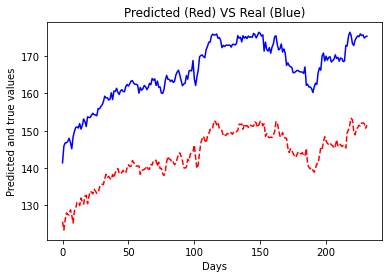

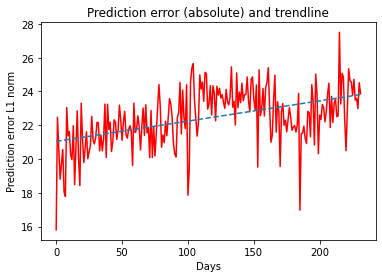

In [11]:
evaluate_ts(test_X, test_Y, y_pr)

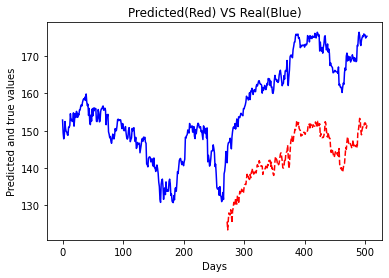

In [12]:
plt.plot(range(len(stock_values)),stock_values,'b')
plt.plot(range(len(stock_values)-test_size,len(stock_values)),y_pr,'r--')
plt.xlabel("Days")
plt.ylabel("Predicted and true values")
plt.title("Predicted(Red) VS Real(Blue)")
plt.show()